In [ ]:
#Esta primera línea nos da entrada al paquete SXS (Simulating eXtreme Spacetimes), que concentra datos y herramientas para estudiar ondas gravitacionales provenientes de simulaciones numéricas.
#El signo de admiración (!) le indica al notebook que ejecute un comando de consola desde la celda, en este caso pip.

!pip install sxs -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.2/784.2 kB 24.9 MB/s eta 0:00:00


In [ ]:
#Esta parte de nuestro código prepara el entorno de trabajo con tres herramientas y una configuración visual específica. Primero, import sxs carga la librería que instalamos justo antes;
#con ella vamos a poder abrir simulaciones completas de sistemas compactos. Luego, import matplotlib.pyplot as plt nos va a ayudar con la librería más usada para graficar, va a ser necesaria
#para representar tanto las ondas complejas como la fase desenrollada, los subconjuntos de entrenamiento/prueba y las curvas de interpolación. Después aparece import numpy as np, que nos va a
#permitir herramientas como arrays multidimensionales, funciones trigonométricas, búsqueda de índices e interpolación. Por último, %config InlineBackend.figure_format = 'retina' es una
#magic command que mejora la resolución de las figuras que tenemos; por lo que hace que los gráficos de matplotlib se rendericen mejor.

import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [ ]:
#Esta línea indica que estamos cargando una simulación completa del catálogo SXS, en este caso la identificada como NSNS:0001. El prefijo NSNS nos dice qué sistema físico representa, el cual es la
#coalescencia de dos estrellas de neutrones (Neutron Star – Neutron Star). Este tiene parámetros definidos (masas, espines, condiciones iniciales, resolución numérica, etc.).

sxs_nsns_0001 = sxs.load("SXS:NSNS:0001")

#Esta línea extrae del objeto cargado la función de onda h, que en relatividad numérica se representa como una combinación de modos multipolares esféricos h_{ℓm}(t).
#Además acceder primero al general (sxs_nsns_0001.h) y no directamente a un modo particular es importante porque nos permite elegir luego qué multipolo estudiar, que en este caso es el dominante (2,2).

w = sxs_nsns_0001.h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


  0%|          | 0/5589954 [00:00<?, ?it/s]

  0%|          | 0/2537221 [00:00<?, ?it/s]

In [ ]:
#Se obtiene el tiempo de referencia `t0` a partir de los metadatos de la simulación. Este instante está definido por el equipo de SXS como el momento a partir del cual la señal de onda gravitacional puede
#analizarse de forma más confiable. En los primeros ciclos suele aparecer "junk radiation", es numérico y no corresponde a la física real sino a la forma en que se inicializan las condiciones en la relatividad numérica.
#Por eso es importante marcar explícitamente este t0, pues delimita el inicio útil de la señal para los análisis posteriores de fase, frecuencia e interpolaciones.

t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation"
print(f't0 = {t0}')

t0 = 392


In [ ]:
#Con w.data accedemos a la representación completa de la onda gravitacional simulada, organizada como una matriz donde cada fila corresponde a un instante temporal y cada columna a un modo
#multipolar (ℓ,m). Esto incluye tanto el modo dominante (2,2), responsable de la mayor parte de la señal en sistemas simétricos, como los modos subdominantes (2,1), (3,3), (4,4), etc., que aunque
#menos intensos aportan información sobre asimetrías, inclinaciones y efectos finos de la dinámica. En conjunto, todos estos multipolos reconstruyen la señal completa.

w.data # todos los multipolos

array([[-7.24382646e-02-1.44631565e-02j, -1.61646484e-07+6.24457647e-07j,
         8.25692877e-03+2.20297105e-07j, ...,
         2.76025420e-08-1.48905014e-08j,  7.31472945e-13+1.16791453e-12j,
        -6.39592425e-09+2.02868756e-08j],
       [-7.46709306e-02-1.54490676e-02j, -1.65472047e-07+5.88618026e-07j,
         9.45115208e-03+1.97794663e-07j, ...,
         2.70853259e-08-1.47300284e-08j,  7.75021759e-13+1.13885578e-12j,
        -4.92436149e-09+1.85235658e-08j],
       [-7.67968441e-02-1.64515182e-02j, -1.62269988e-07+5.49803750e-07j,
         1.04977573e-02+1.71501443e-07j, ...,
         2.67669484e-08-1.48048715e-08j,  8.16500267e-13+1.10794215e-12j,
        -4.01691289e-09+1.70284458e-08j],
       ...,
       [-1.90917306e-03-8.03575343e-03j,  3.34512707e-05-2.45486923e-04j,
         4.01285143e-02-2.32361397e-04j, ...,
         1.53752239e-05-4.18220725e-07j,  8.23694256e-06+2.24412328e-06j,
         3.75965793e-06+2.26116670e-07j],
       [-1.90671852e-03-8.03929341e-03j,  4.

In [ ]:
# Aquí especificamos el multipolo (ℓ,m) = (2,2), que es el modo dominante de la onda gravitacional.La instrucción w.index(ell, m) devuelve el índice de columna correspondiente a ese par (ℓ,m)
#dentro de la matriz w.data que contiene todos los multipolos. Al imprimir i22 confirmamos qué posición ocupa ese modo en la estructura interna. Por último, al definir w_2_2 = w[:, i22] extraemos
#toda la serie temporal compleja asociada al multipolo (2,2), cada valor es el h_{22}(t) de la simulación.

ell, m = 2 , 2 # seleccionar el multipolo
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22]

4


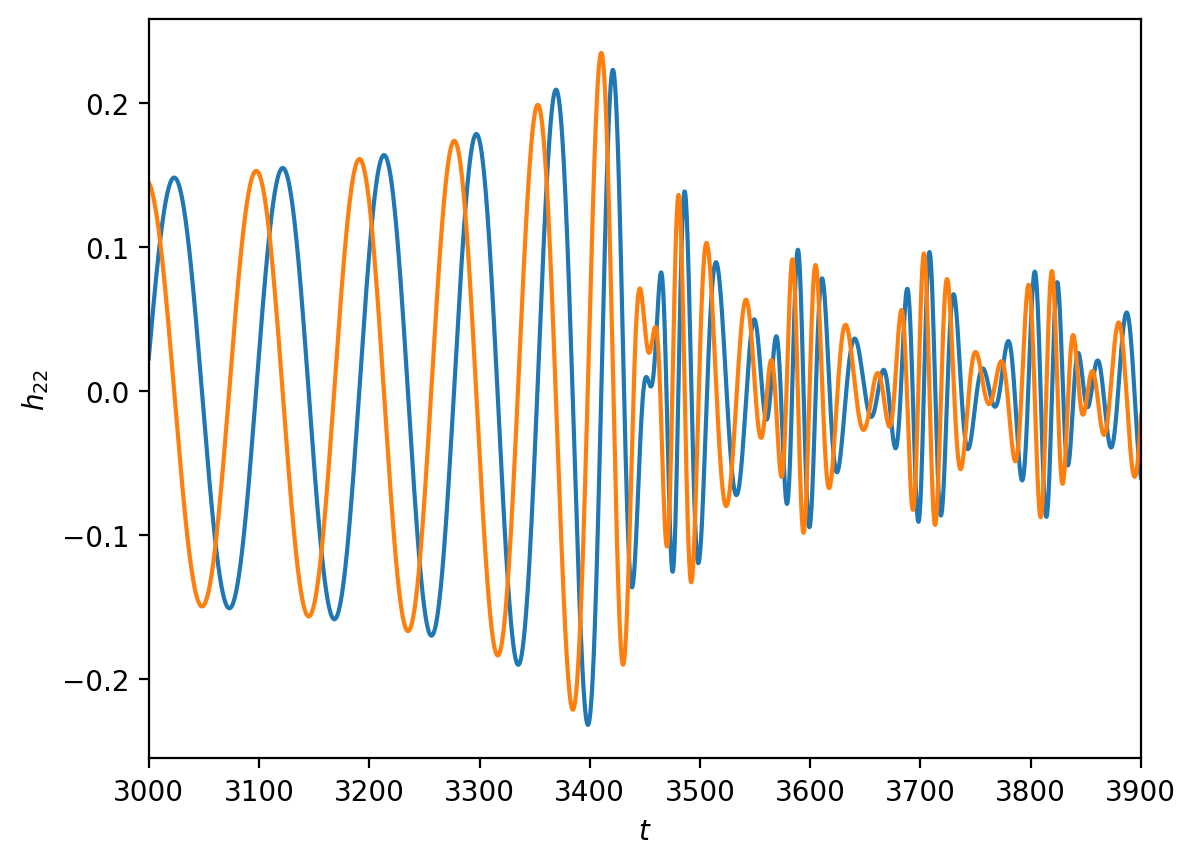

In [ ]:
#En esta parte, se crea una figura y se grafican por separado la parte real y la parte imaginaria del modo (2,2) extraído. Estas dos curvas representan las componentes de la onda
#gravitacional h_{22}(t), que es un número complejo cuyo módulo y fase codifican la amplitud y la evolución orbital del sistema. Al limitar el eje x con plt.xlim(3000,3900) nos enfocamos
# en un intervalo concreto del tiempo de simulación, donde la señal ya está libre de la "junk radiation" inicial y comienza a crecer en frecuencia (chirp).

plt.figure()
plt.plot(w.t, np.real(w_2_2))
plt.plot(w.t, np.imag(w_2_2))
plt.xlim(3000,3900)
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

In [ ]:
#Con np.angle(w_2_2) calculamos la fase instantánea del modo complejo h_{22}(t). Hayq que recordar que h_{22}(t) es un número complejo en cada instante, cuya magnitud da la amplitud de la onda
#y cuyo ángulo en el plano complejo corresponde a la fase. Esta fase φ(t) va a reflejar la evolución orbital del sistema binario, pues su derivada temporal está directamente relacionada con la frecuencia
#de la señal. En esta variable phi queda almacenada la secuencia de ángulos de la onda en función del tiempo.

phi = np.angle(w_2_2)

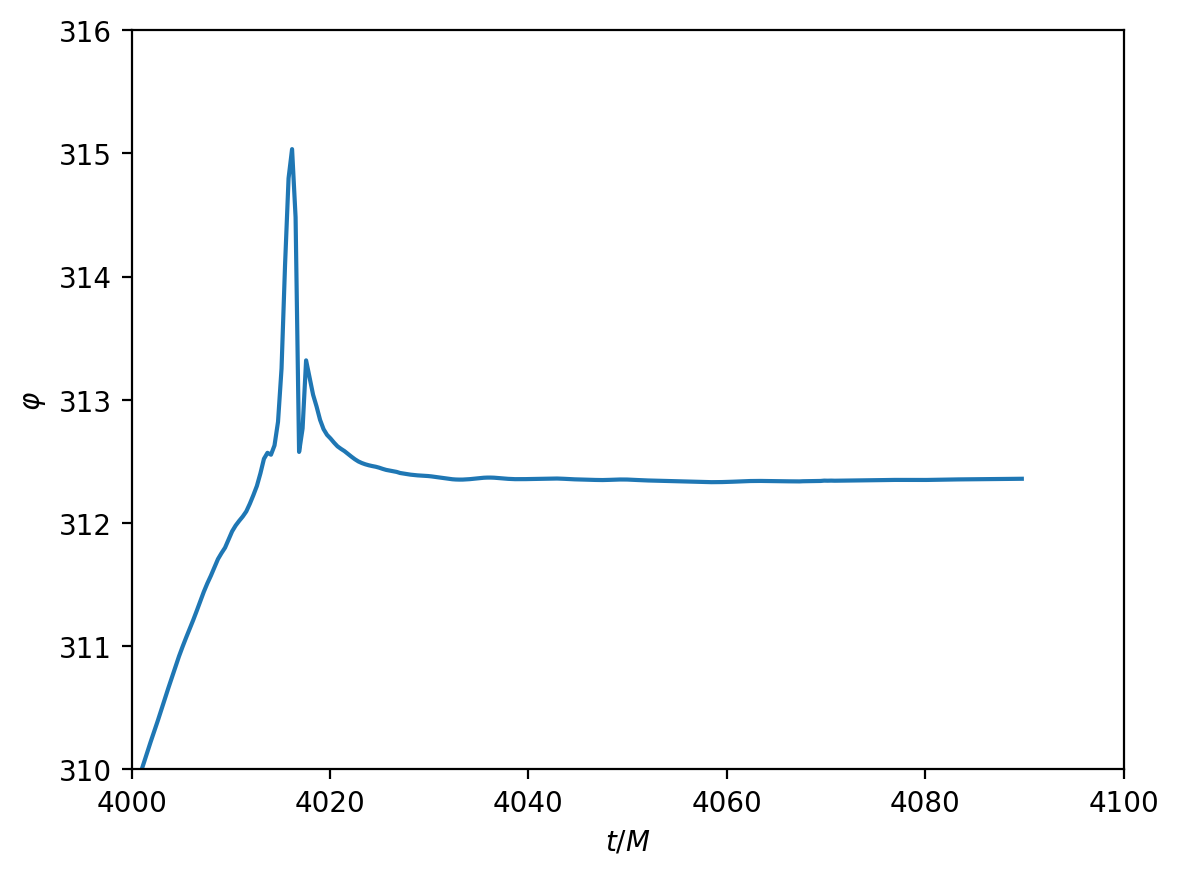

In [ ]:
#Aquí graficamos la fase del modo (2,2). Primero se aplica np.unwrap(-phi), que elimina los saltos de ±2π y nos entrega una fase continua en el tiempo. El signo negativo se usa porque, por convención
#en relatividad numérica, h_{22} ≈ A(t) e^{-iφ(t)}, de modo que el ángulo del número complejo es -φ; al multiplicar por (-1) recuperamos una fase creciente. En el gráfico el eje x es el tiempo adimensional t/M
#(tiempo dividido por la masa total del sistema), y se restringe a la ventana [4000,4100] para observar un tramo particular donde la fase crece. El eje y se limita al rango [310,316] para resaltar la evolución.

#plt.plot(w_2_2.t, -phi)
plt.plot(w_2_2.t, np.unwrap(-phi))
plt.xlabel(r'$t/M$')
plt.xlim(4000,4100)
plt.ylim(310,316)
plt.ylabel(r'$\varphi$')
plt.show()

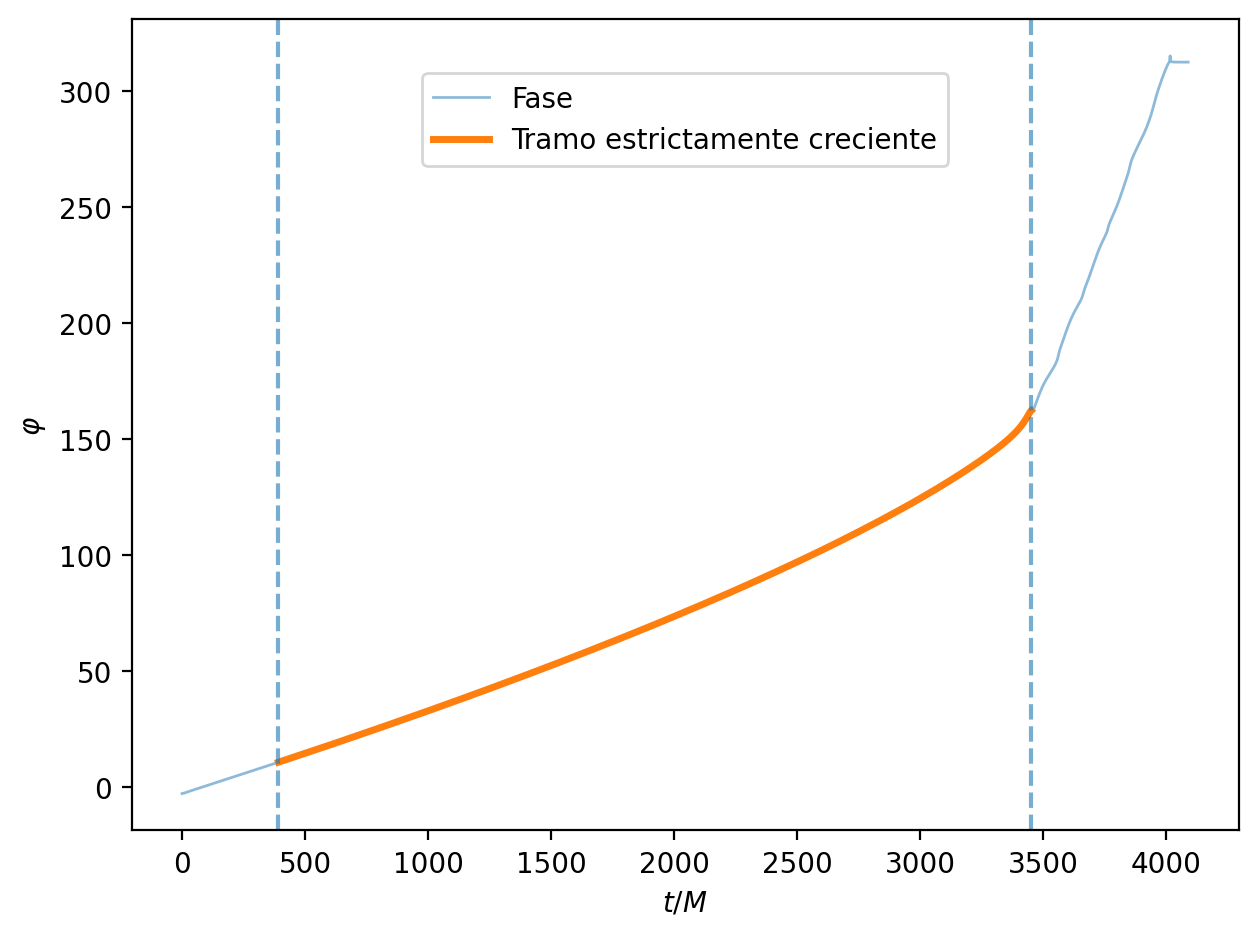

In [ ]:
#Convertimos los datos a arreglos, t con los tiempos y y con la fase del modo (2,2). La fase se calcula como -np.angle(h_{22}), y con np.unwrap eliminamos saltos de ±2π, mencionados antes, para
#obtener una curva continua y creciente que refleje el chirp físico.

t = np.asarray(w_2_2.t)
y = np.asarray(np.unwrap(-np.angle(w_2_2)))  #fase desenrollada

# Definimos t0 como el tiempo de referencia (del metadata), que marca el inicio útil de la señal después de la "junk radiation". Tol=0.0 establece que exigiremos crecimiento estrictamente positivo.

t0  = w.metadata.reference_time
tol = 0.0

# Buscamos el índice inicial a partir de t0 y verificamos que haya puntos suficientes hacia adelante.
#searchsorted halla el primer índice i0 tal que t[i0] ≥ t0, manteniendo orden temporal. Además verificamos que existan al menos dos puntos a partir de i0 para poder evaluar incrementos.

# Índice inicial desde t0
i0 = int(np.searchsorted(t, t0, side="left"))
if i0 >= t.size - 1:
    raise ValueError("No hay suficientes puntos a partir de t0.")

#Calculamos los incrementos dy = Δφ entre muestras consecutivas desde i0. Mientras dy > tol, asumimos crecimiento estricto. El primer dy <= tol marca el quiebre.
#Si no hay quiebre (hit vacío), el tramo creciente se extiende hasta el final disponible.

dy   = np.diff(y[i0:])
hit  = np.where(dy <= tol)[0]
i1   = i0 + (int(hit[0]) if hit.size else dy.size)  #último índice válido del tramo creciente.

#Definimos el tramo de interés entre t0 e i1, donde la fase crece de forma monótona. Incluimos i1+1 para capturar el último punto válido del segmento monótono.

t_inc = t[i0:i1+1]
y_inc = y[i0:i1+1]

#Generamos 600 muestras uniformes en el intervalo [t_inc[0], t_inc[-1]] para dibujar una curva suave.

t_lin = np.linspace(t_inc[0], t_inc[-1], 600)
y_lin = np.interp(t_lin, t_inc, y_inc)

#Se grafica:
plt.figure()
plt.plot(t, y, lw=1, alpha=0.5, label="Fase")
plt.plot(t_lin, y_lin, lw=2.5, label="Tramo estrictamente creciente")
plt.axvline(t0, ls="--", alpha=0.6)
plt.axvline(t_inc[-1], ls="--", alpha=0.6)
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 0.95))
plt.tight_layout()
plt.show()


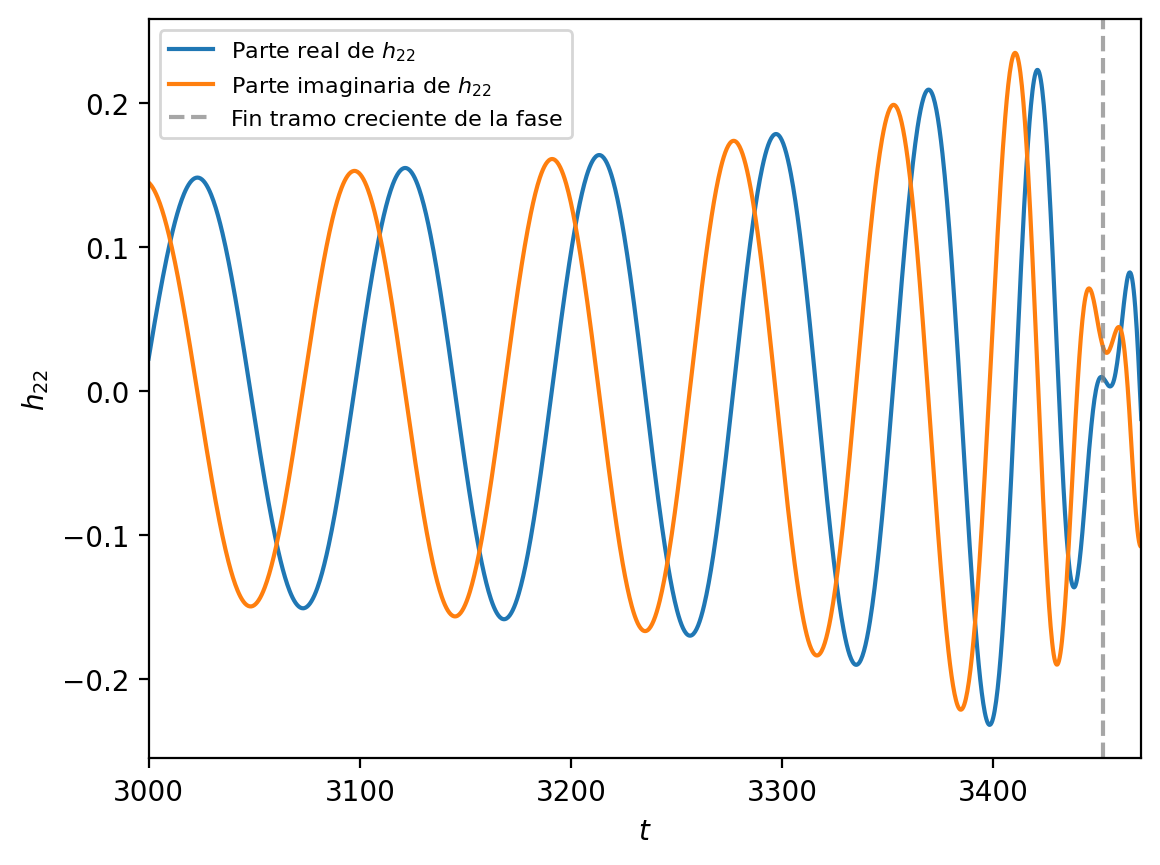

In [ ]:
#Aquí se tiene una nueva gráfica en el modo (2,2) en sus componentes real e imaginaria. Ambas curvas provienen de h_{22}(t), que es complejo; su parte real e imaginaria oscilan
#en el tiempo y contienen la información de amplitud y fase de la onda gravitacional. Limitamos el eje x al intervalo [3000, 3470] para centrarnos en el tramo relevante de la señal,
#donde ya se observa el chirp sin la contaminación inicial. La línea vertical punteada se coloca en t[i1], es decir, el instante que marca el fin del segmento de fase estrictamente creciente
#enconrado antes. De este modo, la gráfica conecta la evolución del modo h_{22} con la frontera temporal que definimos al analizar la monotonía de la fase.

plt.figure()
plt.plot(w.t, np.real(w_2_2), label="Parte real de $h_{22}$")
plt.plot(w.t, np.imag(w_2_2), label="Parte imaginaria de $h_{22}$")
plt.xlim(3000, 3470)
plt.xlabel(r"$t$")
plt.ylabel(r"$h_{22}$")
plt.axvline(t[i1], ls="--", alpha=0.7, color="gray",
            label="Fin tramo creciente de la fase")
plt.legend(loc="upper left", fontsize=8, framealpha=0.8)
plt.show()


# **II. Describir como se seleccionan los datos para estudiar la fase de las ondas, fase vs tiempo**

In [ ]:
#Construimos la fase desenrollada a partir del modo h_{22}(t) extraemos la fase como -np.angle(h_{22}), lo que garantiza
#que la fase crezca de manera física (por la convención e^{-iφ}).

t = np.asarray(w_2_2.t)
y = np.asarray(np.unwrap(-np.angle(w_2_2)))  # fase desenrollada

#Elegimos e inicio en t0, pues se define t0 usando el tiempo de referencia de la simulación, el cual excluye la "junk radiation". A partir de t0 buscamos el primer índice i0 que corresponde al inicio de
#la fase que nos interesa para el análisis.

t0 = w.metadata.reference_time
i0 = int(np.searchsorted(t, t0, side="left"))

#Tenemos el criterio de tramo estrictamente creciente (Δφ > 0), aquí valculamos las diferencias dy = φ[i+1]-φ[i] desde i0. Mientras dy > 0 la fase crece como debe. El primer punto donde dy <= 0 marca un
#quiebre y allí detenemos el tramo.

dy  = np.diff(y[i0:])
hit = np.where(dy <= 0.0)[0]
i1  = i0 + (int(hit[0]) if hit.size else dy.size)

#Por resultado tenemos el tramo que queremos. Aquí definimos el intervalo [i0, i1] como el segmento de fase estrictamente creciente, es decir, el dominio temporal donde la señal es físicamente coherente.

t_inc = t[i0:i1+1]
y_inc = y[i0:i1+1]

##**A)** ¿Cuántos datos hay?

In [ ]:
#Convertimos los tiempos y la fase del modo (2,2) a arreglos de numpy. La fase se obtiene con -np.angle(h_{22}) y se desenrolla con np.unwrap y obtener φ(t) continua y creciente.

t = np.asarray(w_2_2.t)
y = np.asarray(np.unwrap(-np.angle(w_2_2)))

#Definimos el inicio de referencia en t0, excluyendo la junk radiation. Buscamos el índice i0 a partir del cual empieza la fase que nos interesa.

t0  = w.metadata.reference_time
i0  = int(np.searchsorted(t, t0, side="left"))

#Calculamos incrementos de fase (dy). Mientras dy > 0 la fase crece. El primer dy <= 0 marca un quiebre y define el final de la parte que limitamos.

dy  = np.diff(y[i0:])
hit = np.where(dy <= 0.0)[0]
i1  = i0 + (int(hit[0]) if hit.size else dy.size)

#Extraemos el intervalo de trabajo: tramo estrictamente creciente de la fase.

t_inc = t[i0:i1+1]
y_inc = y[i0:i1+1]

n_total = t.size
n_tramo = t_inc.size
print(f"Total puntos (2,2): {n_total}")
print(f"Puntos en tramo estrictamente creciente: {n_tramo}")

Total puntos (2,2): 11452
Puntos en tramo estrictamente creciente: 8568


##**B)** Máximo y mínimos



In [ ]:
#En estas líneas identificamos el mínimo y el máximo de la fase en el tramo estrictamente creciente. np.argmin(y_inc) y np.argmax(y_inc) devuelven los índices donde la fase alcanza
#sus valores más bajo y más alto, respectivamente, dentro de ese intervalo.

i_min = np.argmin(y_inc)
i_max = np.argmax(y_inc)

#Asociamos los tiempos correspondientes y los valores de fase en esos puntos extremos.

t_min, phi_min = t_inc[i_min], y_inc[i_min]
t_max, phi_max = t_inc[i_max], y_inc[i_max]

print(f"mínimo: φ={phi_min:.9g} en t={t_min:.9g}")
print(f"máximo: φ={phi_max:.9g} en t={t_max:.9g}")

mínimo: φ=10.5727411 en t=392.018076
máximo: φ=162.081486 en t=3451.94944


##**C)** ¿El paso temporal es constante?



In [ ]:
#En esta parte, calculamos los incrementos de tiempo entre puntos consecutivos; dt_full para toda la simulación y dt_tramo solo para el intervalo estrictamente creciente.

dt_full  = np.diff(t)
dt_tramo = np.diff(t_inc)

#Definimos una función auxiliar que evalúa si un arreglo de incrementos puede considerarse constante dentro de tolerancias relativas y absolutas.

def es_constante(dt, rtol=1e-10, atol=1e-12):
    return np.allclose(dt, dt[0], rtol=rtol, atol=atol)

print("Paso constante (full): ", es_constante(dt_full))
print("Paso constante (tramo):", es_constante(dt_tramo))
print(f"dt_tramo promedio = {dt_tramo.mean():.9g}, min = {dt_tramo.min():.9g}, max = {dt_tramo.max():.9g}")

Paso constante (full):  False
Paso constante (tramo): False
dt_tramo promedio = 0.357176533, min = 0.357131478, max = 0.358895555


# **III. Realizar las interpolaciones con sus respectivos errores de cada metodo SE y AE y el cálculo de MSE y MAE.**




*  ## **Interpolación con Lagrange:**



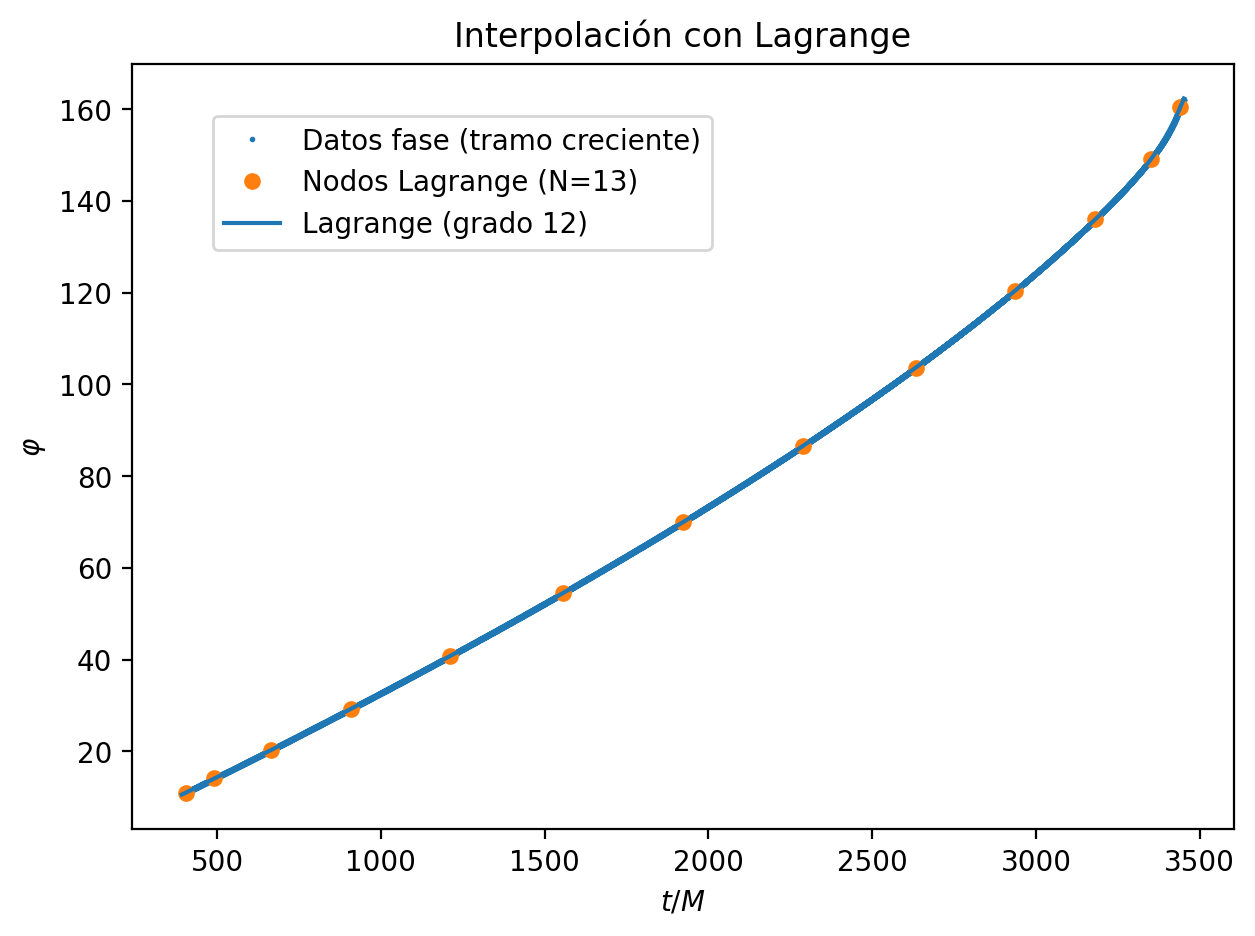

In [ ]:
from scipy.interpolate import lagrange

#Aquí definimos el intervalo de trabajo [a, b]. t_inc es un ndarray de NumPy con los tiempos del tramo creciente, por lo tanto t_inc[0] y t_inc[-1] son escalares de punto flotante (floats)
#que marcan el inicio y el fin del intervalo temporal.

a, b = t_inc[0], t_inc[-1]

#En estas línea se selccionan los nodos "tipo Chebyshev". N es un entero (int) que indica cuántos nodos usaremos. k es un ndarray de enteros consecutivos desde 0 hasta N-1. t_cheb es un ndarray
#de floats: son los N nodos de Chebyshev mapeados al intervalo [a,b].

N = 13
k = np.arange(N)
t_cheb = 0.5*(a+b) + 0.5*(b-a)*np.cos((2*k+1)/(2*N)*np.pi)

#Se ajustan los nodos a la malla real de datos. np.searchsorted devuelve un ndarray de índices enteros (ints), uno por cada t_cheb, que corresponde a la posición donde insertar ese valor en t_inc
#manteniendo el orden. np.clip restringe esos índices a valores válidos (entre 0 y t_inc.size-1). El resultado idx es un ndarray de enteros. np.unique elimina repetidos si varios t_cheb caen en el mismo índice.

idx = np.clip(np.searchsorted(t_inc, t_cheb), 0, t_inc.size-1)
idx = np.unique(idx)  # evita repetidos

#Se construye el polinomio de Lagrange. t_inc[idx] es un ndarray de floats con los tiempos seleccionados, y y_inc[idx] es un ndarray con las fases correspondientes. lagrange devuelve un objeto polinómico
#de tipo numpy.poly1d, llamado P, que representa el polinomio interpolador en forma cerrada.

P = lagrange(t_inc[idx], y_inc[idx])

t_dense = np.linspace(a, b, 800)
y_dense = P(t_dense)

plt.figure()
plt.plot(t_inc, y_inc, '.', ms=2, color="tab:blue", label="Datos fase (tramo creciente)")
plt.plot(t_inc[idx], y_inc[idx], 'o', ms=5, color="tab:orange", label=f"Nodos Lagrange (N={idx.size})")
plt.plot(t_dense, y_dense, '-', color="tab:blue", lw=1.5, label=f"Lagrange (grado {idx.size-1})")
plt.title("Interpolación con Lagrange")
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.legend(loc="upper center", bbox_to_anchor=(0.3, 0.95))
plt.tight_layout()
plt.show()



*  ## **Error con Lagrange:**



In [ ]:
#phi_true, referencia obtenida por interpolación lineal sobre los datos reales (t_inc, y_inc). np.interp devuelve un ndarray de floats con la fase linealmente interpolada en la malla densa t_dense.

phi_true = np.interp(t_dense, t_inc, y_inc)

#SE, que es el error cuadrático, y AE, error absoluto, punto a punto entre la curva de Lagrange (y_dense) y la referencia lineal (phi_true). Ambos son ndarrays de floats de la misma longitud que t_dense.

SE  = (phi_true - y_dense)**2
AE  = np.abs(phi_true - y_dense)

#MSE y MAE como promedios sobre toda la malla densa. Son escalares (floats) que resumen el desacuerdo global con la referencia lineal.

MSE = SE.mean()
MAE = AE.mean()

print(f"MSE = {MSE:.6e}")
print(f"MAE = {MAE:.6e}")

MSE = 3.514831e-03
MAE = 3.285120e-02


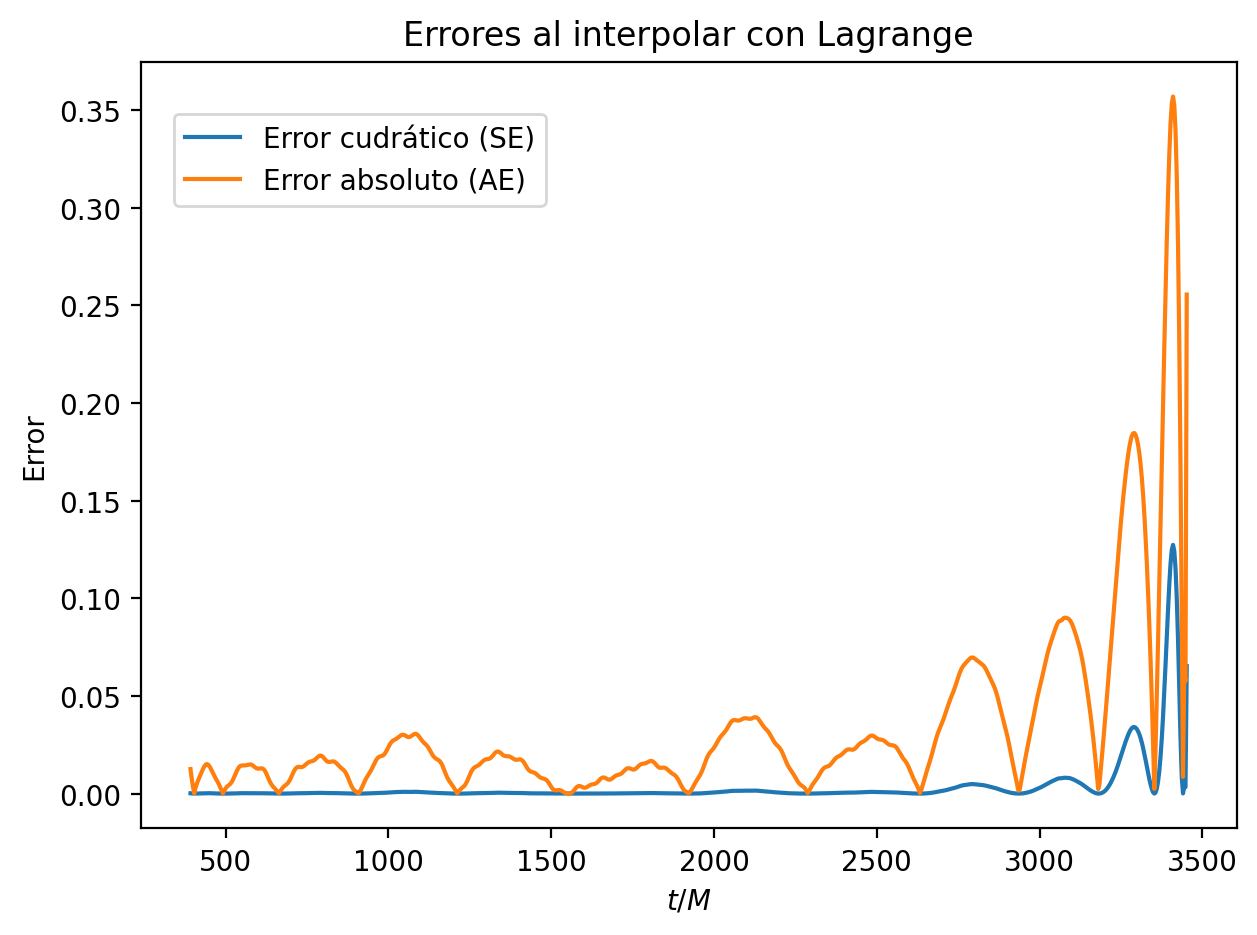

In [ ]:
plt.plot(t_dense, SE, label="Error cudrático (SE)")
plt.plot(t_dense, AE, label="Error absoluto (AE)")
plt.xlabel(r"$t/M$")
plt.ylabel("Error")
plt.title("Errores al interpolar con Lagrange")
plt.legend(loc="upper center", bbox_to_anchor=(0.2, 0.95))
plt.tight_layout()
plt.show()


*  ## **Interpolación con CubicSpline (natural):**



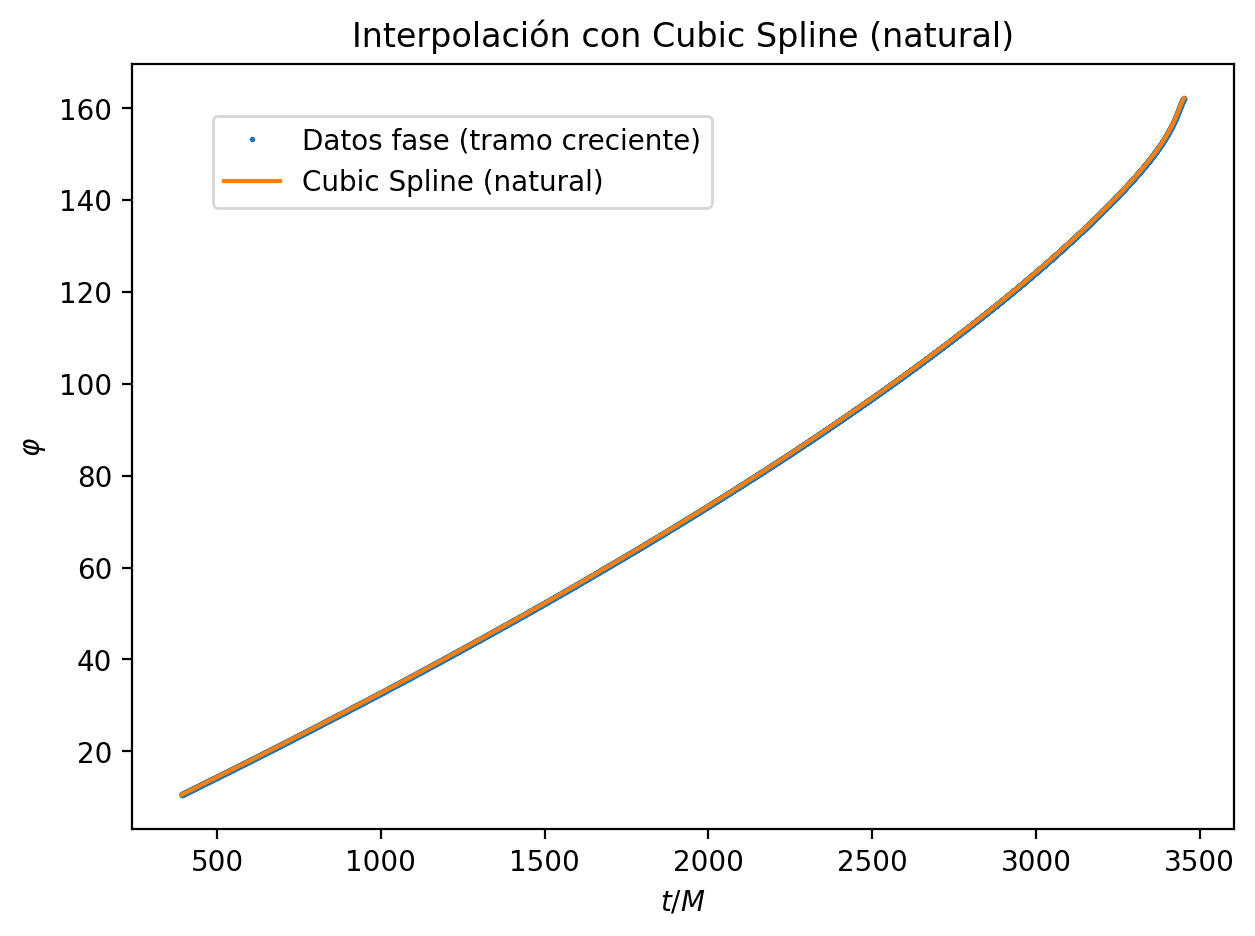

In [ ]:
from scipy.interpolate import CubicSpline

#Construimos el objeto spline cúbico usando todos los datos del tramo creciente (t_inc, y_inc). CubicSpline espera dos ndarrays de floats, tiempos y fases.
#El parámetro bc_type='natural' fija la condición de frontera y''(a)=y''(b)=0, es decir, la segunda derivada se anula en los extremos, suavizando el comportamiento en los bordes.

spline = CubicSpline(t_inc, y_inc, bc_type='natural')

#En estas líneas hacemos una malla densa de 600 puntos uniformes entre el inicio y el final del tramo. Es un ndarray de floats que permite trazar la curva spline con suavidad visual.

t_dense = np.linspace(t_inc[0], t_inc[-1], 600)

#Evaluamos el spline en esa malla. El resultado y_spline es un ndarray de floats con la fase interpolada en los nuevos puntos.

y_spline = spline(t_dense)

plt.figure()
plt.plot(t_inc, y_inc, '.', ms=2, color="tab:blue", label="Datos fase (tramo creciente)")
plt.plot(t_dense, y_spline, '-', color="tab:orange", lw=1.5, label="Cubic Spline (natural)")
plt.title("Interpolación con Cubic Spline (natural)")
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.legend(loc="upper center", bbox_to_anchor=(0.3, 0.95))
plt.tight_layout()
plt.show()



*  ## **Error con CubicSpline (natural):**



In [ ]:
#phi_true, referencia basada en interpolación lineal de los datos originales (t_inc, y_inc) evaluada en la malla densa t_dense. Es un ndarray de floats que sirve como baseline.

phi_true = np.interp(t_dense, t_inc, y_inc)

#err, diferencias punto a punto entre la referencia phi_true y la curva spline evaluada. Es un ndarray de floats de la misma longitud que t_dense.

err = phi_true - y_spline
SE = err**2
AE = np.abs(err)

MSE = SE.mean()
MAE = AE.mean()

print(f"MSE (CubicSpline natural) = {MSE:.6e}")
print(f"MAE (CubicSpline natural) = {MAE:.6e}")

MSE (CubicSpline natural) = 1.620321e-11
MAE (CubicSpline natural) = 7.258906e-07


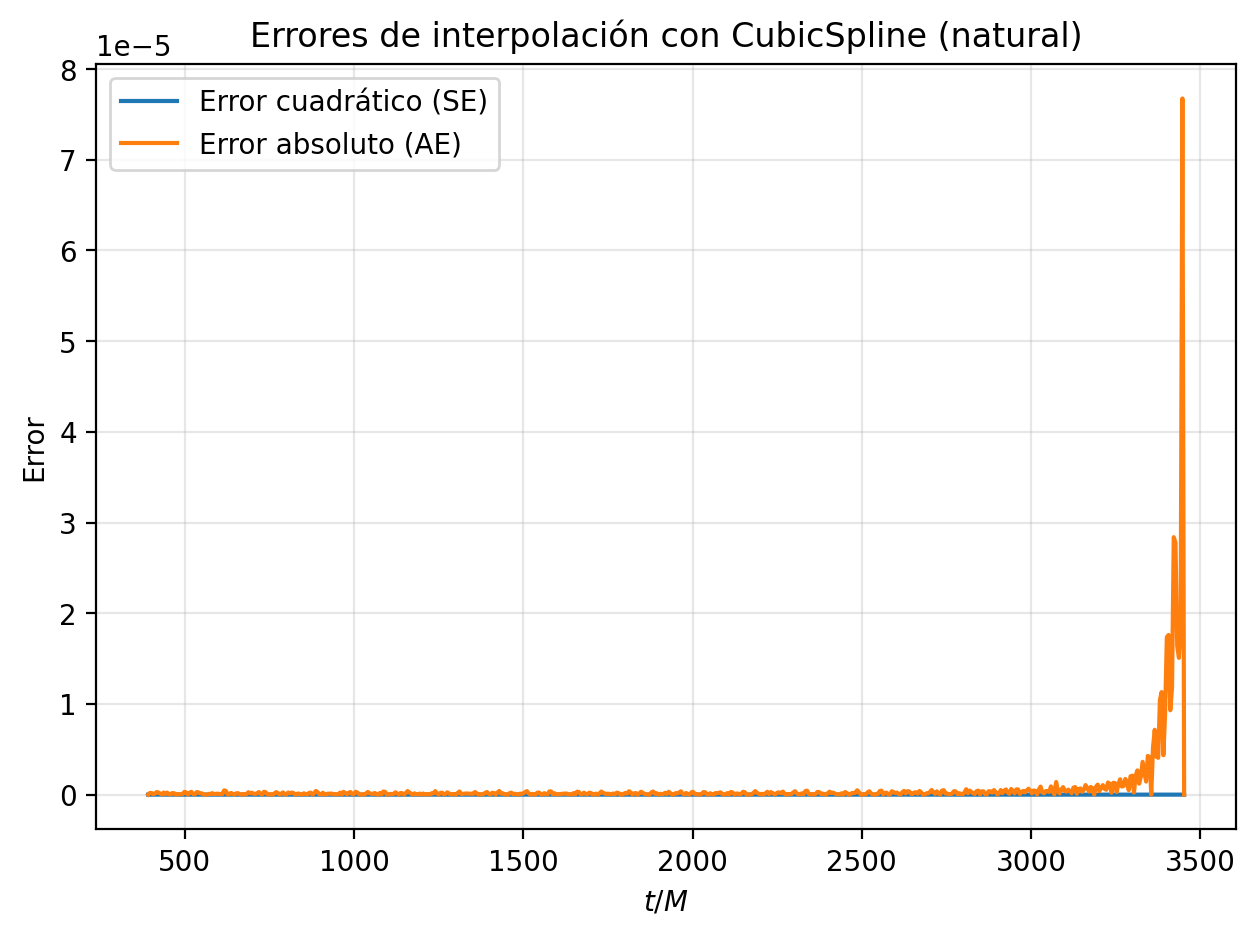

In [ ]:
plt.figure()
plt.plot(t_dense, SE, '-', lw=1.5, label='Error cuadrático (SE)')
plt.plot(t_dense, AE, '-', lw=1.5, label='Error absoluto (AE)')
plt.xlabel(r"$t/M$")
plt.ylabel("Error")
plt.title("Errores de interpolación con CubicSpline (natural)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

*   ## **Interpolación con CubicSpline not-a-knot:**


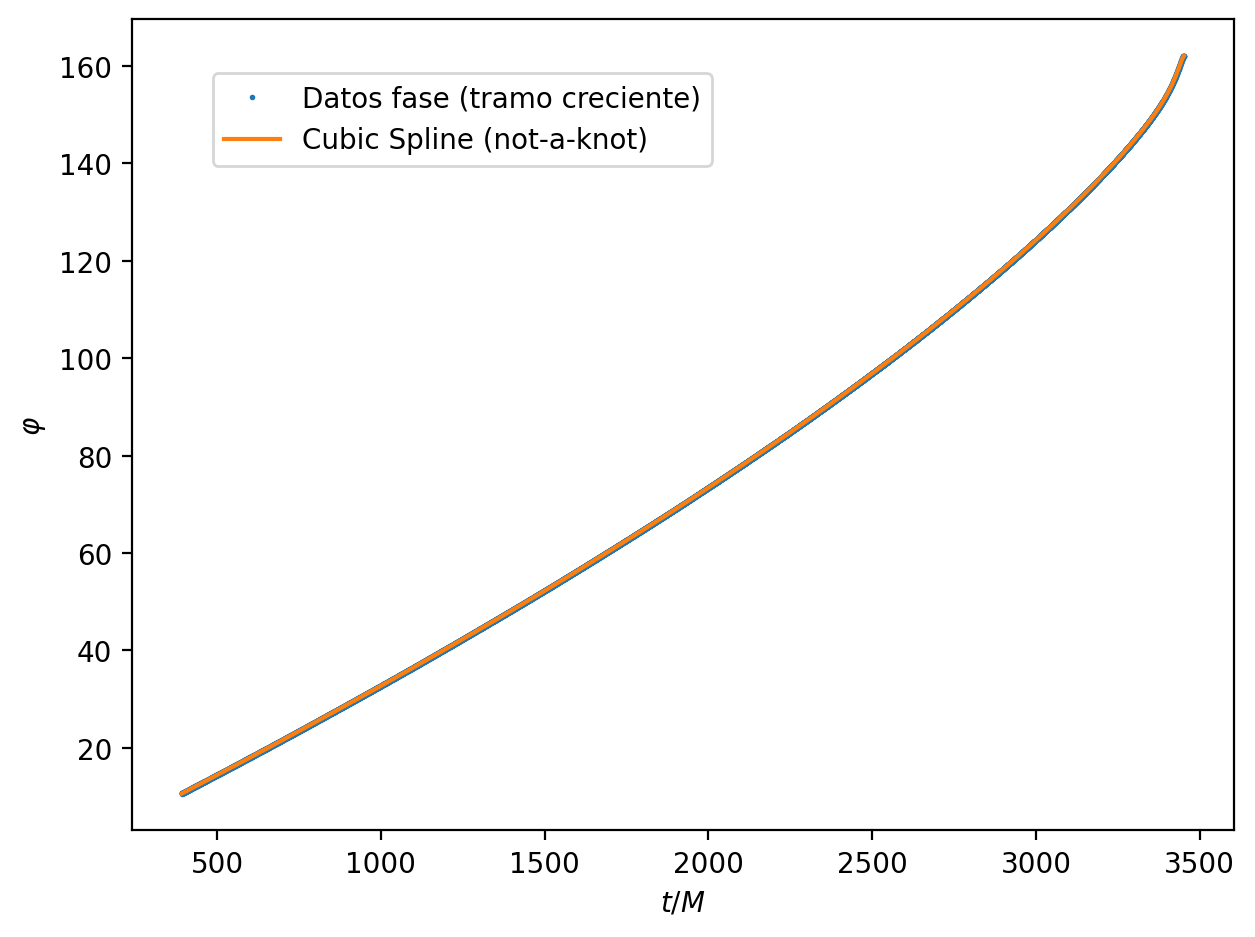

In [ ]:
from scipy.interpolate import CubicSpline

#Construimos el spline cúbico usando todos los datos del tramo creciente (t_inc, y_inc). bc_type='not-a-knot' es la condición de frontera por defecto: en vez de fijar la curvatura
#en los extremos, fuerza a que el tercer derivado sea continuo en los dos nodos adyacentes a cada borde, evitando imponer que y''(a)=y''(b)=0 como en el caso "natural".

cs_nak = CubicSpline(t_inc, y_inc, bc_type='not-a-knot')

t_dense = np.linspace(t_inc[0], t_inc[-1], 600)
y_nak   = cs_nak(t_dense)

plt.figure()
plt.plot(t_inc, y_inc, '.', ms=2, color="tab:blue",   label="Datos fase (tramo creciente)")
plt.plot(t_dense, y_nak, '-', ms=3, color="tab:orange", label="Cubic Spline (not-a-knot)")
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.legend(loc="upper center", bbox_to_anchor=(0.3, 0.95))
plt.tight_layout()
plt.show()




*  ## **Error con CubicSpline not-a-knot:**



In [ ]:
phi_true = np.interp(t_dense, t_inc, y_inc)

err = phi_true - y_nak
SE  = err**2
AE  = np.abs(err)

MSE = SE.mean()
MAE = AE.mean()

print(f"MSE (CubicSpline not-a-knot) = {MSE:.6e}")
print(f"MAE (CubicSpline not-a-knot) = {MAE:.6e}")

MSE (CubicSpline not-a-knot) = 1.620321e-11
MAE (CubicSpline not-a-knot) = 7.258906e-07


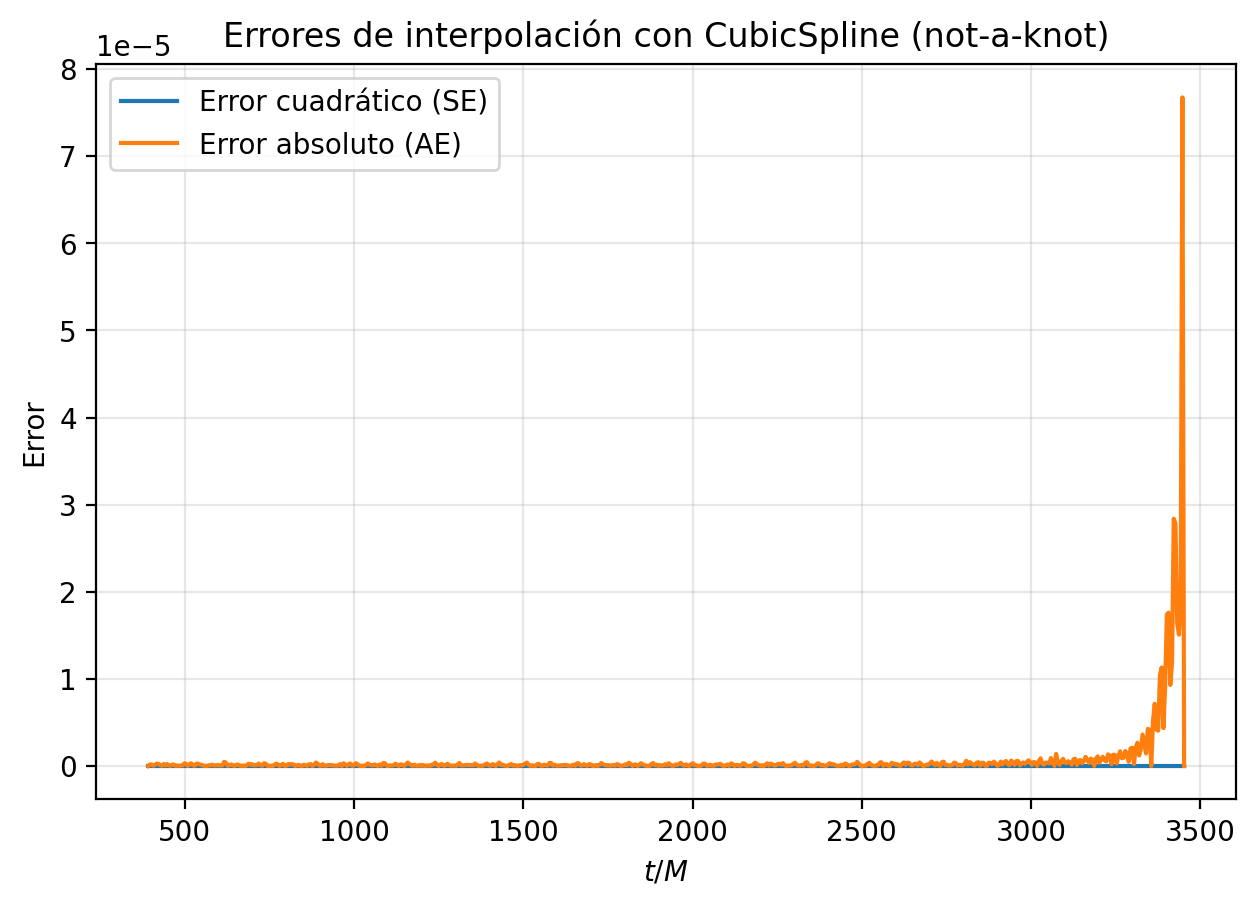

In [ ]:
plt.figure()
plt.plot(t_dense, SE, '-', lw=1.5, label="Error cuadrático (SE)")
plt.plot(t_dense, AE, '-', lw=1.5, label="Error absoluto (AE)")
plt.xlabel(r"$t/M$")
plt.ylabel("Error")
plt.title("Errores de interpolación con CubicSpline (not-a-knot)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Este spline, al no imponer segunda derivada nula en los bordes, suele representar mejor la curvatura real de la fase al inicio y al final del tramo. Por eso es la condición estándar de SciPy y resulta de más ayuda cuando la aceleración (segunda derivada de la fase) no desaparece en los extremos, como en un chirp de ondas gravitacionales.

*   ## **Interpolación con PCHIP:**



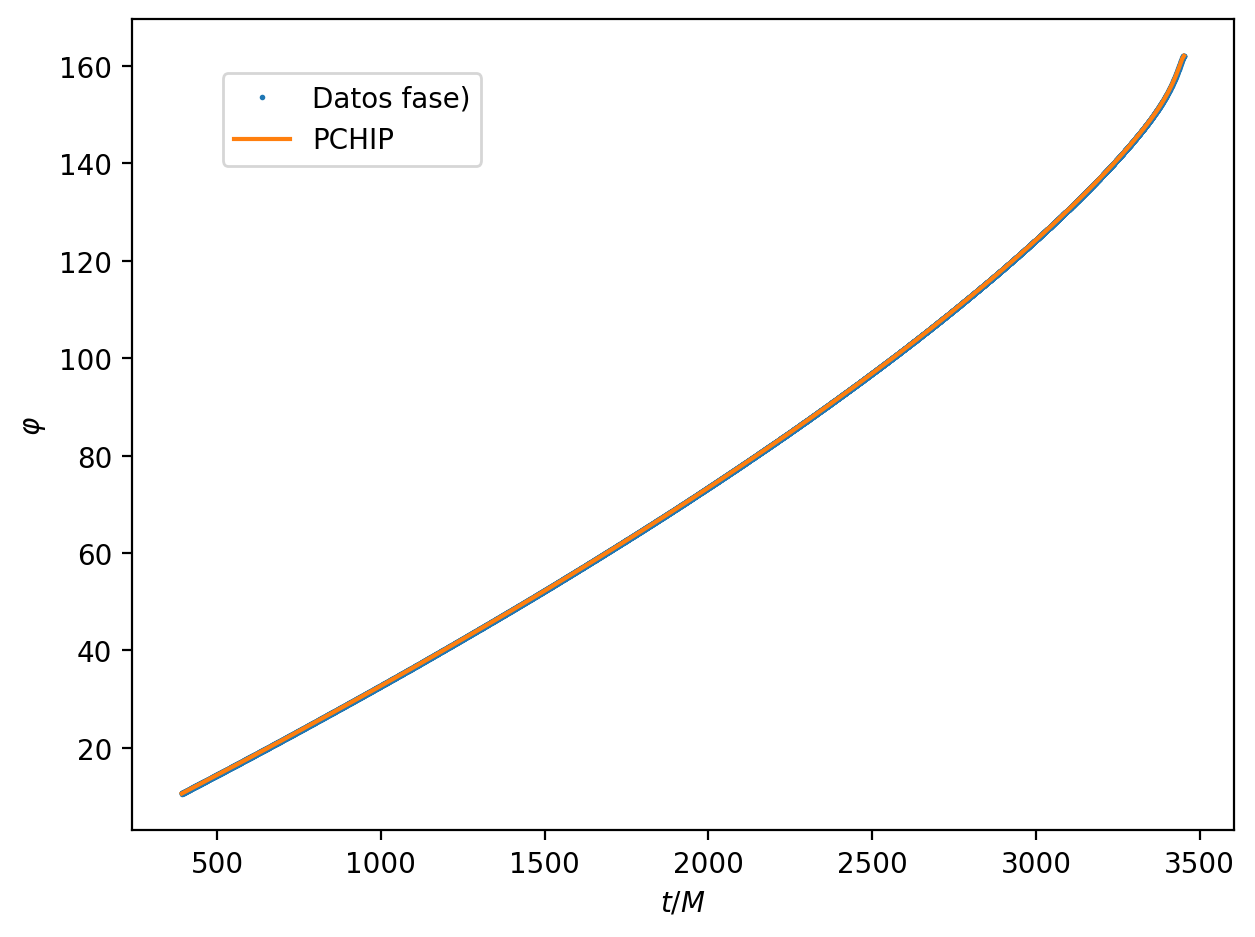

In [ ]:
from scipy.interpolate import PchipInterpolator

#Construimos el interpolador PCHIP con los datos del tramo creciente (t_inc, y_inc). PchipInterpolator toma dos ndarrays de floats y genera una interpolación cúbica por tramos
#que es "shape-preserving", garantiza que la curva interpolada conserva la monotonicidad y evita oscilaciones artificiales entre nodos (overshoot).

pchip = PchipInterpolator(t_inc, y_inc)

t_dense = np.linspace(t_inc[0], t_inc[-1], 600)
y_pchip  = pchip(t_dense)

plt.figure()
plt.plot(t_inc, y_inc, '.', ms=2, color="tab:blue",   label="Datos fase)")
plt.plot(t_dense, y_pchip, '-', ms=3, color="tab:orange", label="PCHIP")
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.legend(loc="upper center", bbox_to_anchor=(0.2, 0.95))
plt.tight_layout()
plt.show()



*  ## **Error con PCHIP:**



In [ ]:
#Sigue la misma lógica del cálculo de errores de los anteriores metodos de interpolación.

phi_true = np.interp(t_dense, t_inc, y_inc)

err = phi_true - y_pchip
SE  = err**2
AE  = np.abs(err)

MSE = SE.mean()
MAE = AE.mean()

print(f"MSE (PCHIP) = {MSE:.6e}")
print(f"MAE (PCHIP) = {MAE:.6e}")

MSE (PCHIP) = 1.851110e-11
MAE (PCHIP) = 7.320370e-07


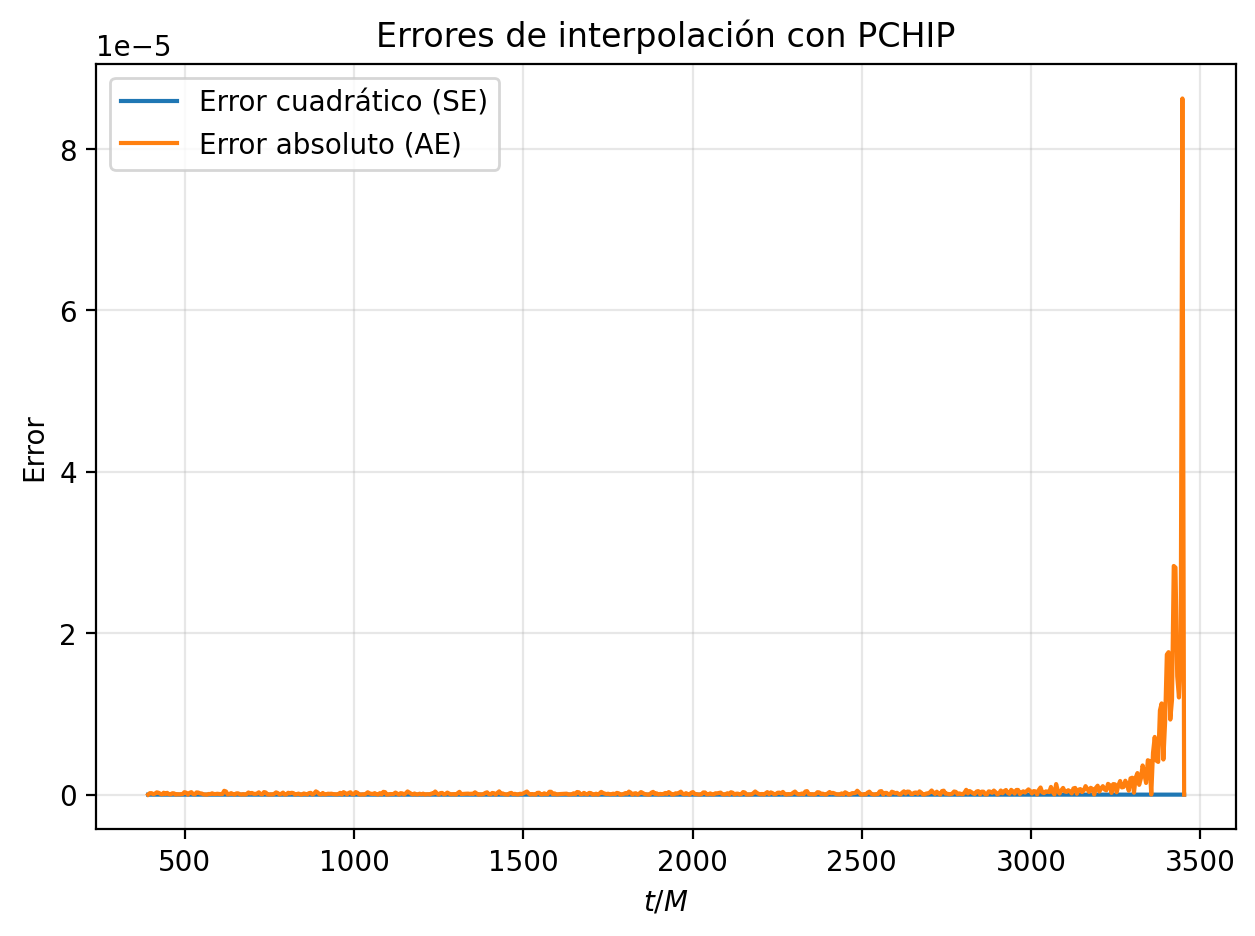

In [ ]:
plt.figure()
plt.plot(t_dense, SE, '-', lw=1.5, label='Error cuadrático (SE)')
plt.plot(t_dense, AE, '-', lw=1.5, label='Error absoluto (AE)')
plt.xlabel(r"$t/M$")
plt.ylabel("Error")
plt.title("Errores de interpolación con PCHIP")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **IV. Comparar gráficamente las interpolaciones**


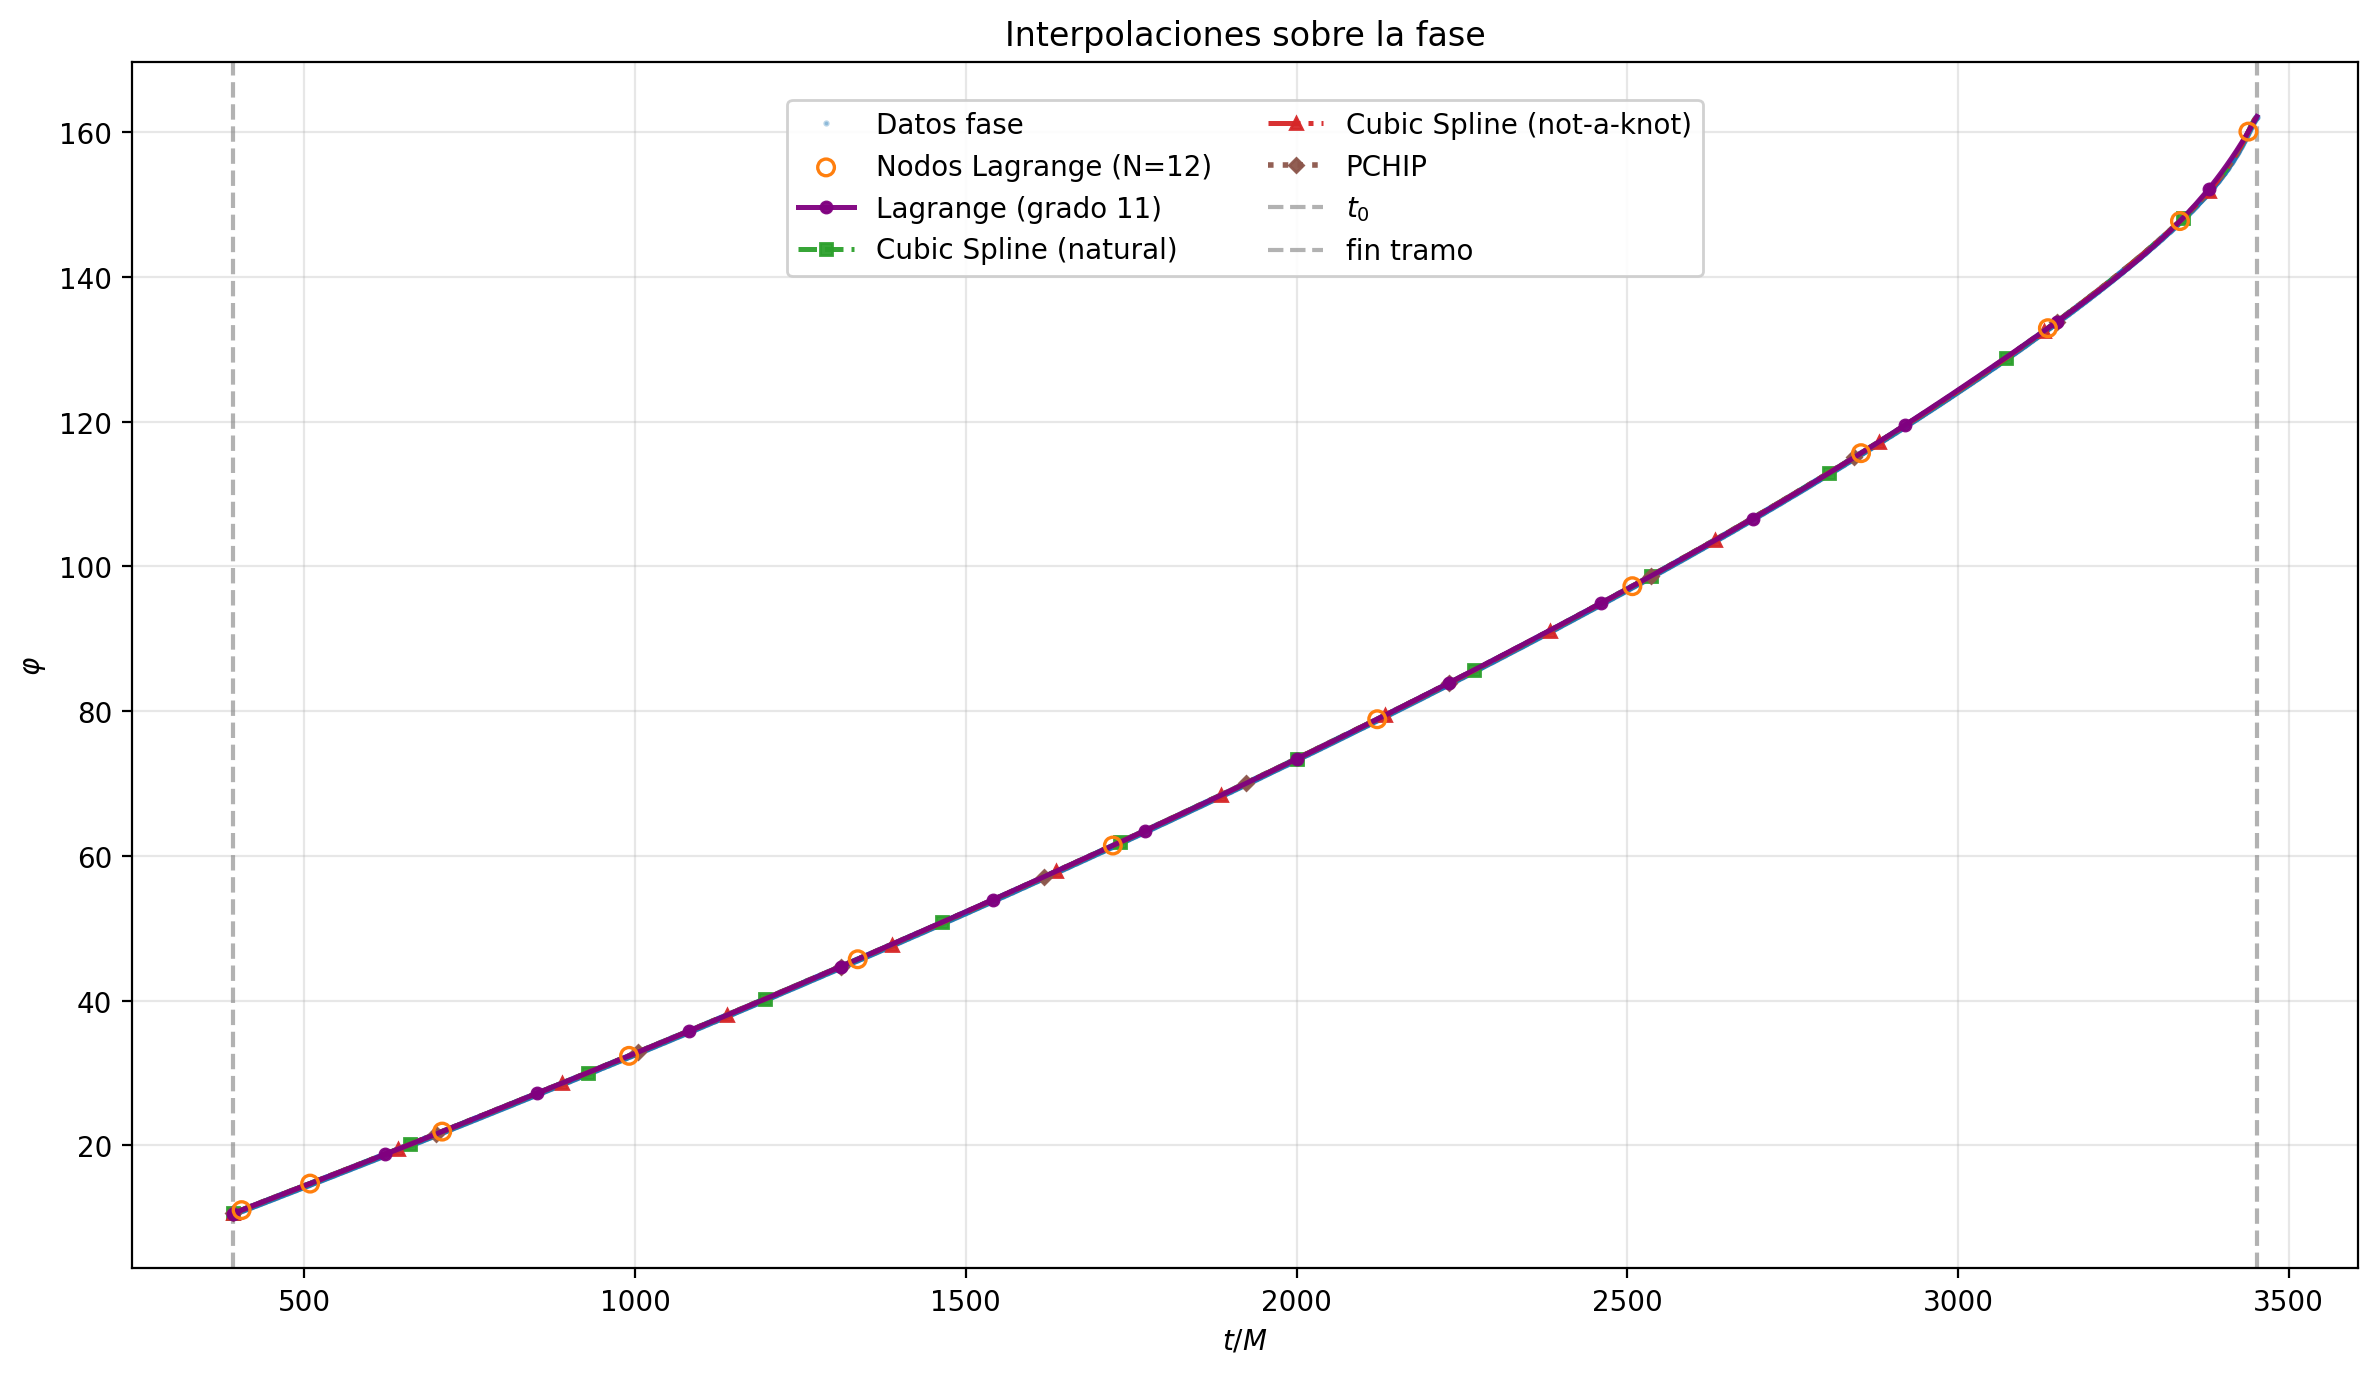

In [ ]:
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

#a, b: floats con los extremos temporales del tramo; t_dense: ndarray (800,) de tiempos uniformes.

a, b = t_inc[0], t_inc[-1]
t_dense = np.linspace(a, b, 800)

#Aquí están los nodos para Lagrange (tipo Chebyshev mapeados a [a,b] y alineados a la malla real t_inc) N: int (número de nodos teóricos); k: ndarray de ints [0..N-1].
#t_cheb: ndarray (N,) de floats (nodos mapeados); idx_nodes: ndarray de ints (índices válidos en t_inc, sin repetidos).

N = 12
k = np.arange(N)
t_cheb = 0.5*(a+b) + 0.5*(b-a)*np.cos((2*k+1)/(2*N)*np.pi)
idx_nodes = np.clip(np.searchsorted(t_inc, t_cheb), 0, len(t_inc)-1)
idx_nodes = np.unique(idx_nodes) #evita duplicados si la malla no es uniforme.

#Aquí se pone el polinomio de Lagrange. P: objeto numpy.poly1d; phi_lagr: ndarray (800,) con la evaluación del polinomio en t_dense.

P = lagrange(t_inc[idx_nodes], y_inc[idx_nodes])
phi_lagr = P(t_dense)

#Splines cúbicos: condición natural y not-a-knot. cs_natural / cs_notaknot: objetos CubicSpline; phi_cs_*: ndarrays (800,).

cs_natural  = CubicSpline(t_inc, y_inc, bc_type='natural')
cs_notaknot = CubicSpline(t_inc, y_inc, bc_type='not-a-knot')
phi_cs_nat  = cs_natural(t_dense)
phi_cs_nak  = cs_notaknot(t_dense)

#PCHIP (cúbica por tramos que preserva forma/monotonía), pchip: objeto PchipInterpolator; phi_pchip: ndarray (800,).

pchip = PchipInterpolator(t_inc, y_inc)
phi_pchip = pchip(t_dense)

plt.figure(figsize=(12, 7))

plt.plot(t_inc, y_inc, '.', ms=2.5, alpha=0.30, color='tab:blue',
         label="Datos fase", zorder=3)

plt.scatter(t_inc[idx_nodes], y_inc[idx_nodes],
            s=36, facecolors='none', edgecolors='tab:orange', linewidths=1.2,
            label=f"Nodos Lagrange (N={len(idx_nodes)})", zorder=6)

plt.plot(t_dense, phi_lagr, '-',  lw=1.8, marker='o', markevery=60, ms=4.0,
         alpha=0.95, color='purple', label=f"Lagrange (grado {len(idx_nodes)-1})", zorder=5)
plt.plot(t_dense, phi_cs_nat, '--', lw=1.8, marker='s', markevery=70, ms=4.0,
         alpha=0.95, color='tab:green',  label="Cubic Spline (natural)", zorder=4)
plt.plot(t_dense, phi_cs_nak, '-.', lw=1.8, marker='^', markevery=65, ms=4.0,
         alpha=0.95, color='tab:red',   label="Cubic Spline (not-a-knot)", zorder=4)
plt.plot(t_dense, phi_pchip,  ':',  lw=2.0, marker='D', markevery=80, ms=3.8,
         alpha=0.95, color='tab:brown', label="PCHIP", zorder=4)

plt.axvline(a, ls='--', alpha=0.6, color="gray", label=r"$t_0$")
plt.axvline(b, ls='--', alpha=0.6, color="gray", label="fin tramo")

plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.title("Interpolaciones sobre la fase")
plt.legend(ncol=2, framealpha=0.9, loc="upper center", bbox_to_anchor=(0.5, 0.98))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#**V. Crear grupo de entrenamiento y grupo de prueba. ¿Cómo crearon cada grupo?**

# **VI. Graficar los errores de cada metodo SE y AE. Calcular MSE y MAE.**

## **Grupo de entrenamiento y de prueba**


### **Para Lagrange:**

[Lagrange] Entrenamiento: 54 | Prueba: 26 | Total muestreados: 80


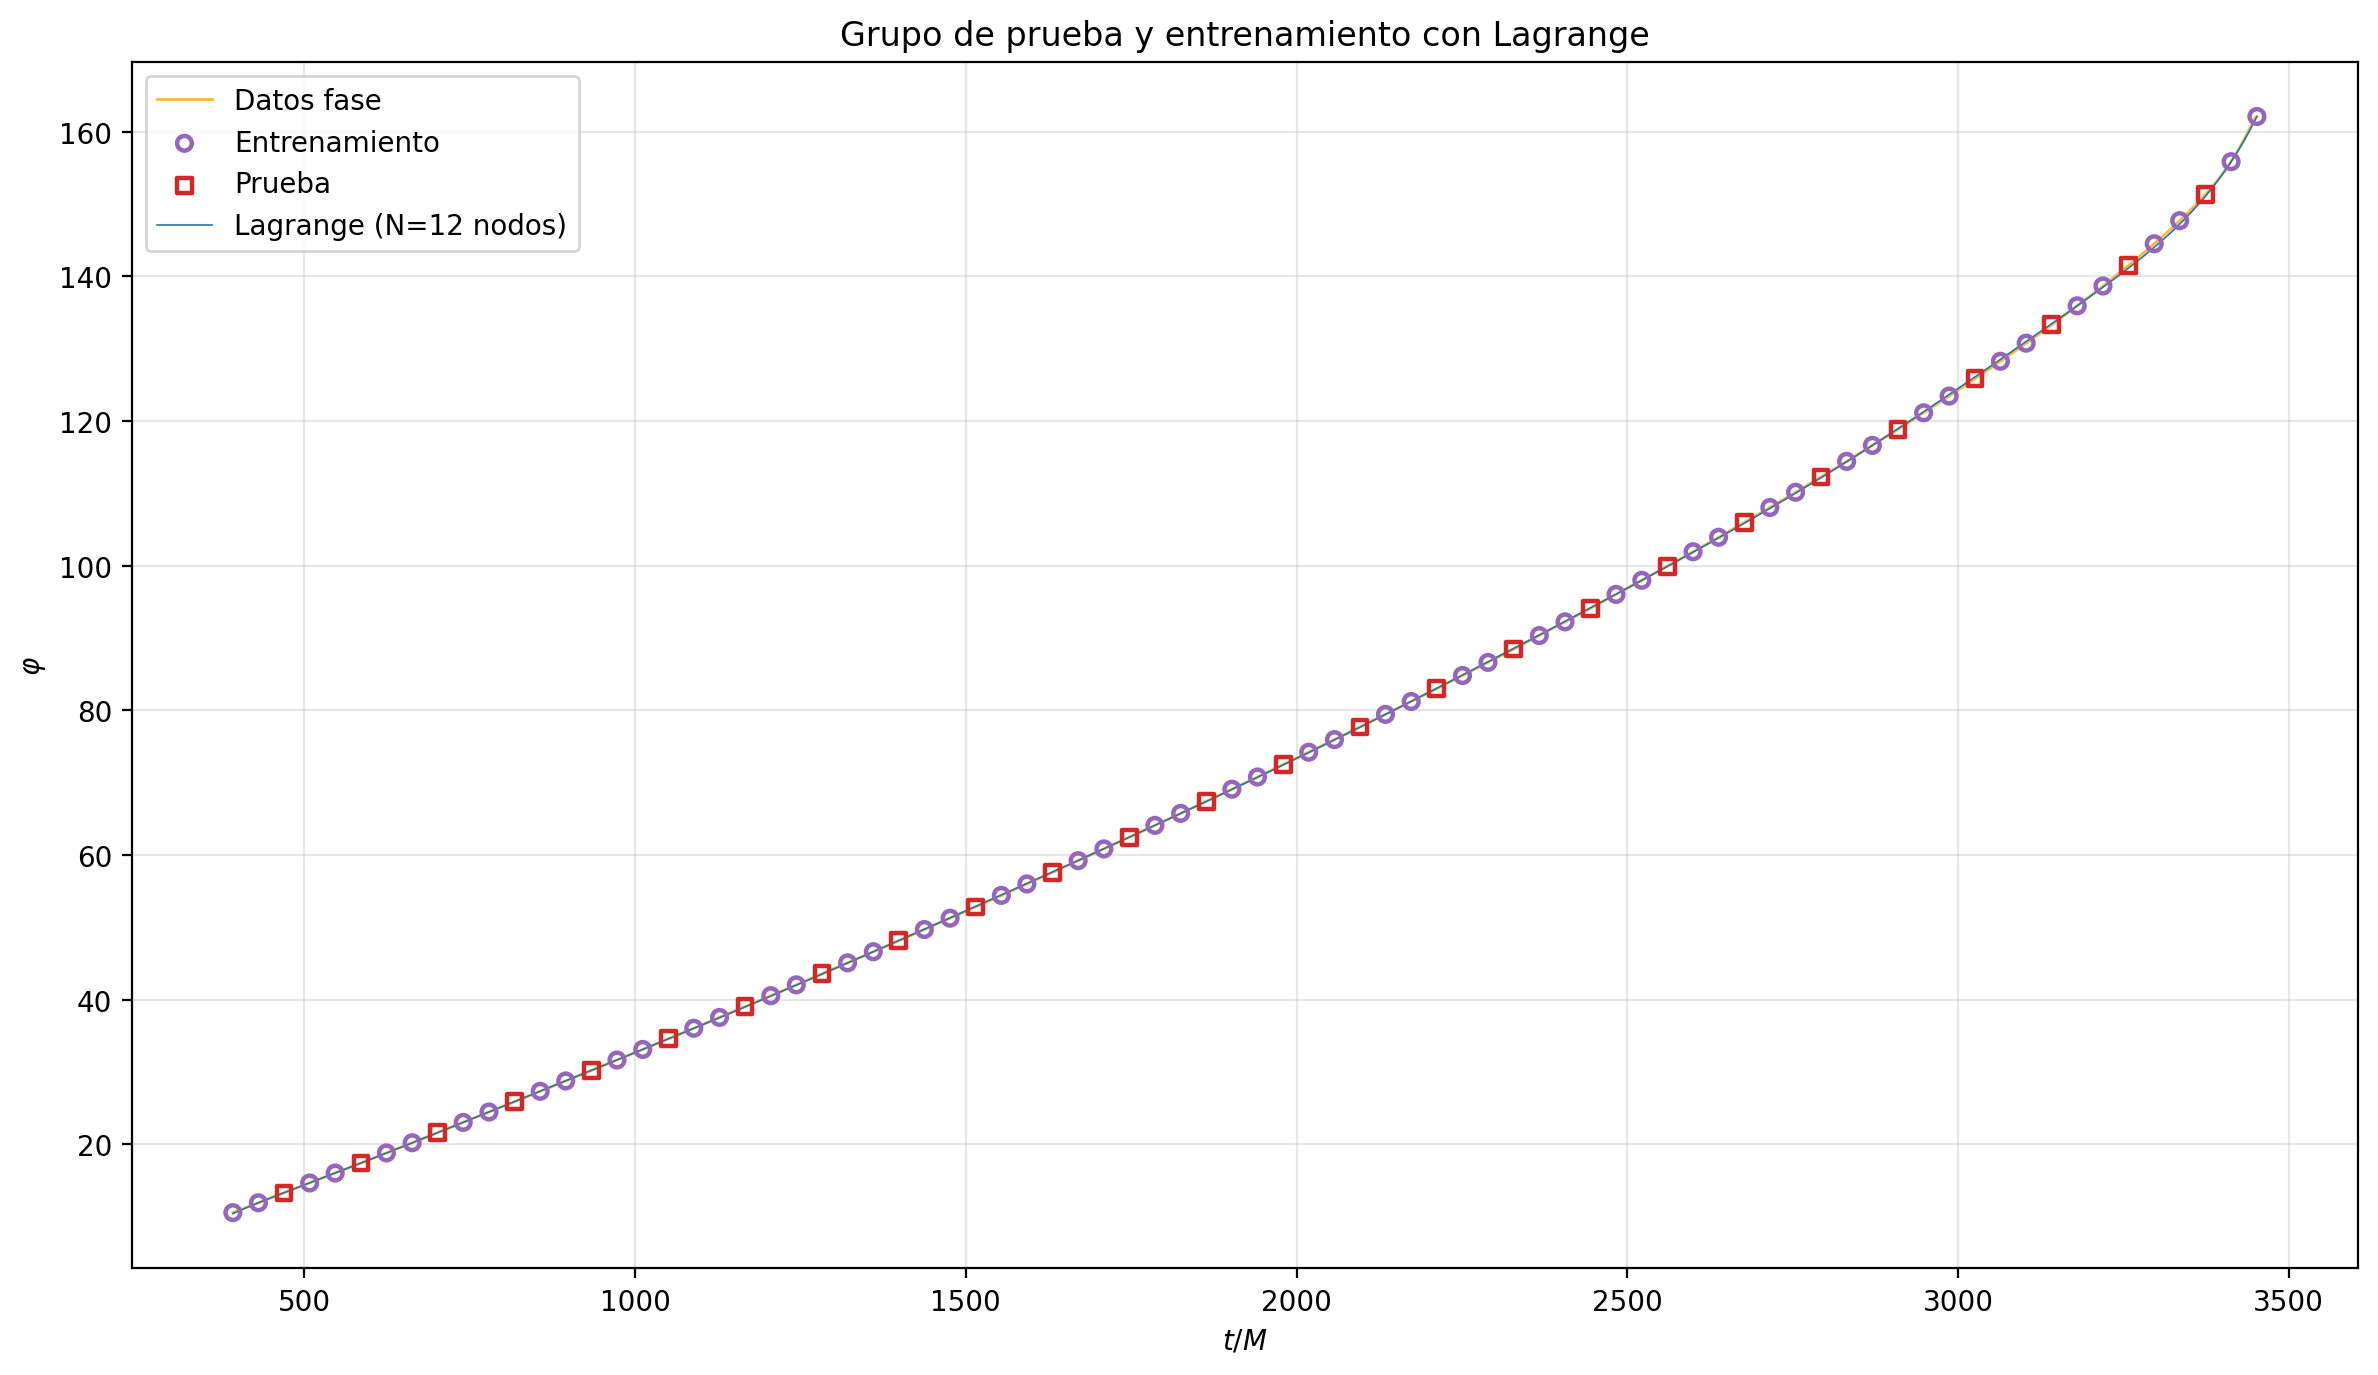

In [ ]:
n_total = 80
idx_all = np.arange(len(t_inc))
sel_idx = np.linspace(0, len(idx_all) - 1, n_total, dtype=int)

train_idx = sel_idx[::3]
train_idx = np.union1d(train_idx, sel_idx[1::3])
test_idx  = np.setdiff1d(sel_idx, train_idx)

train_idx = np.union1d(train_idx, [len(idx_all) - 1])

t_train_lagr, y_train_lagr = t_inc[train_idx], y_inc[train_idx]
t_test_lagr,  y_test_lagr  = t_inc[test_idx],  y_inc[test_idx]

print(f"[Lagrange] Entrenamiento: {t_train_lagr.size} | Prueba: {t_test_lagr.size} | Total muestreados: {sel_idx.size}")

from scipy.interpolate import lagrange

a_lagr, b_lagr = t_train_lagr.min(), t_train_lagr.max()
N_nodes = 12
k = np.arange(N_nodes)
t_cheb_lagr = 0.5*(a_lagr+b_lagr) + 0.5*(b_lagr-a_lagr)*np.cos((2*k+1)/(2*N_nodes)*np.pi)

idx_nodes_lagr = np.clip(np.searchsorted(t_train_lagr, t_cheb_lagr), 0, t_train_lagr.size-1)
idx_nodes_lagr = np.unique(idx_nodes_lagr)

P_lagr = lagrange(t_train_lagr[idx_nodes_lagr], y_train_lagr[idx_nodes_lagr])

t_dense_lagr = np.linspace(t_inc[0], t_inc[-1], 800)
phi_lagr_dense = P_lagr(t_dense_lagr)

plt.figure(figsize=(12,7))
plt.plot(t_inc, y_inc, lw=1.0, alpha=0.8, color="orange", label="Datos fase")
plt.scatter(t_train_lagr, y_train_lagr, s=28, facecolors='none', edgecolors='tab:purple',
            linewidths=1.6, label="Entrenamiento", zorder=3)
plt.scatter(t_test_lagr,  y_test_lagr,  s=28, facecolors='none', edgecolors='tab:red',
            marker='s', linewidths=1.6, label="Prueba", zorder=3)
plt.plot(t_dense_lagr, phi_lagr_dense, '-', lw=0.6, label=f"Lagrange (N={len(idx_nodes_lagr)} nodos)", zorder=2)
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.title("Grupo de prueba y entrenamiento con Lagrange")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### **Error para Lagrange**

===== Resultados globales Lagrange =====
Entrenamiento -> MSE = 1.451763e-02, MAE = 6.702905e-02
Prueba        -> MSE = 1.245200e-02, MAE = 7.259096e-02


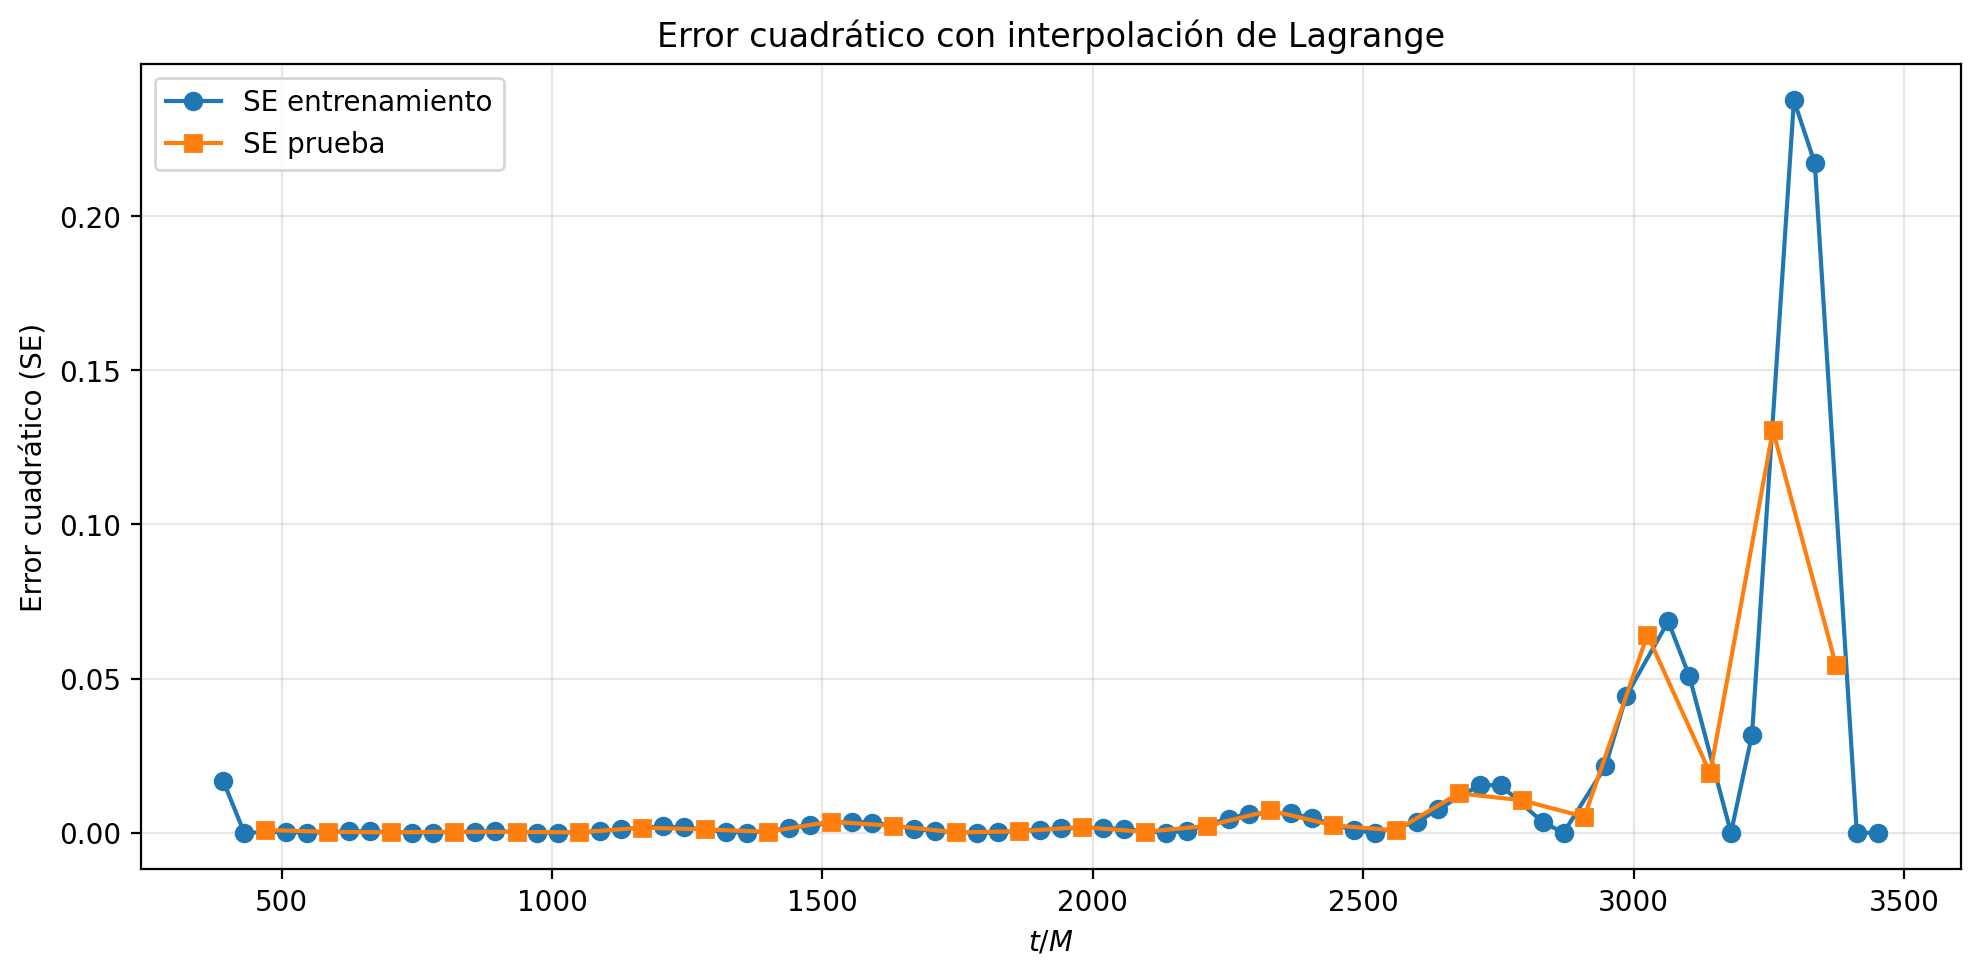

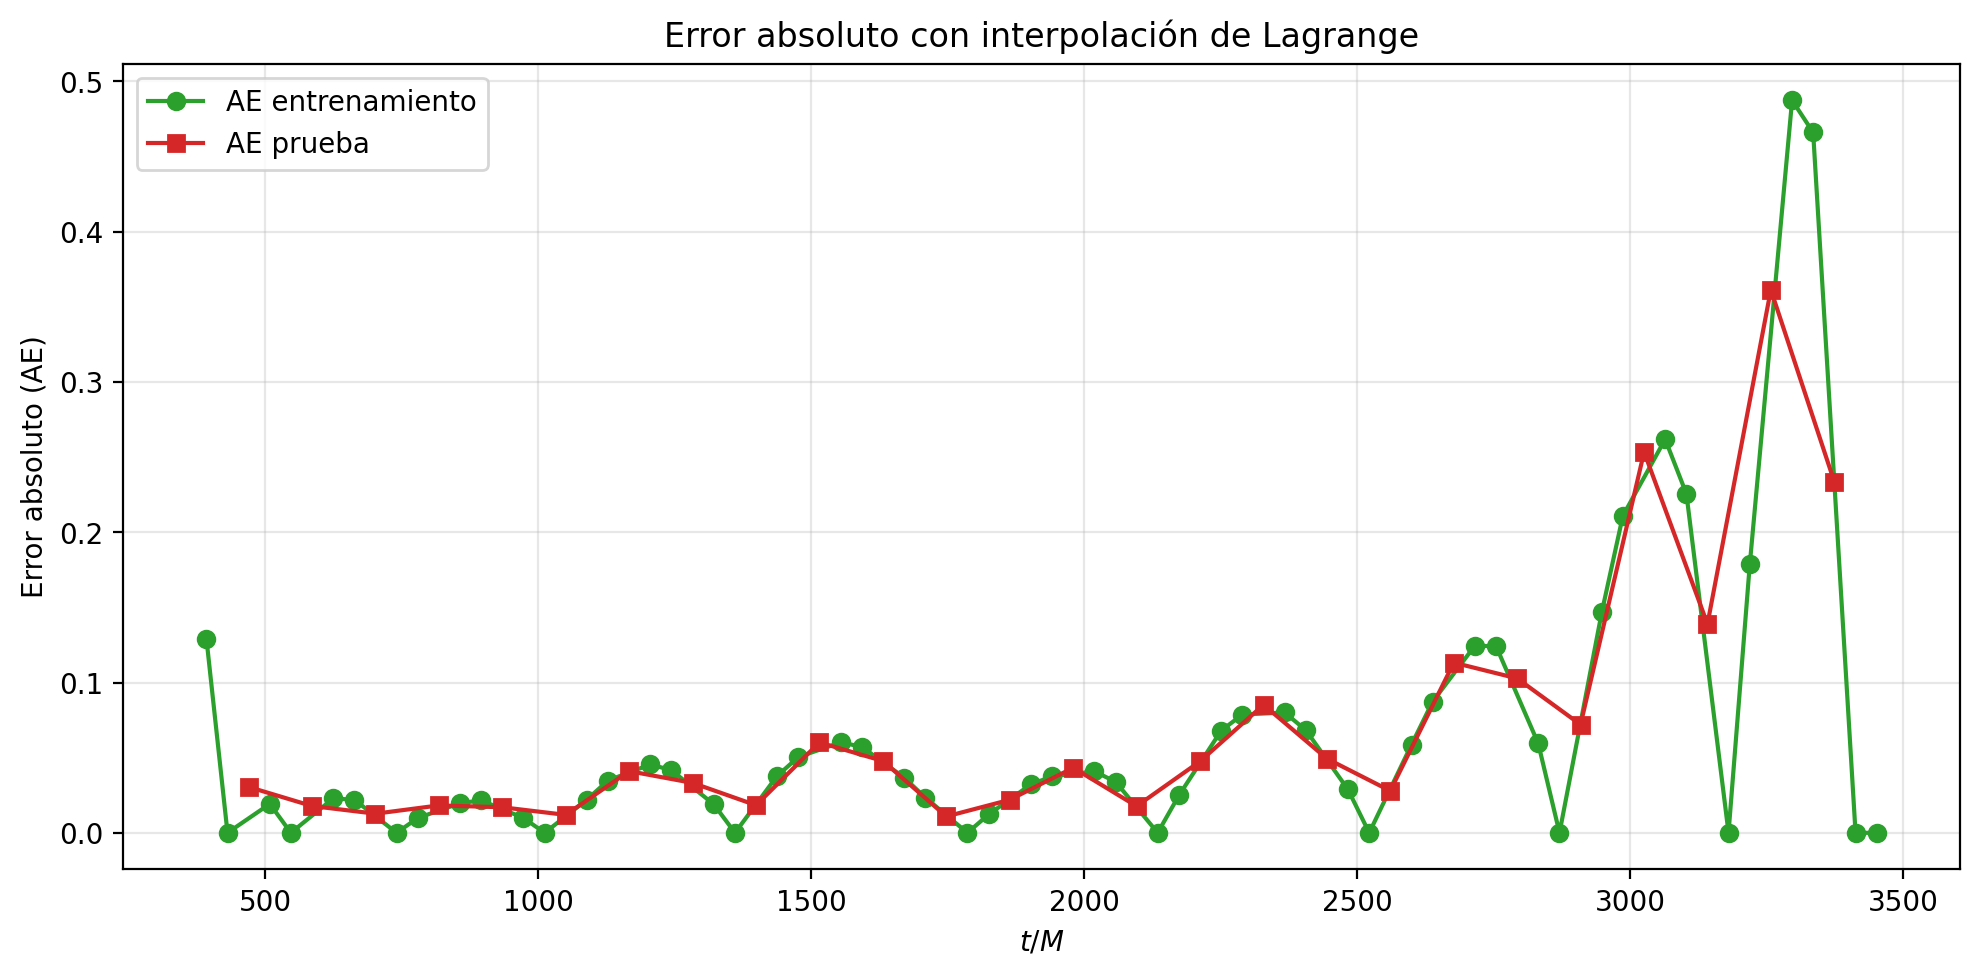

In [ ]:


#Predicciones con Lagrange:

y_hat_train_lagr = P_lagr(t_train_lagr)
y_hat_test_lagr  = P_lagr(t_test_lagr)


#Errores punto a punto.

SE_train_lagr = (y_train_lagr - y_hat_train_lagr)**2
SE_test_lagr  = (y_test_lagr - y_hat_test_lagr)**2

# Error absoluto
AE_train_lagr = np.abs(y_train_lagr - y_hat_train_lagr)
AE_test_lagr  = np.abs(y_test_lagr - y_hat_test_lagr)


#Errores promedio.

MSE_train_lagr = SE_train_lagr.mean()
MSE_test_lagr  = SE_test_lagr.mean()

MAE_train_lagr = AE_train_lagr.mean()
MAE_test_lagr  = AE_test_lagr.mean()


print("===== Resultados globales Lagrange =====")
print(f"Entrenamiento -> MSE = {MSE_train_lagr:.6e}, MAE = {MAE_train_lagr:.6e}")
print(f"Prueba        -> MSE = {MSE_test_lagr:.6e}, MAE = {MAE_test_lagr:.6e}")


#Gráfica: error cuadrático.

plt.figure(figsize=(10,5))
plt.plot(t_train_lagr, SE_train_lagr, 'o-', label="SE entrenamiento", color="tab:blue")
plt.plot(t_test_lagr, SE_test_lagr, 's-', label="SE prueba", color="tab:orange")
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático con interpolación de Lagrange")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Gráfica: error absoluto

plt.figure(figsize=(10,5))
plt.plot(t_train_lagr, AE_train_lagr, 'o-', label="AE entrenamiento", color="tab:green")
plt.plot(t_test_lagr, AE_test_lagr, 's-', label="AE prueba", color="tab:red")
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto con interpolación de Lagrange")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Para CubicSpline (natural):**

[CubicSpline natural] Entrenamiento: 54 | Prueba: 26 | Total muestreados: 80


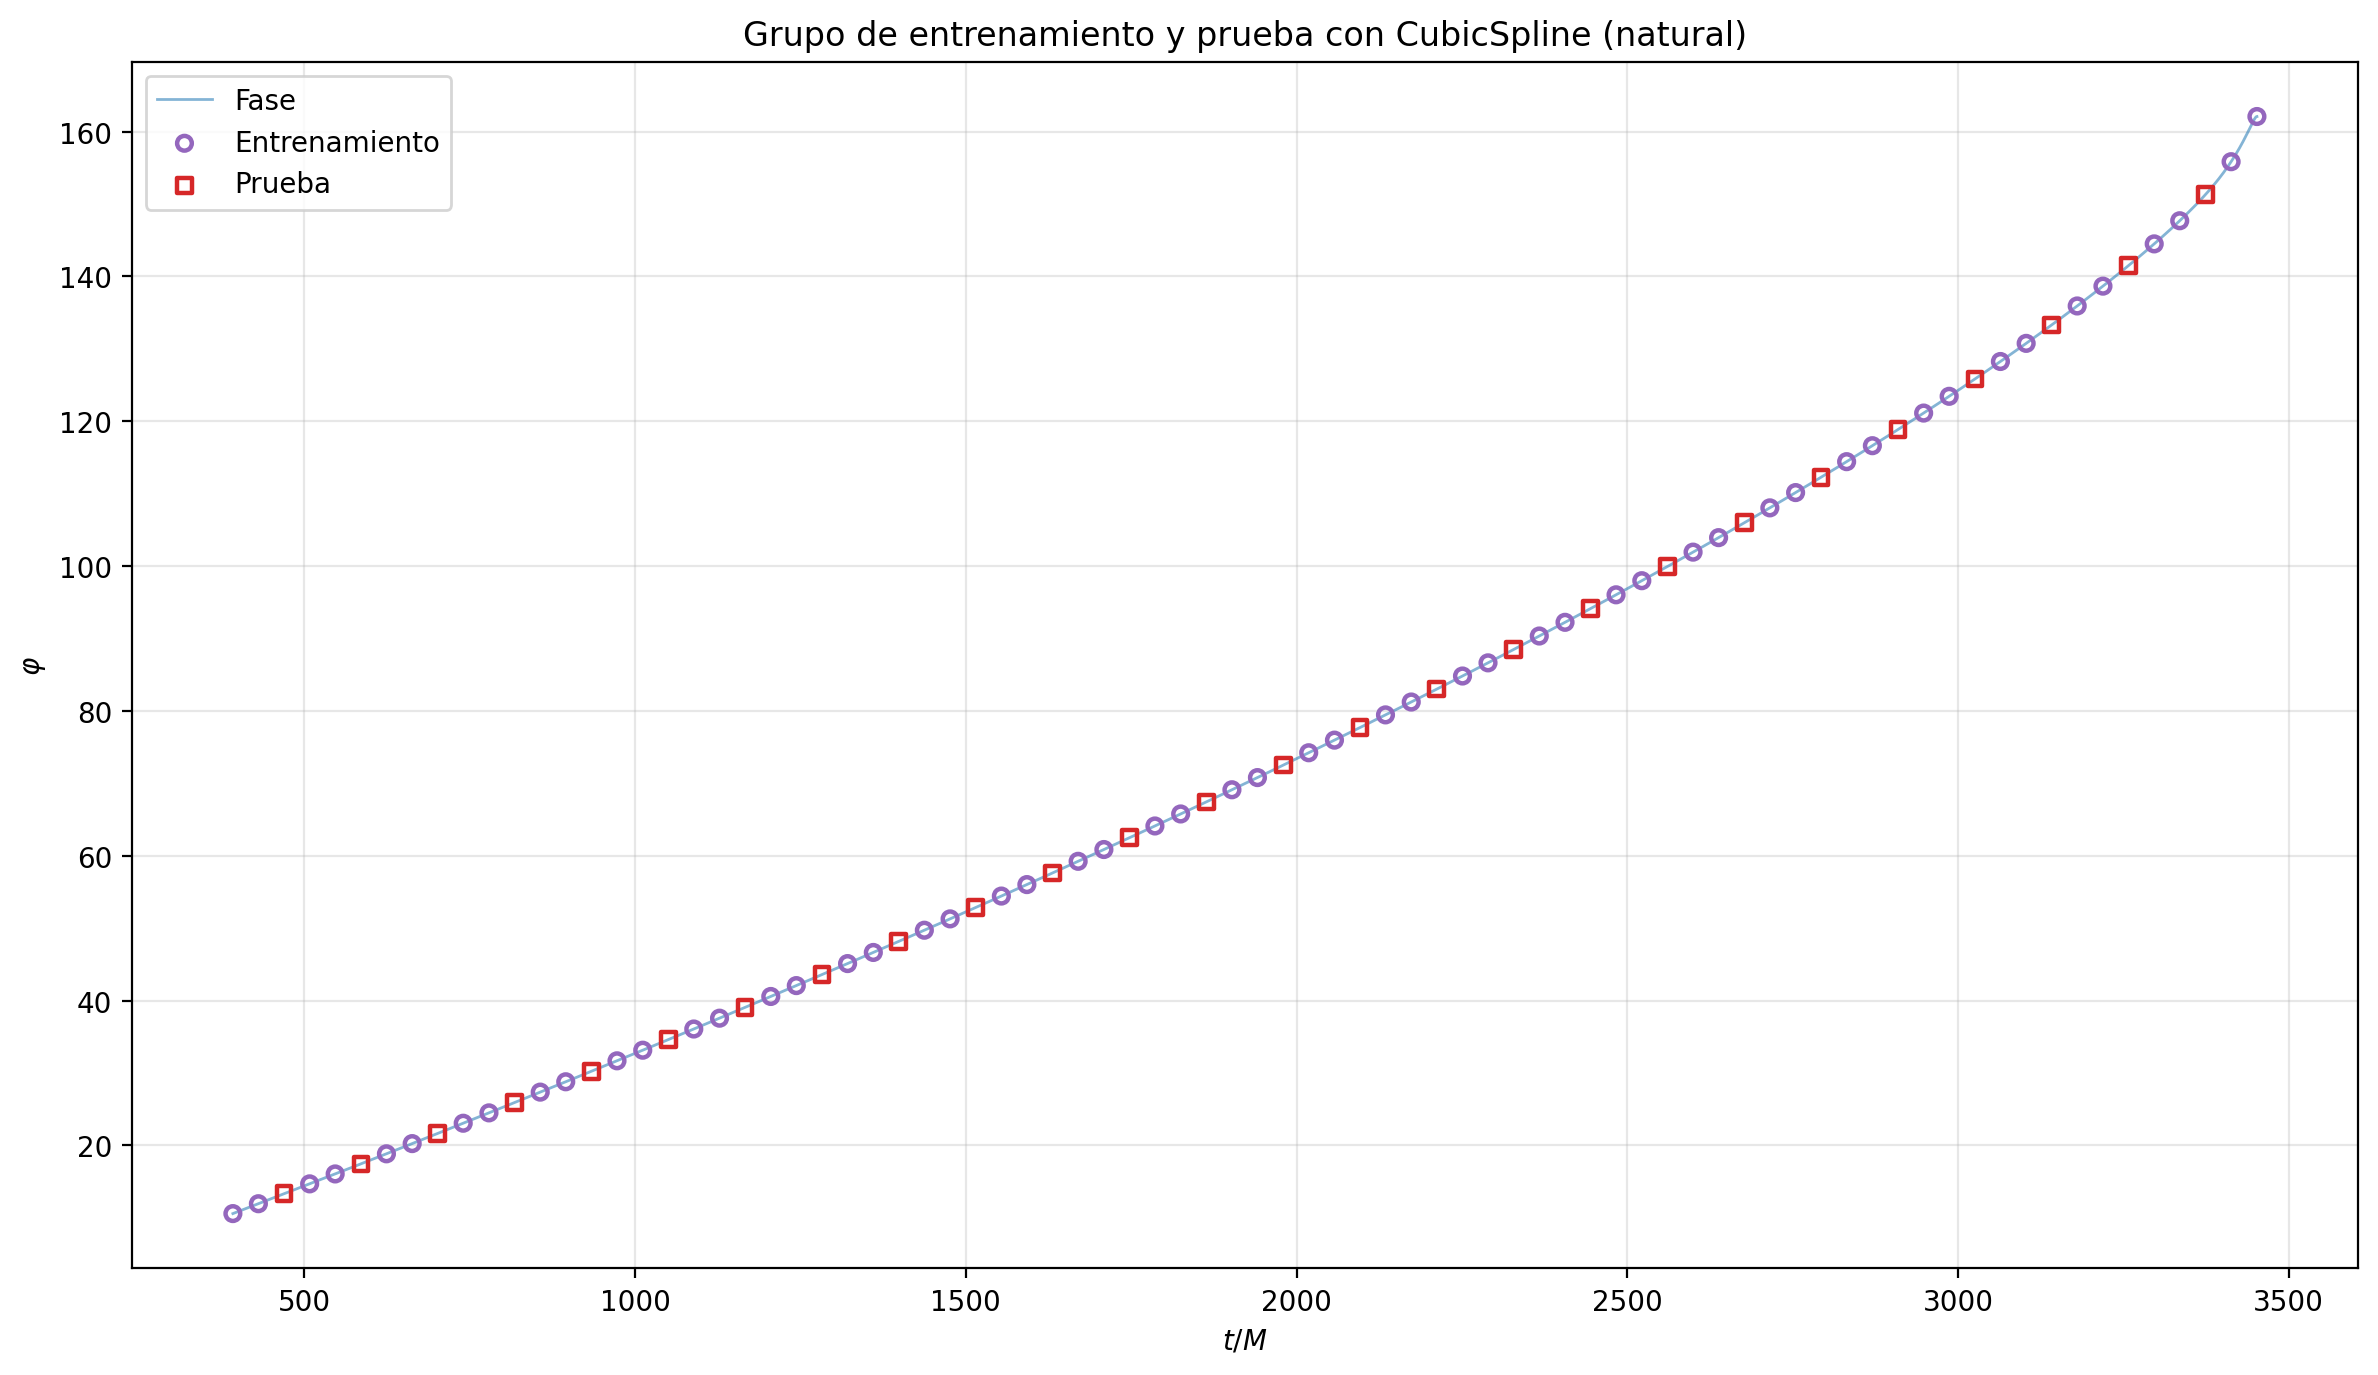

In [ ]:
n_total = 80
idx_all = np.arange(len(t_inc))
sel_idx = np.linspace(0, len(idx_all) - 1, n_total, dtype=int)
sel_idx = np.unique(sel_idx)

sel_idx[0]  = 0
sel_idx[-1] = len(idx_all) - 1

train_idx = sel_idx[::3]
train_idx = np.union1d(train_idx, sel_idx[1::3])
test_idx  = np.setdiff1d(sel_idx, train_idx)

train_idx = np.union1d(train_idx, [len(idx_all) - 1])

t_train_spl, y_train_spl = t_inc[train_idx], y_inc[train_idx]
t_test_spl,  y_test_spl  = t_inc[test_idx],  y_inc[test_idx]

print(f"[CubicSpline natural] Entrenamiento: {t_train_spl.size} | Prueba: {t_test_spl.size} | Total muestreados: {sel_idx.size}")

cs_nat_train = CubicSpline(t_train_spl, y_train_spl, bc_type='natural')

t_dense_spl   = np.linspace(t_inc[0], t_inc[-1], 800)
phi_spl_dense = cs_nat_train(t_dense_spl)

plt.figure(figsize=(12,7))
plt.plot(t_inc, y_inc, lw=1.0, alpha=0.55, label="Fase")
plt.scatter(t_train_spl, y_train_spl, s=28, facecolors='none', edgecolors='tab:purple',
            linewidths=1.6, label="Entrenamiento", zorder=3)
plt.scatter(t_test_spl,  y_test_spl,  s=28, facecolors='none', edgecolors='tab:red',
            marker='s', linewidths=1.6, label="Prueba", zorder=3)

plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.title("Grupo de entrenamiento y prueba con CubicSpline (natural)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### **Error para CubicSpline (natural):**

===== Resultados globales CubicSpline (natural) =====
Entrenamiento -> MSE = 0.000000e+00, MAE = 0.000000e+00
Prueba        -> MSE = 2.692831e-04, MAE = 4.794452e-03


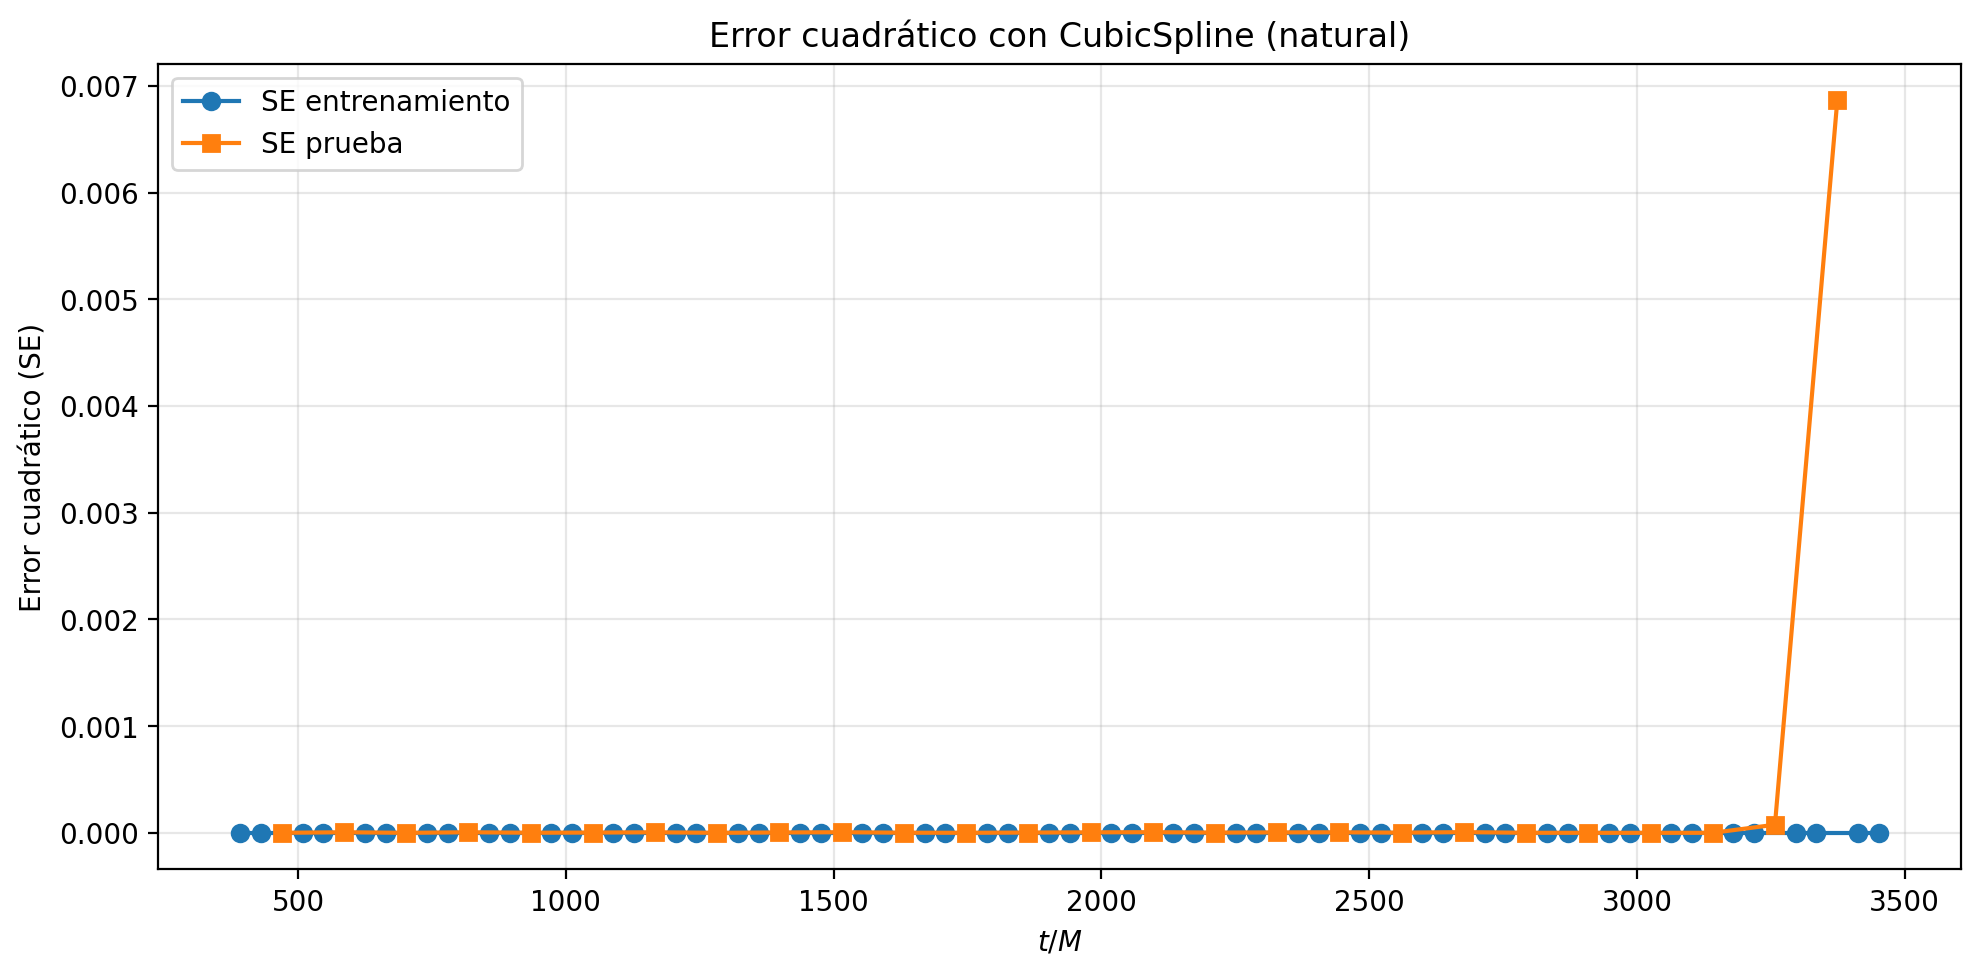

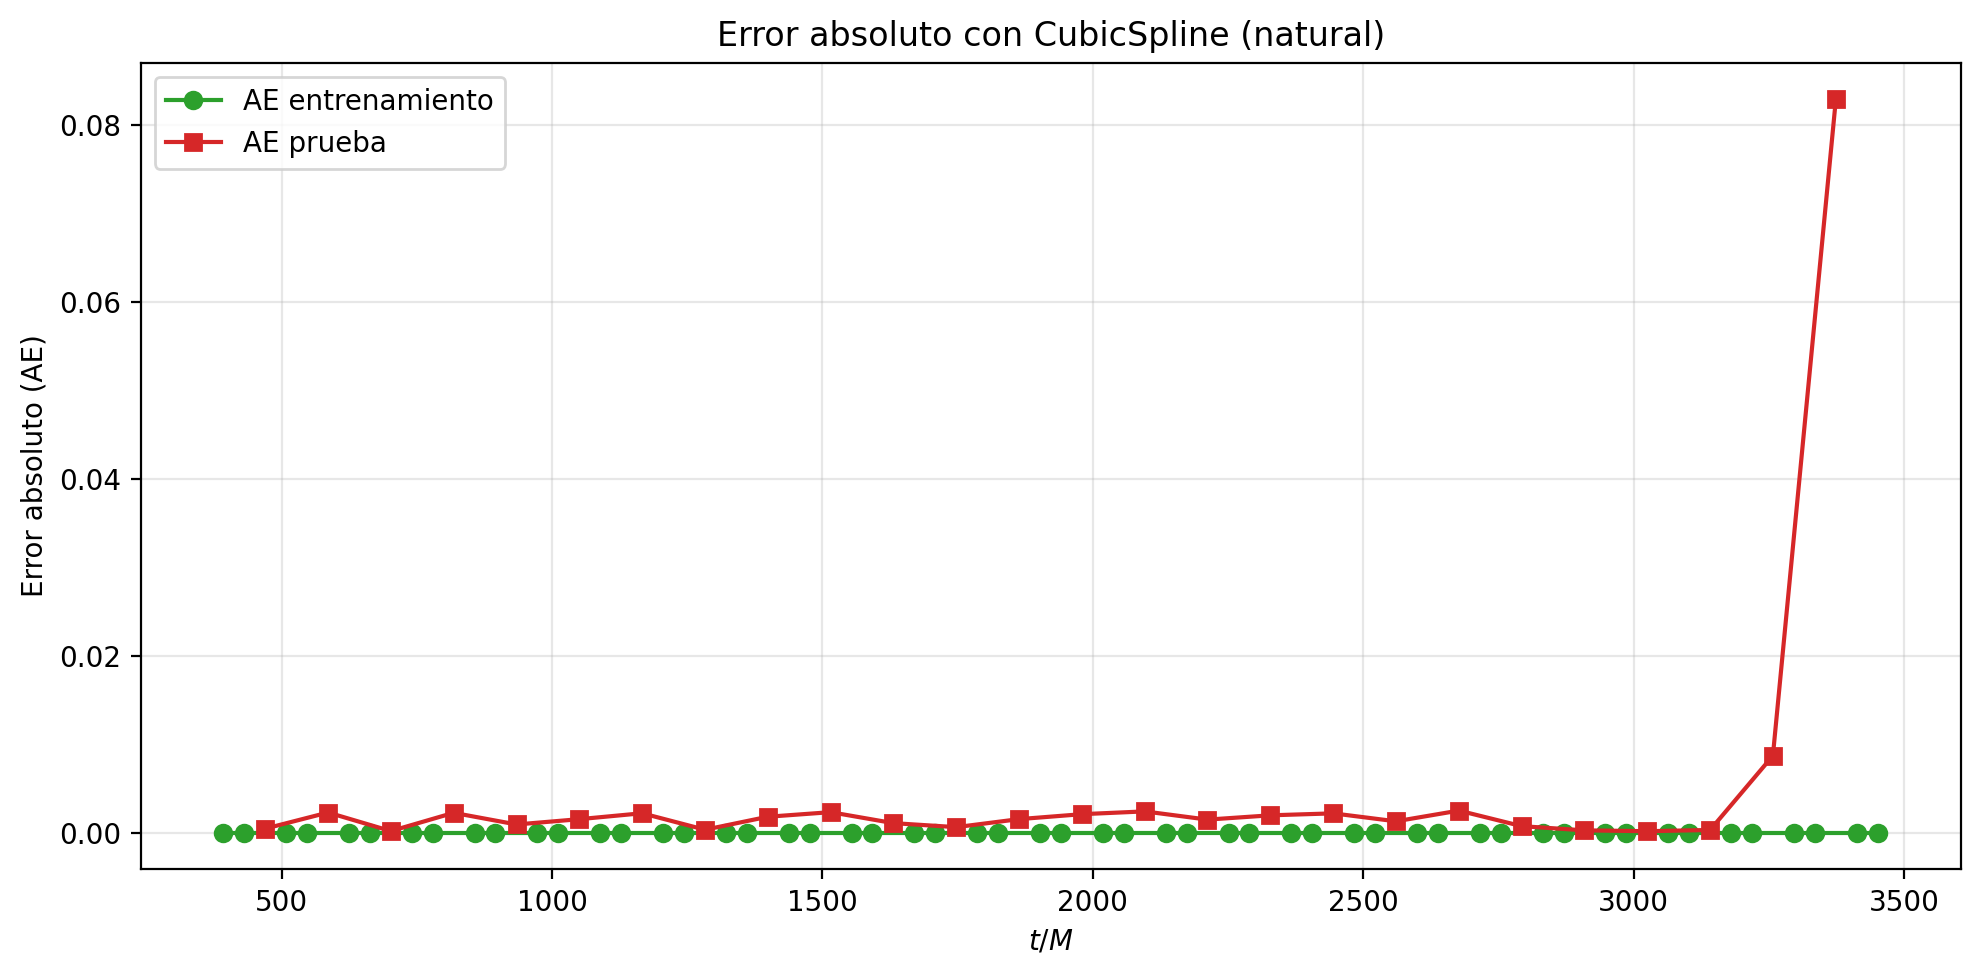

In [ ]:
#Predicciones con CubicSpline natural.

y_hat_train_spl = cs_nat_train(t_train_spl)
y_hat_test_spl  = cs_nat_train(t_test_spl)

# Errores punto a punto.

SE_train_spl = (y_train_spl - y_hat_train_spl)**2
SE_test_spl  = (y_test_spl - y_hat_test_spl)**2

#Error absoluto.
AE_train_spl = np.abs(y_train_spl - y_hat_train_spl)
AE_test_spl  = np.abs(y_test_spl - y_hat_test_spl)


#Errores promedio.

MSE_train_spl = SE_train_spl.mean()
MSE_test_spl  = SE_test_spl.mean()

MAE_train_spl = AE_train_spl.mean()
MAE_test_spl  = AE_test_spl.mean()

print("===== Resultados globales CubicSpline (natural) =====")
print(f"Entrenamiento -> MSE = {MSE_train_spl:.6e}, MAE = {MAE_train_spl:.6e}")
print(f"Prueba        -> MSE = {MSE_test_spl:.6e}, MAE = {MAE_test_spl:.6e}")


#Gráfica: error cuadrático.

plt.figure(figsize=(10,5))
plt.plot(t_train_spl, SE_train_spl, 'o-', label="SE entrenamiento", color="tab:blue")
plt.plot(t_test_spl, SE_test_spl, 's-', label="SE prueba", color="tab:orange")
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático con CubicSpline (natural)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#Gráfica: error absoluto.

plt.figure(figsize=(10,5))
plt.plot(t_train_spl, AE_train_spl, 'o-', label="AE entrenamiento", color="tab:green")
plt.plot(t_test_spl, AE_test_spl, 's-', label="AE prueba", color="tab:red")
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto con CubicSpline (natural)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Para CubicSpline not-a-knot:**


[CubicSpline not-a-knot] Entrenamiento: 54 | Prueba: 26 | Total muestreados: 80


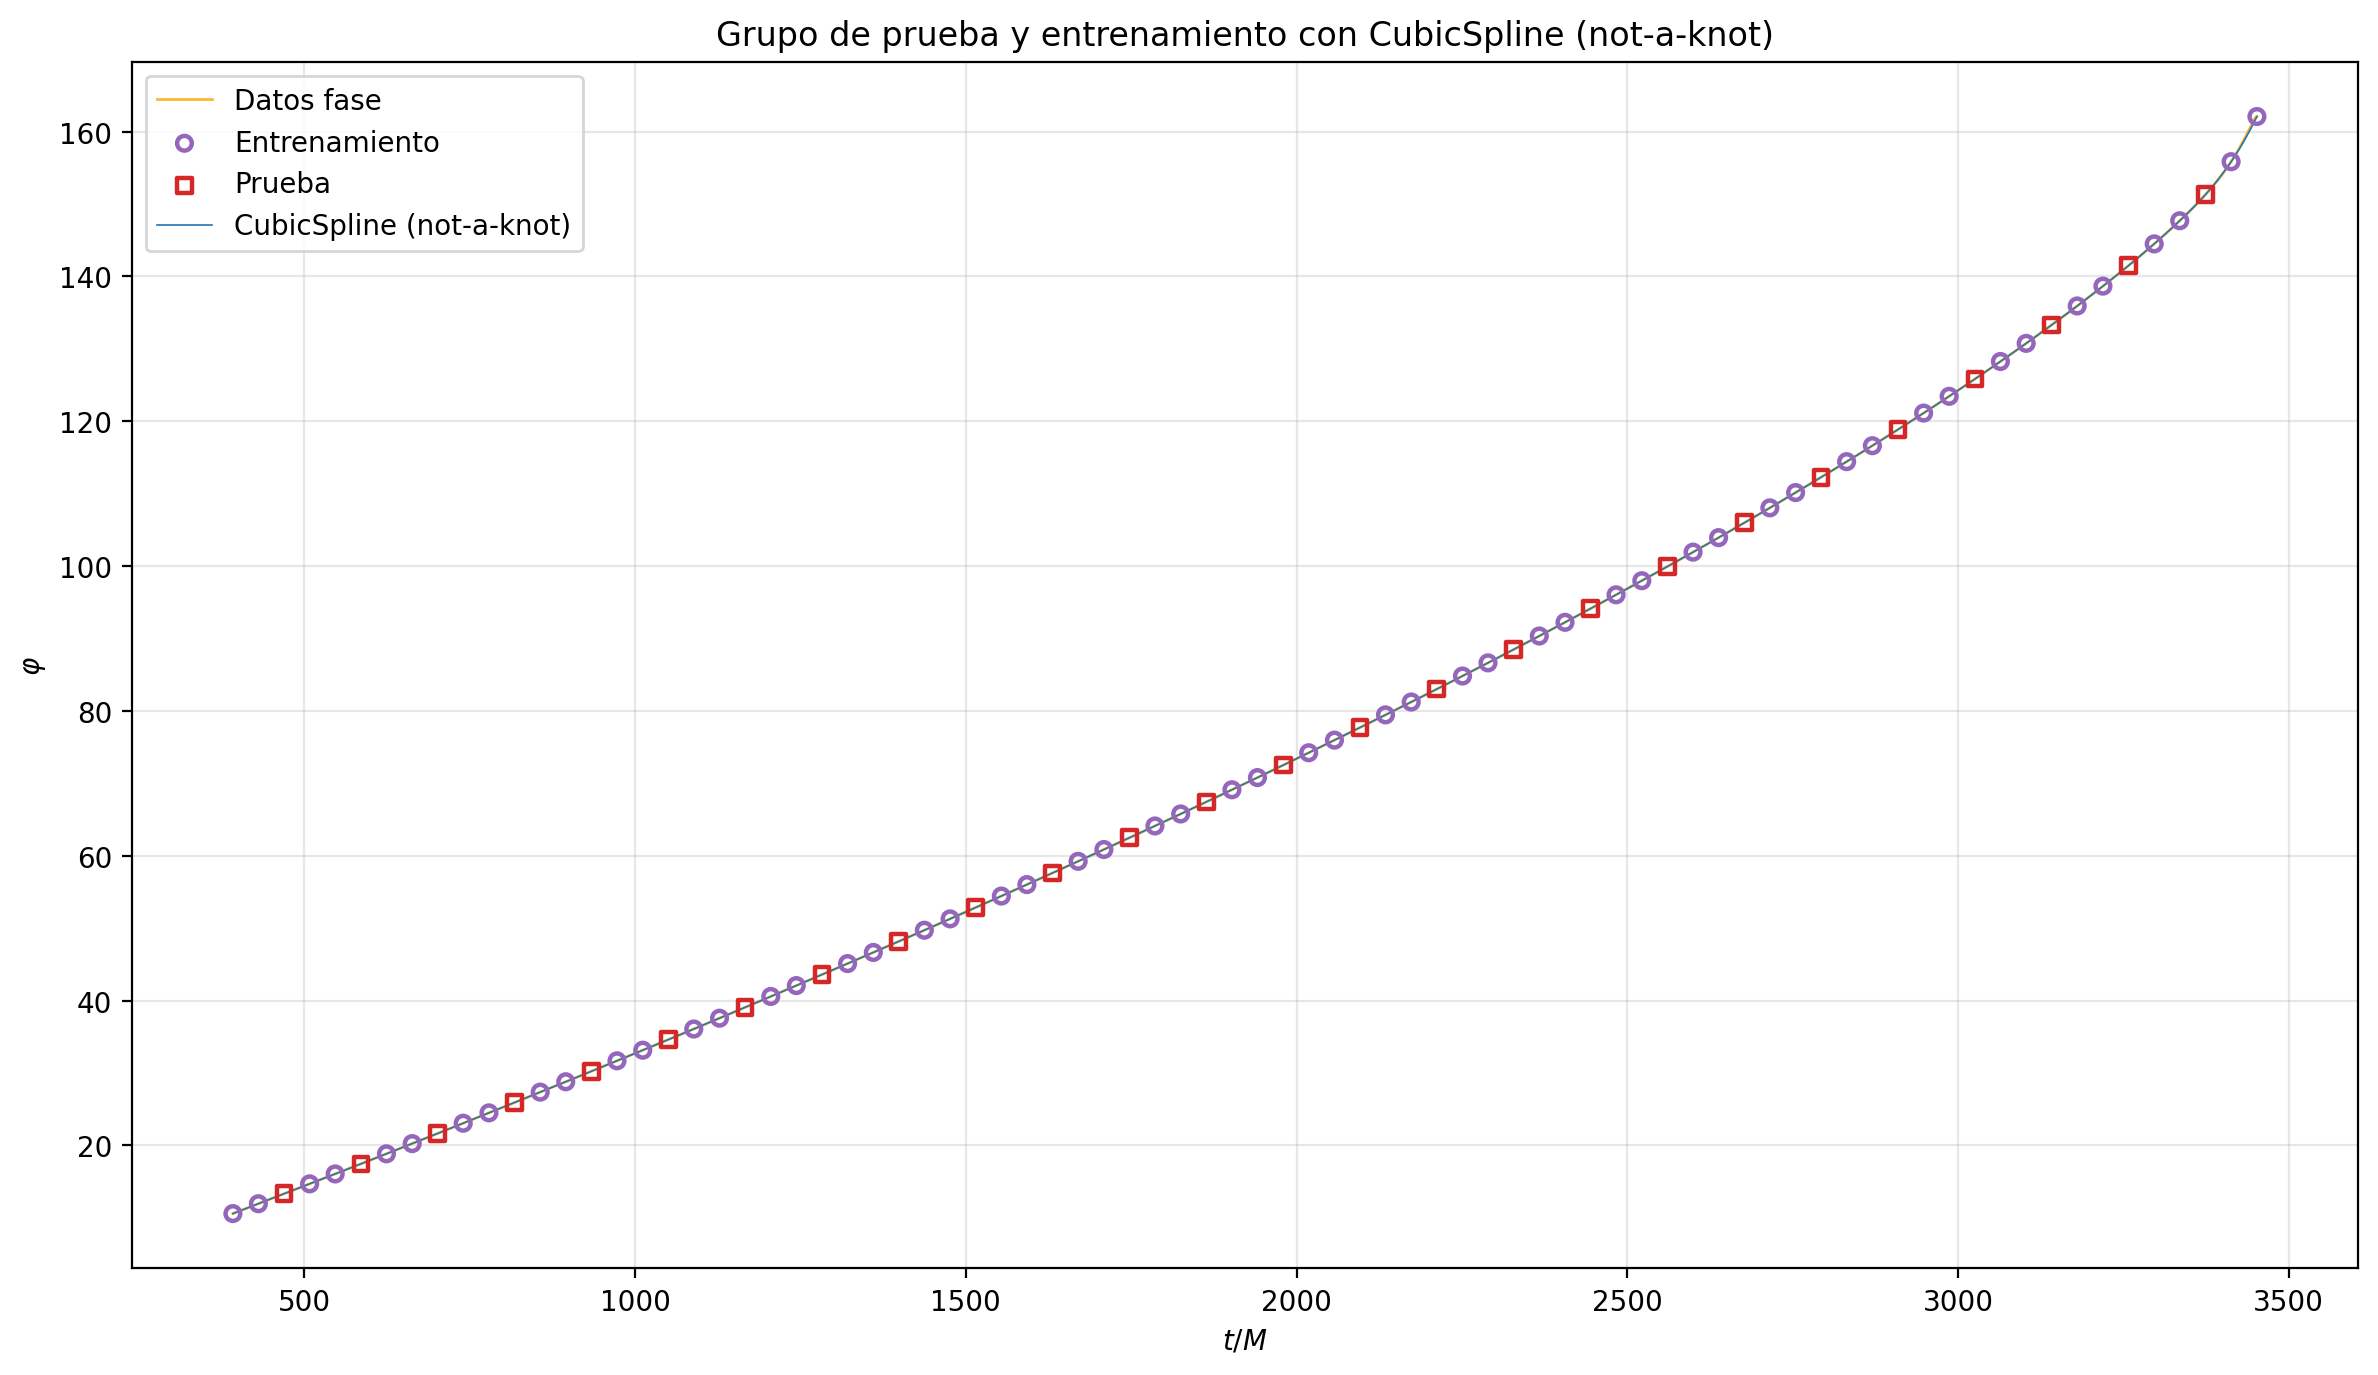

In [ ]:
#División en entrenamiento y prueba:

n_total = 80
idx_all = np.arange(len(t_inc))
sel_idx = np.linspace(0, len(idx_all) - 1, n_total, dtype=int)

train_idx = sel_idx[::3]
train_idx = np.union1d(train_idx, sel_idx[1::3])
test_idx  = np.setdiff1d(sel_idx, train_idx)

train_idx = np.union1d(train_idx, [len(idx_all) - 1])

t_train_nak, y_train_nak = t_inc[train_idx], y_inc[train_idx]
t_test_nak,  y_test_nak  = t_inc[test_idx],  y_inc[test_idx]

print(f"[CubicSpline not-a-knot] Entrenamiento: {t_train_nak.size} | Prueba: {t_test_nak.size} | Total muestreados: {sel_idx.size}")

#Interpolación con CubicSpline (not-a-knot):

cs_nak = CubicSpline(t_train_nak, y_train_nak, bc_type='not-a-knot')

t_dense = np.linspace(t_inc[0], t_inc[-1], 600)
y_dense_nak = cs_nak(t_dense)

#Gráfica: interpolación.

plt.figure(figsize=(12,7))
plt.plot(t_inc, y_inc, lw=1.0, alpha=0.8, color="orange", label="Datos fase")
plt.scatter(t_train_nak, y_train_nak, s=28, facecolors='none', edgecolors='tab:purple',
            linewidths=1.6, label="Entrenamiento", zorder=3)
plt.scatter(t_test_nak,  y_test_nak,  s=28, facecolors='none', edgecolors='tab:red',
            marker='s', linewidths=1.6, label="Prueba", zorder=3)
plt.plot(t_dense, y_dense_nak, '-', lw=0.6, label="CubicSpline (not-a-knot)", color="tab:blue", zorder=2)
plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.title("Grupo de prueba y entrenamiento con CubicSpline (not-a-knot)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Error para CubicSpline not-a-knot:**


===== Resultados globales CubicSpline (not-a-knot) =====
Entrenamiento -> MSE = 1.495914e-29, MAE = 5.263280e-16
Prueba        -> MSE = 7.204784e-06, MAE = 1.820077e-03


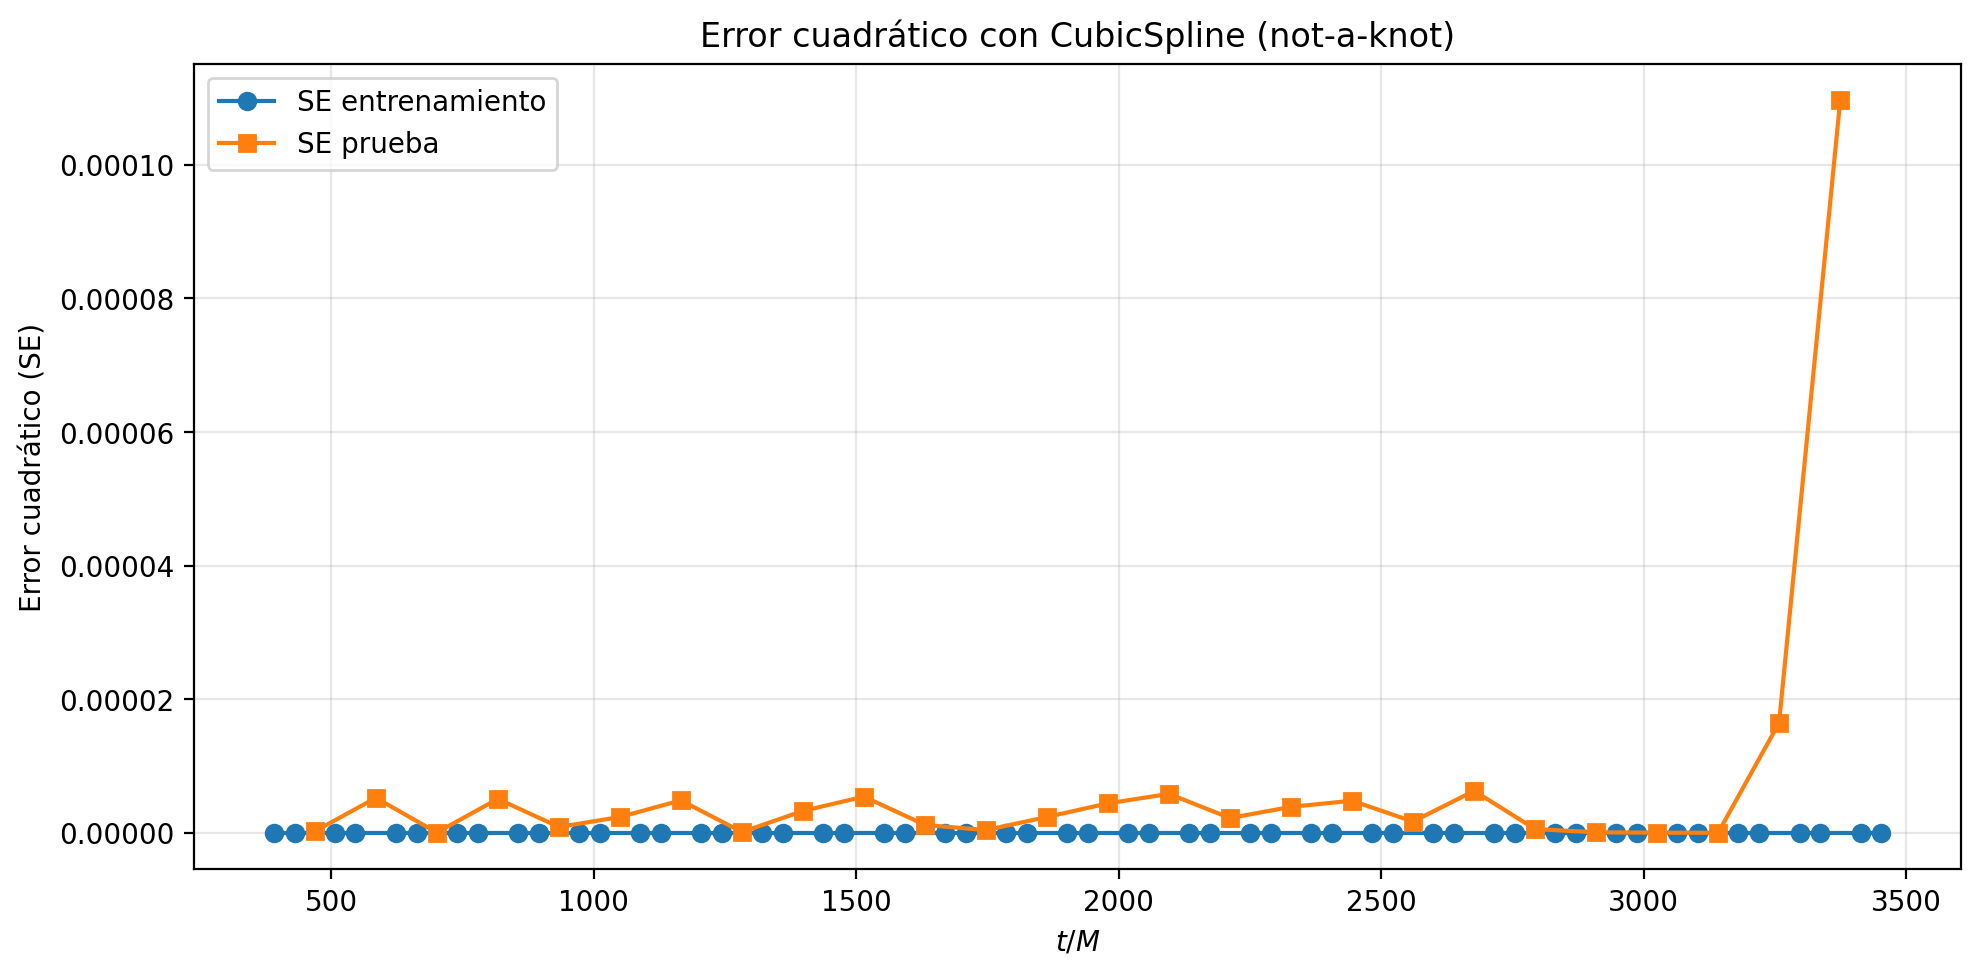

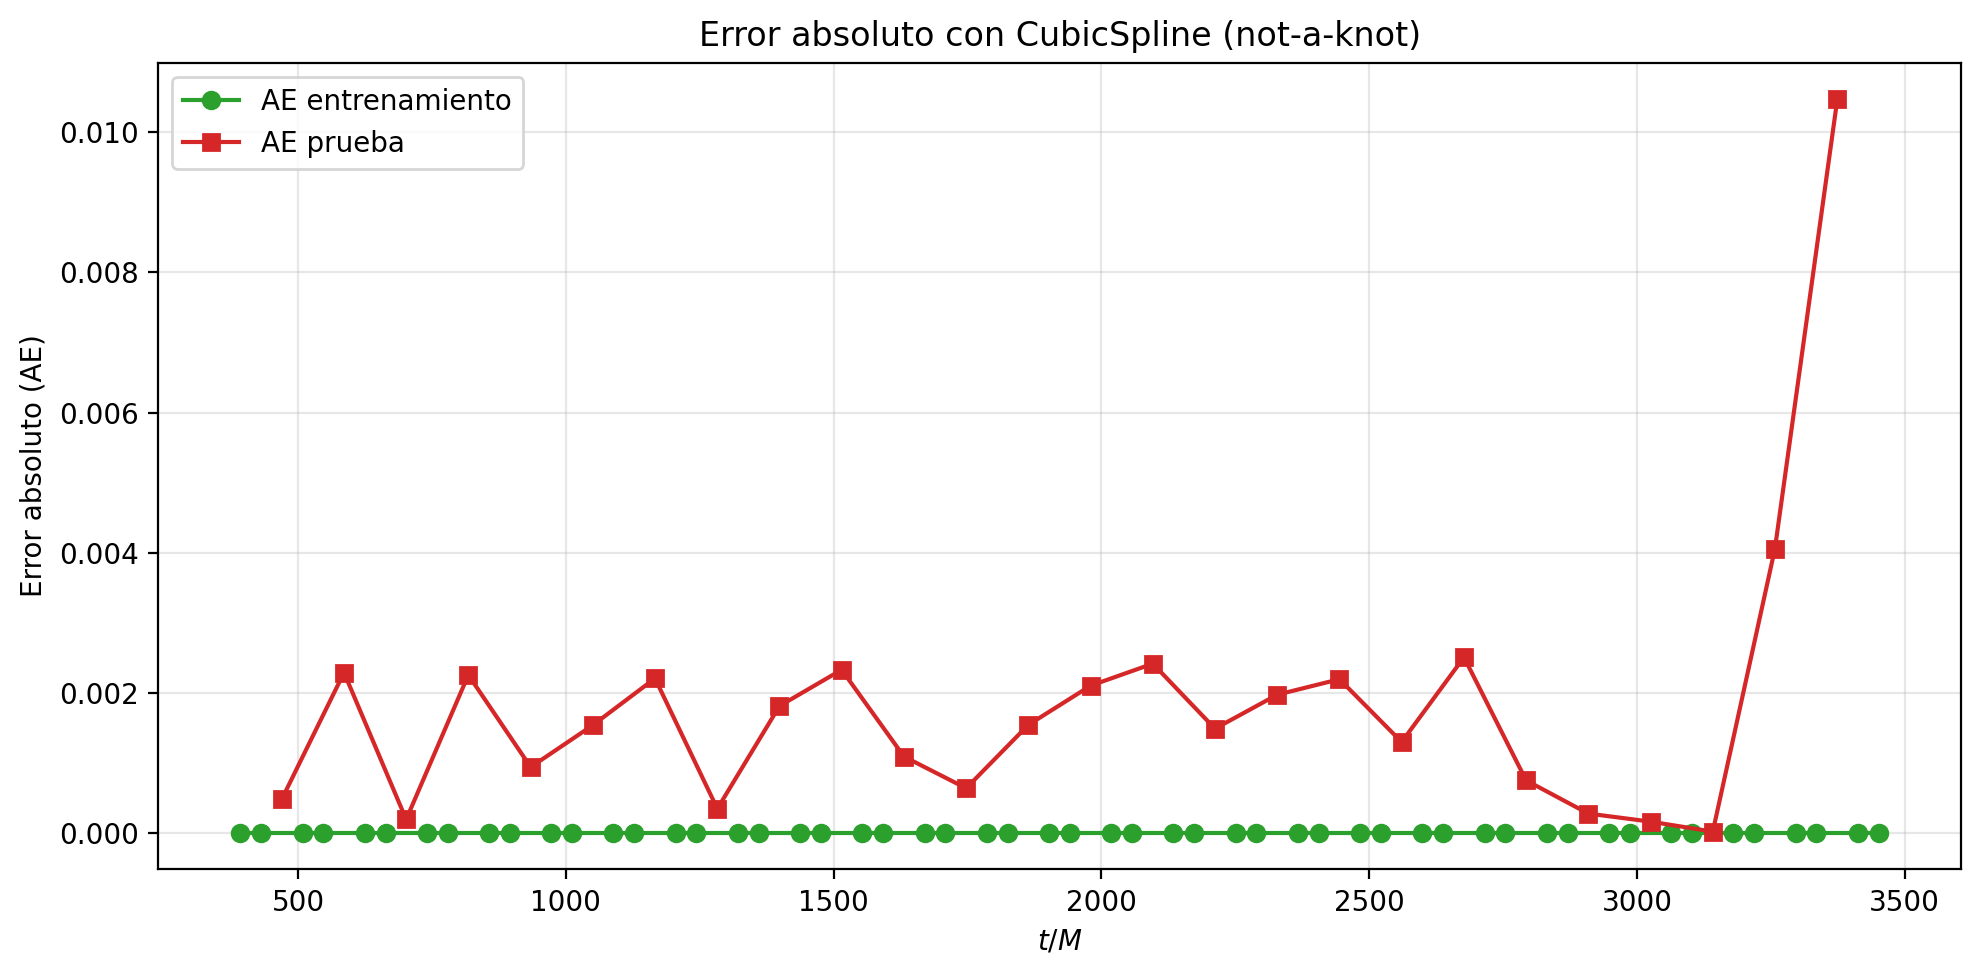

In [ ]:
#Predicciones con CubicSpline not-a-knot.

y_hat_train_nak = cs_nak(t_train_nak)
y_hat_test_nak  = cs_nak(t_test_nak)

#Errores punto a punto.

SE_train_nak = (y_train_nak - y_hat_train_nak)**2
SE_test_nak  = (y_test_nak - y_hat_test_nak)**2

#Error absoluto
AE_train_nak = np.abs(y_train_nak - y_hat_train_nak)
AE_test_nak  = np.abs(y_test_nak - y_hat_test_nak)


#Errores promedio.

MSE_train_nak = SE_train_nak.mean()
MSE_test_nak  = SE_test_nak.mean()

MAE_train_nak = AE_train_nak.mean()
MAE_test_nak  = AE_test_nak.mean()

print("===== Resultados globales CubicSpline (not-a-knot) =====")
print(f"Entrenamiento -> MSE = {MSE_train_nak:.6e}, MAE = {MAE_train_nak:.6e}")
print(f"Prueba        -> MSE = {MSE_test_nak:.6e}, MAE = {MAE_test_nak:.6e}")

# Gráfica: error cuadrático.

plt.figure(figsize=(10,5))
plt.plot(t_train_nak, SE_train_nak, 'o-', label="SE entrenamiento", color="tab:blue")
plt.plot(t_test_nak, SE_test_nak, 's-', label="SE prueba", color="tab:orange")
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático con CubicSpline (not-a-knot)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#Gráfica: error absoluto.

plt.figure(figsize=(10,5))
plt.plot(t_train_nak, AE_train_nak, 'o-', label="AE entrenamiento", color="tab:green")
plt.plot(t_test_nak, AE_test_nak, 's-', label="AE prueba", color="tab:red")
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto con CubicSpline (not-a-knot)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Para PCHIP:**

[PCHIP] Entrenamiento: 54 | Prueba: 26 | Total muestreados: 80


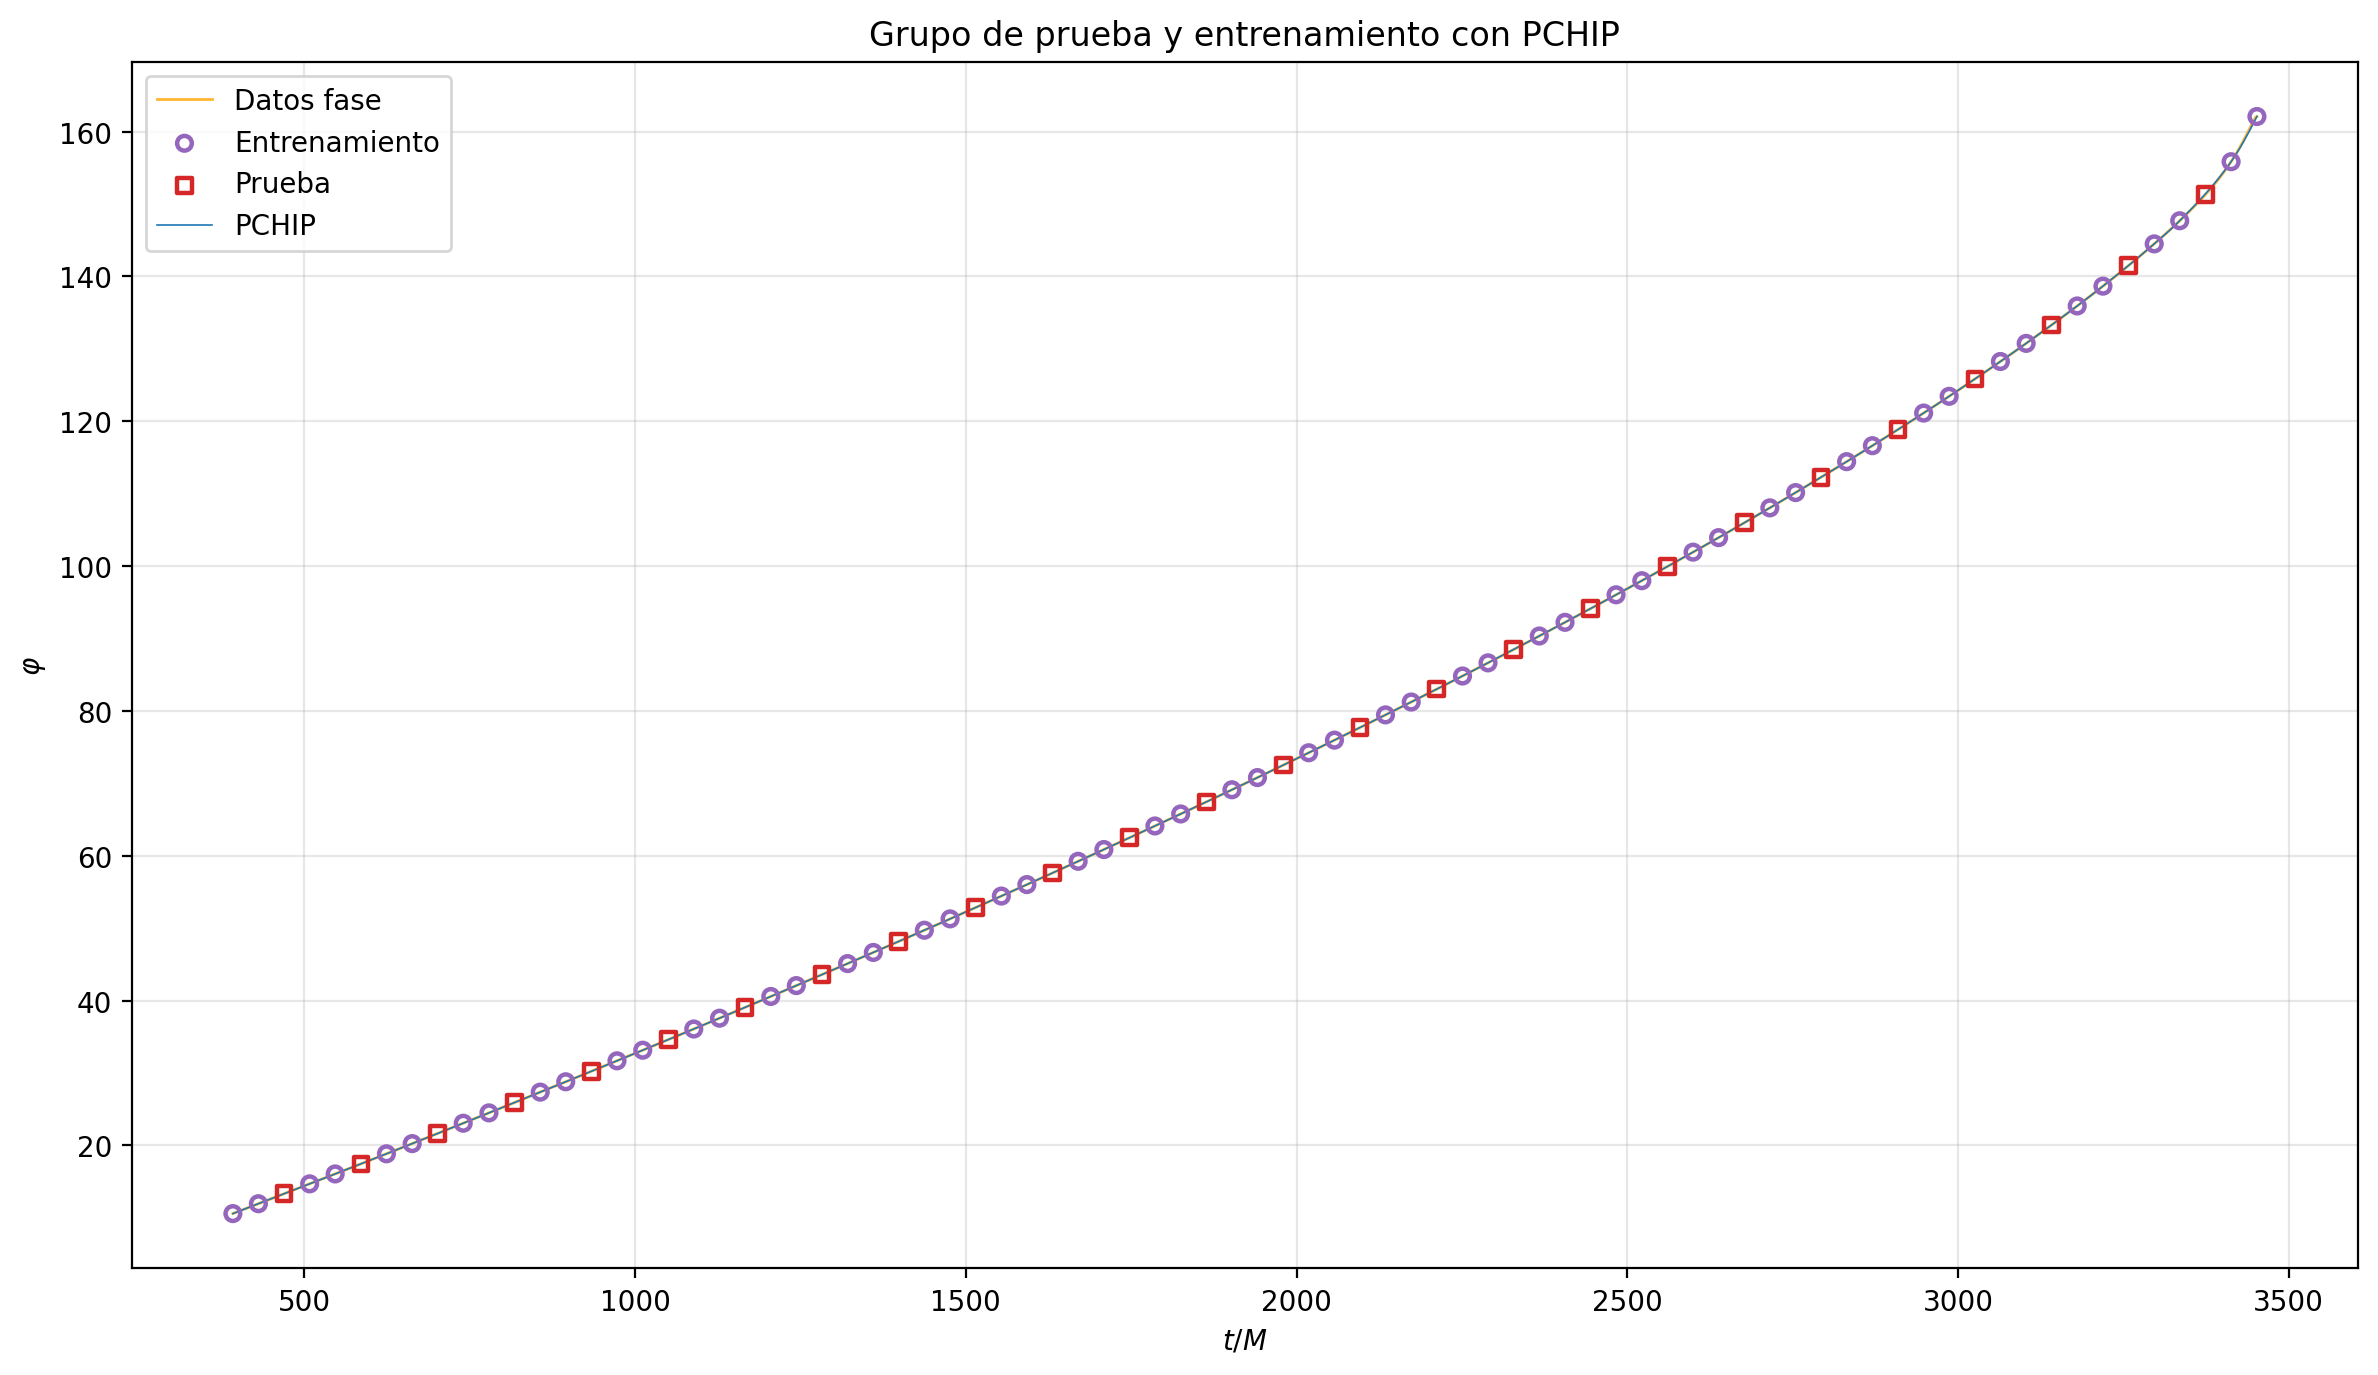

In [ ]:
from scipy.interpolate import PchipInterpolator


#Definición de grupos

n_total = 80
idx_all = np.arange(len(t_inc))
sel_idx = np.linspace(0, len(idx_all) - 1, n_total, dtype=int)

train_idx = sel_idx[::3]
train_idx = np.union1d(train_idx, sel_idx[1::3])
test_idx  = np.setdiff1d(sel_idx, train_idx)

train_idx = np.union1d(train_idx, [len(idx_all) - 1])

t_train_pchip, y_train_pchip = t_inc[train_idx], y_inc[train_idx]
t_test_pchip,  y_test_pchip  = t_inc[test_idx],  y_inc[test_idx]

print(f"[PCHIP] Entrenamiento: {t_train_pchip.size} | Prueba: {t_test_pchip.size} | Total muestreados: {sel_idx.size}")

#Interpolación PCHIP:

pchip = PchipInterpolator(t_train_pchip, y_train_pchip)

t_dense_pchip = np.linspace(t_inc[0], t_inc[-1], 800)
phi_pchip_dense = pchip(t_dense_pchip)


#Gráfica.

plt.figure(figsize=(12,7))
plt.plot(t_inc, y_inc, lw=1.0, alpha=0.8, color="orange", label="Datos fase")

# Puntos de entrenamiento
plt.scatter(t_train_pchip, y_train_pchip, s=28, facecolors='none', edgecolors='tab:purple',
            linewidths=1.6, label="Entrenamiento", zorder=3)

#Puntos de prueba.

plt.scatter(t_test_pchip, y_test_pchip, s=28, facecolors='none', edgecolors='tab:red',
            marker='s', linewidths=1.6, label="Prueba", zorder=3)

#Curva interpolada.

plt.plot(t_dense_pchip, phi_pchip_dense, '-', lw=0.6, color="tab:blue",
         label="PCHIP", zorder=2)

plt.xlabel(r"$t/M$")
plt.ylabel(r"$\varphi$")
plt.title("Grupo de prueba y entrenamiento con PCHIP")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

###**Error para PCHIP:**

===== Resultados globales PCHIP =====
Entrenamiento -> MSE = 1.495914e-29, MAE = 5.263280e-16
Prueba        -> MSE = 3.796647e-04, MAE = 5.757875e-03


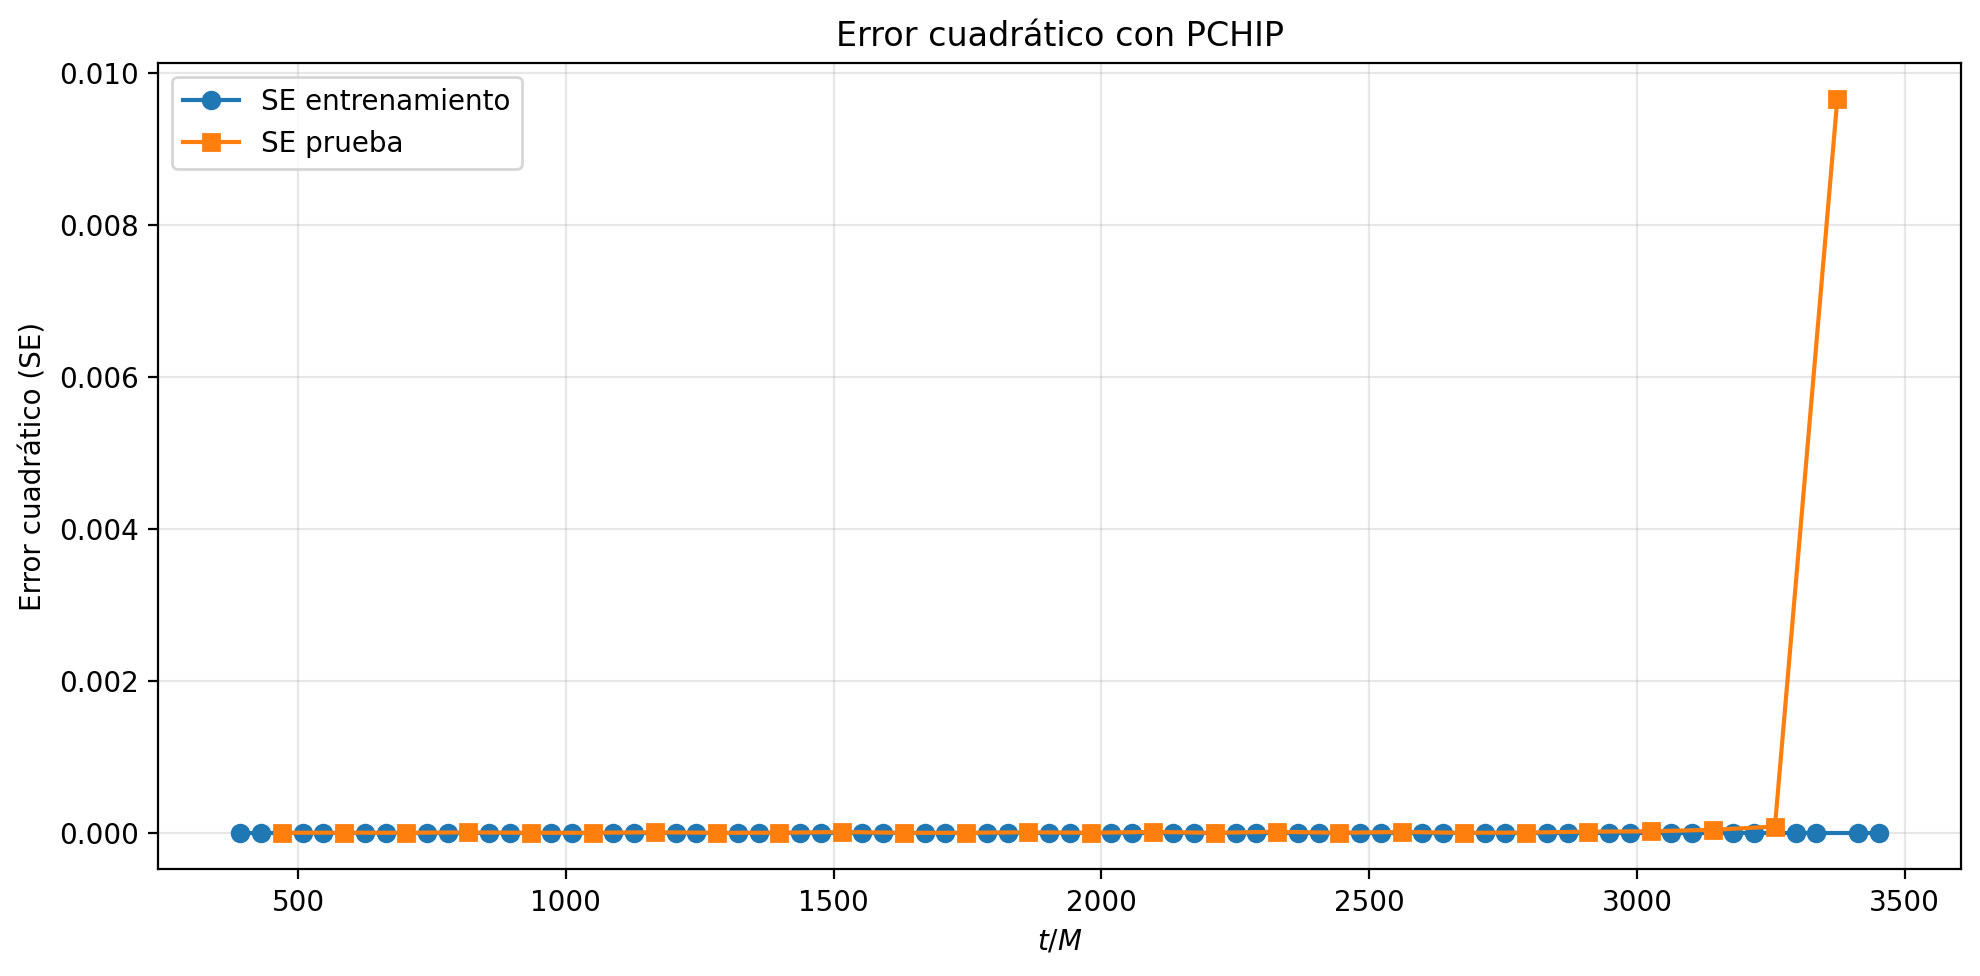

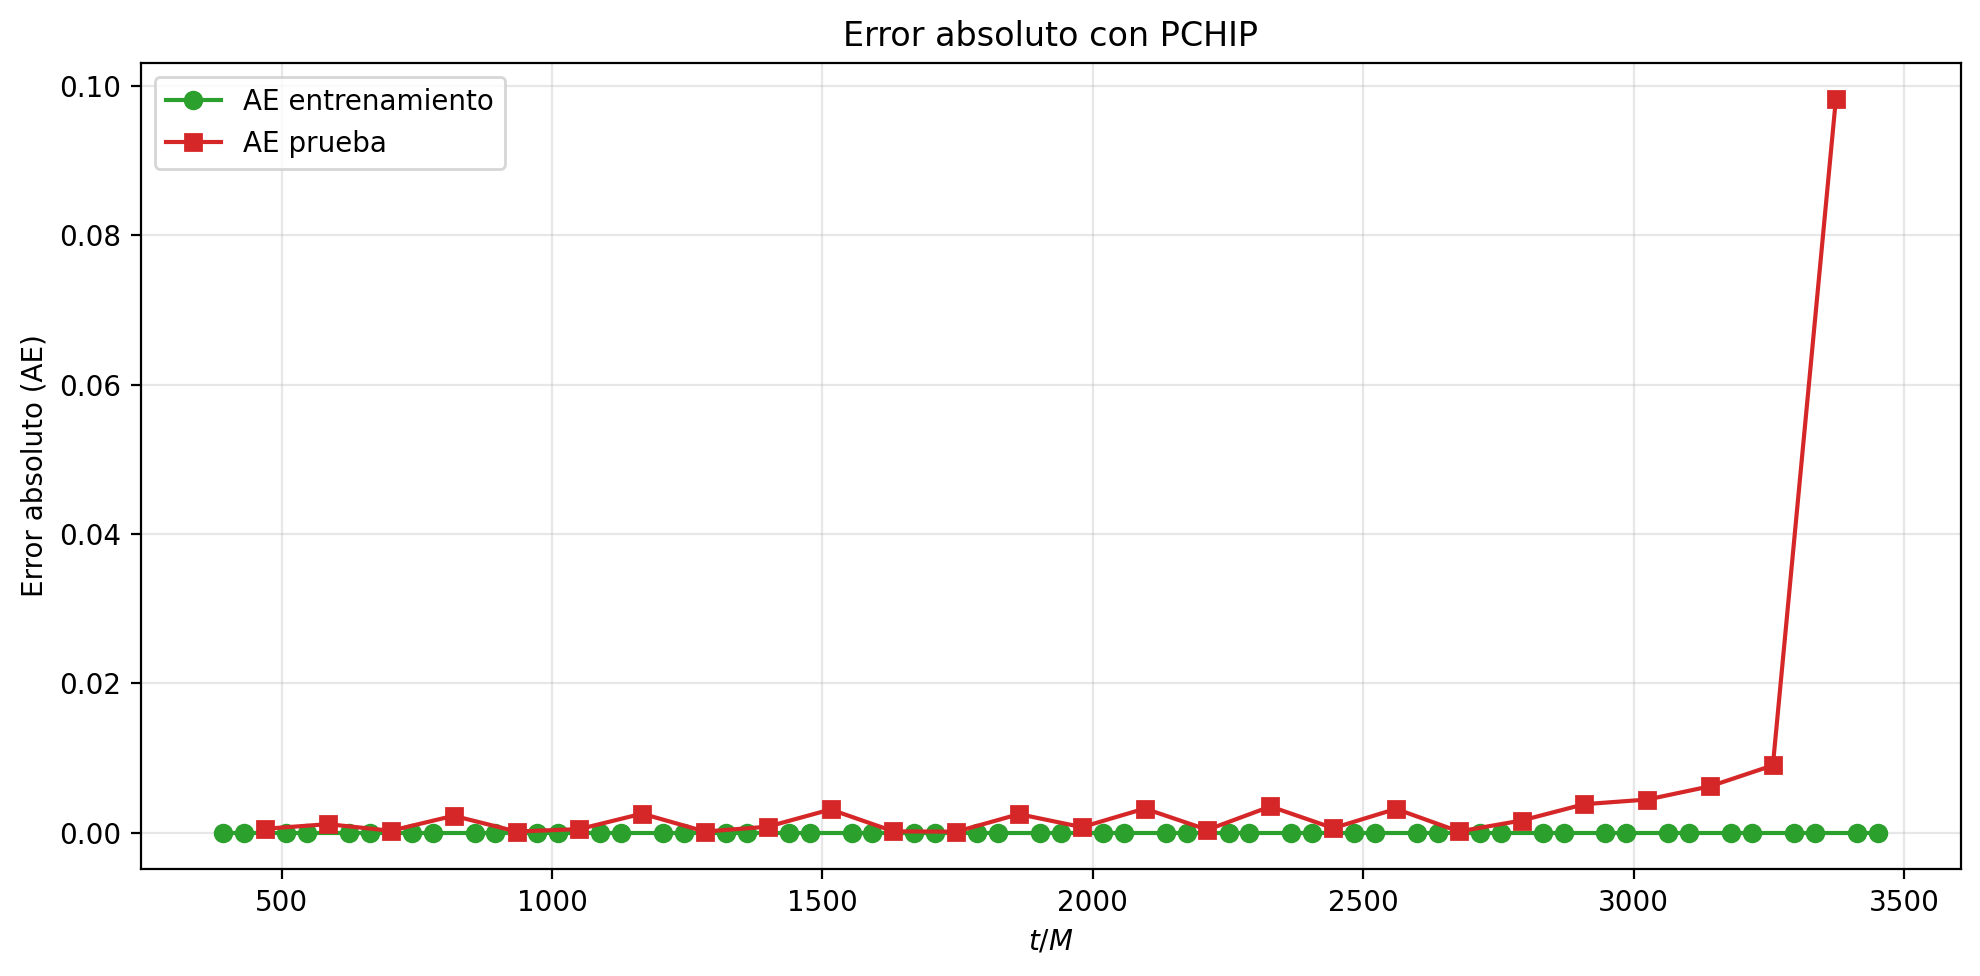

In [ ]:
#Predicciones con PCHIP.

y_hat_train_pchip = pchip(t_train_pchip)
y_hat_test_pchip  = pchip(t_test_pchip)

#Errores punto a punto.

SE_train_pchip = (y_train_pchip - y_hat_train_pchip)**2
SE_test_pchip  = (y_test_pchip - y_hat_test_pchip)**2

#Error absoluto.

AE_train_pchip = np.abs(y_train_pchip - y_hat_train_pchip)
AE_test_pchip  = np.abs(y_test_pchip - y_hat_test_pchip)


#Errores promedio.

MSE_train_pchip = SE_train_pchip.mean()
MSE_test_pchip  = SE_test_pchip.mean()

MAE_train_pchip = AE_train_pchip.mean()
MAE_test_pchip  = AE_test_pchip.mean()

print("===== Resultados globales PCHIP =====")
print(f"Entrenamiento -> MSE = {MSE_train_pchip:.6e}, MAE = {MAE_train_pchip:.6e}")
print(f"Prueba        -> MSE = {MSE_test_pchip:.6e}, MAE = {MAE_test_pchip:.6e}")

#Gráfica: error cuadrático.

plt.figure(figsize=(10,5))
plt.plot(t_train_pchip, SE_train_pchip, 'o-', label="SE entrenamiento", color="tab:blue")
plt.plot(t_test_pchip, SE_test_pchip, 's-', label="SE prueba", color="tab:orange")
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático con PCHIP")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Gráfica: error absoluto.

plt.figure(figsize=(10,5))
plt.plot(t_train_pchip, AE_train_pchip, 'o-', label="AE entrenamiento", color="tab:green")
plt.plot(t_test_pchip, AE_test_pchip, 's-', label="AE prueba", color="tab:red")
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto con PCHIP")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **VII. ¿Cuál es el mejor método?**

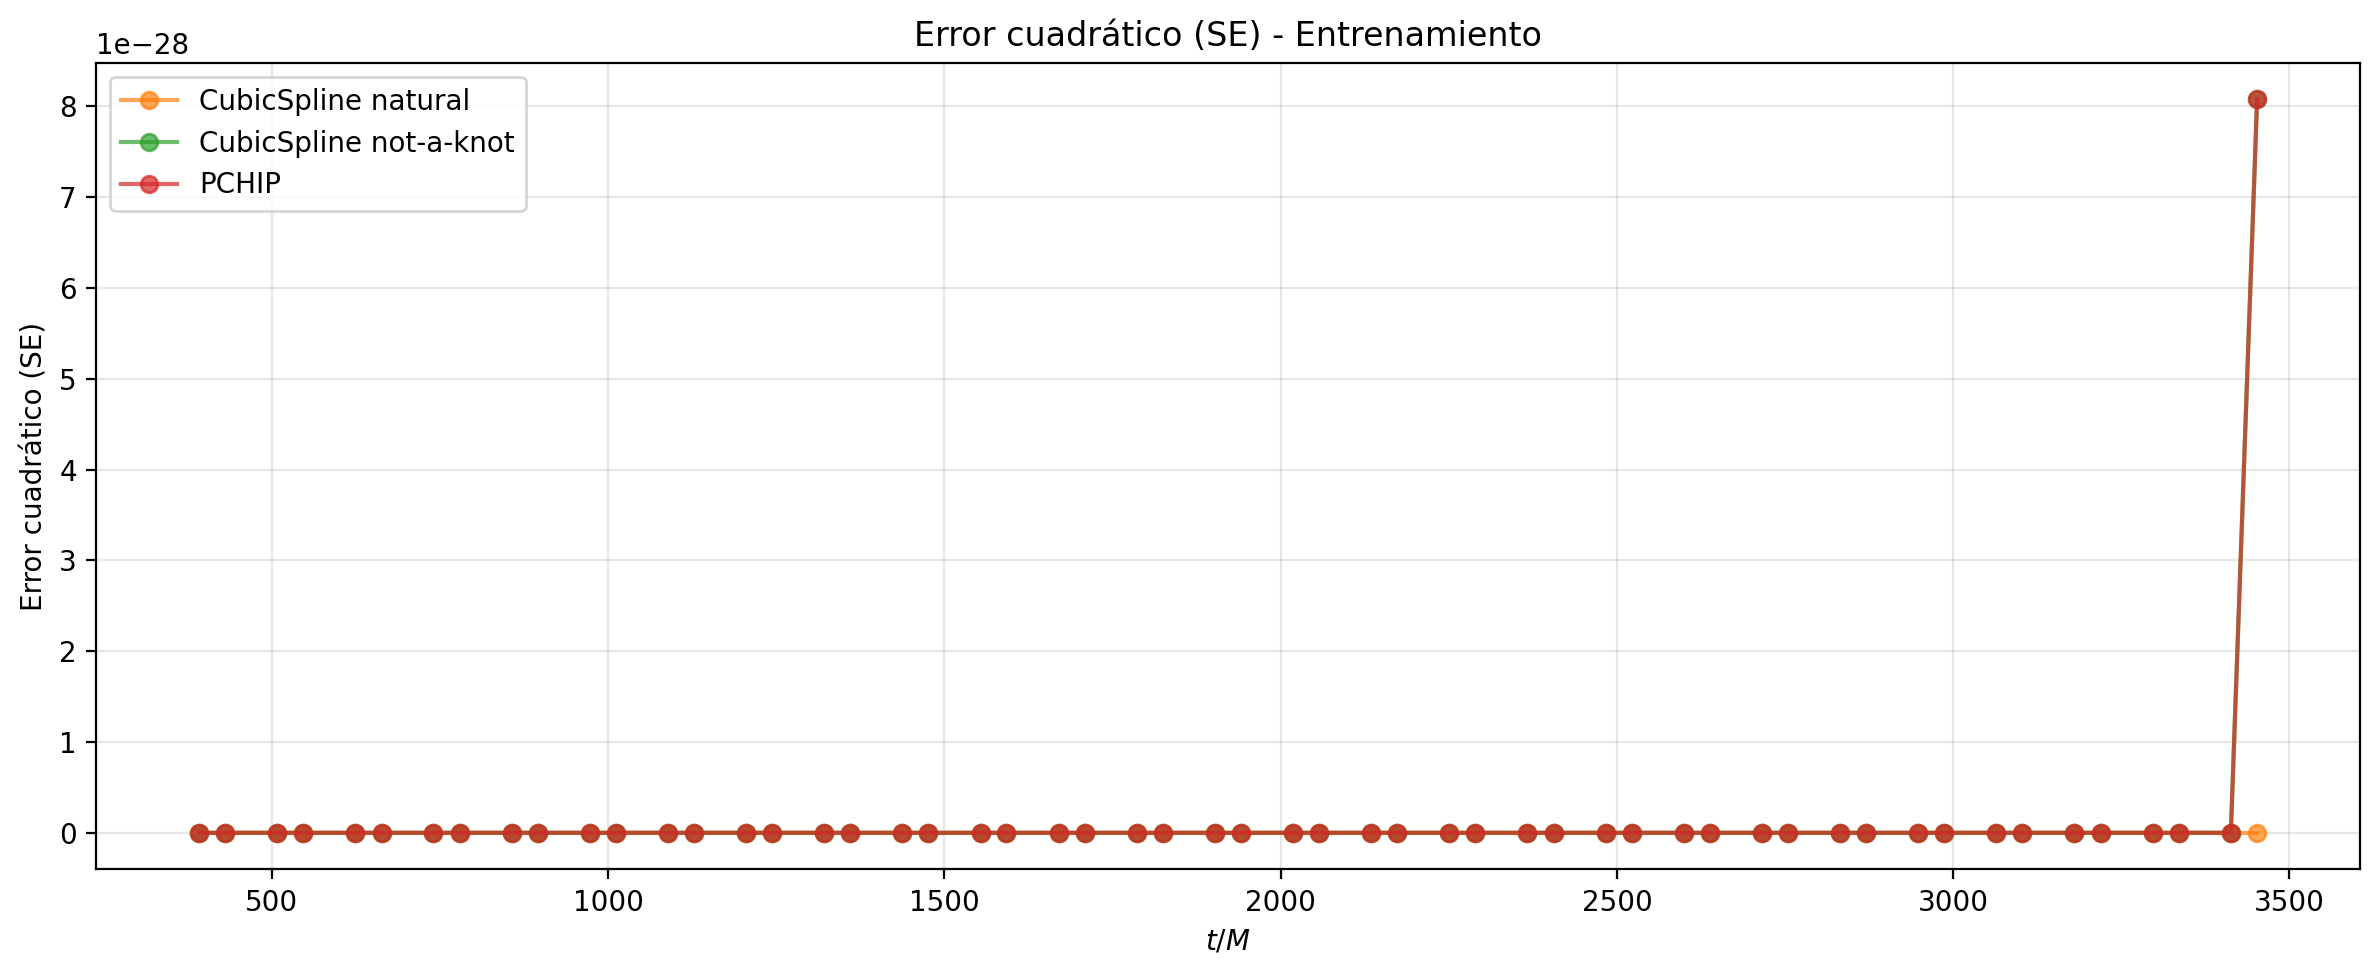

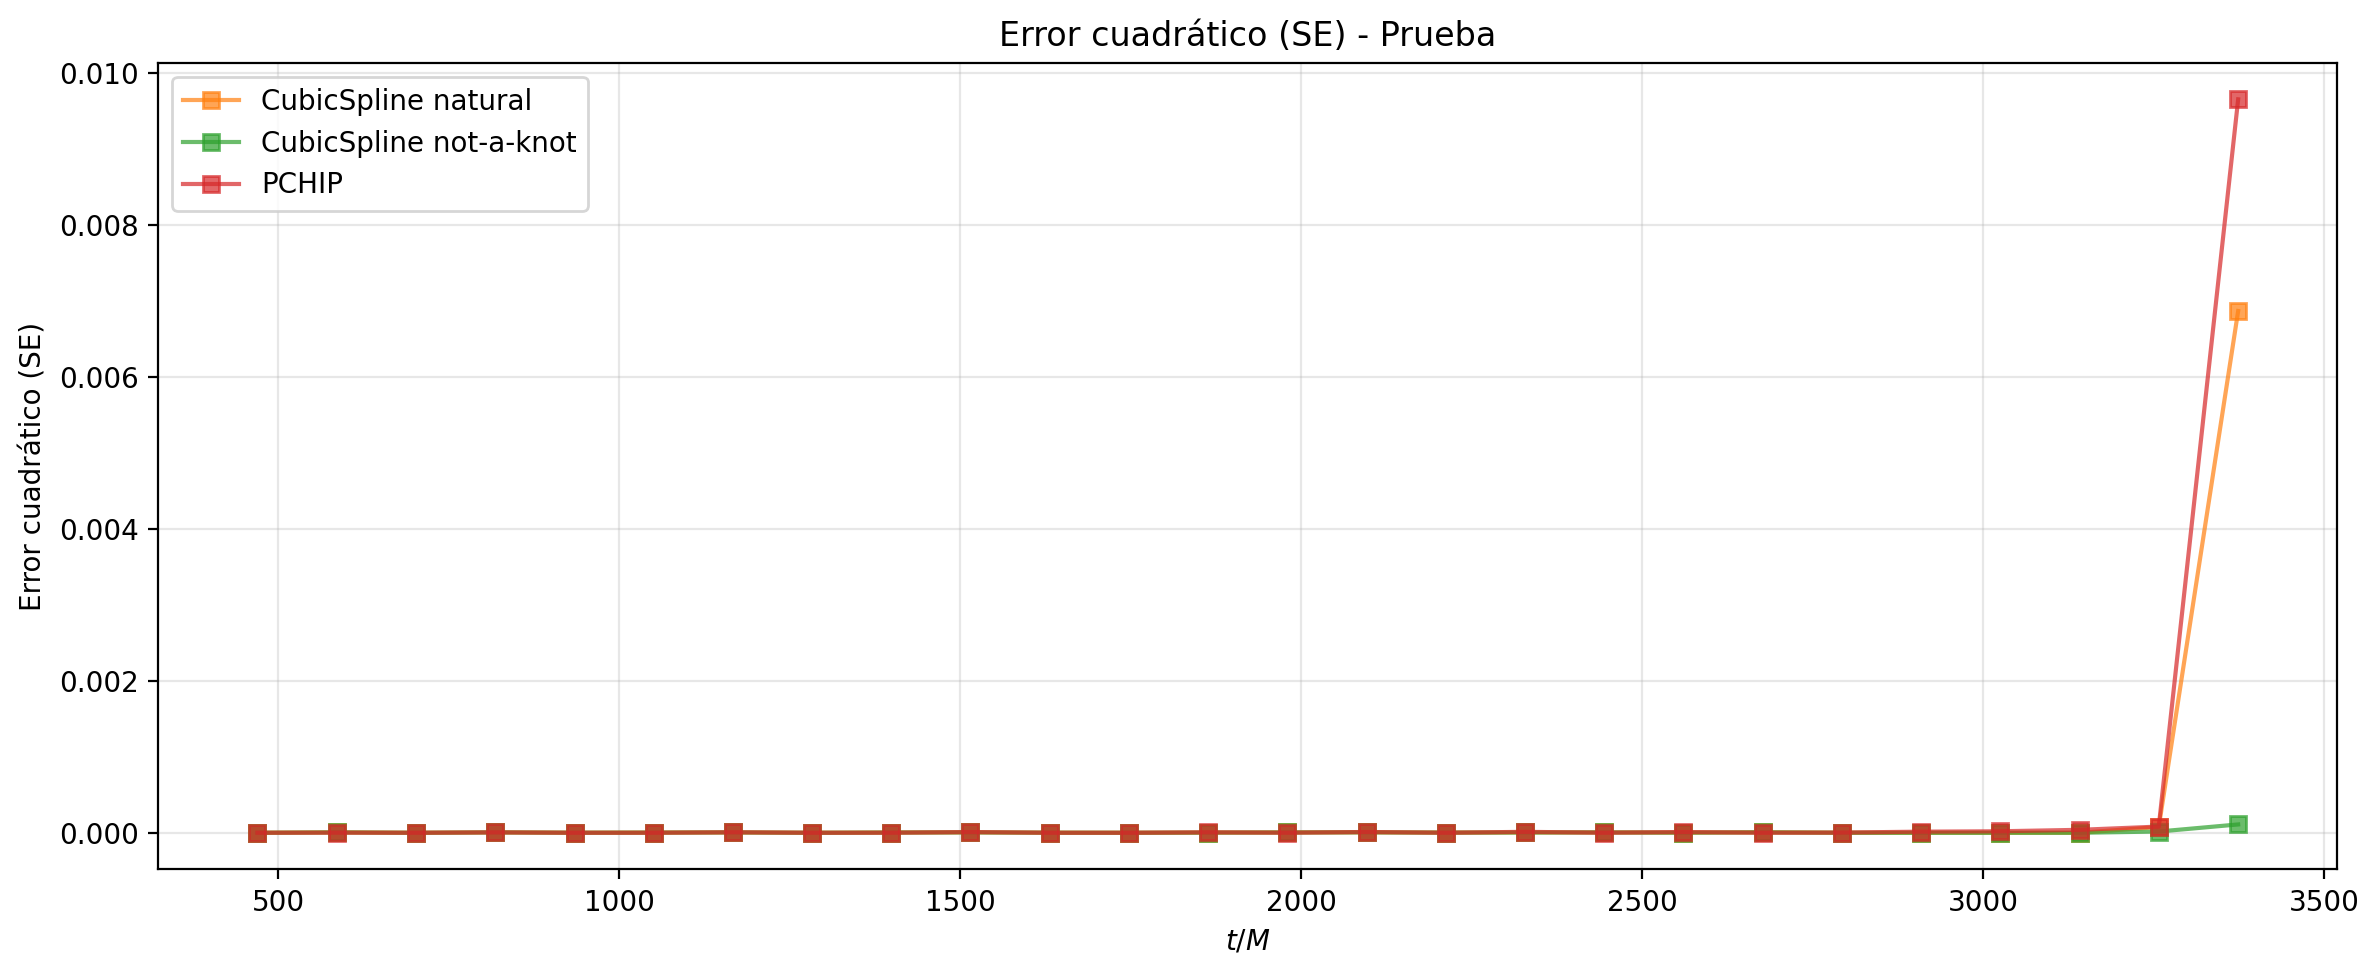

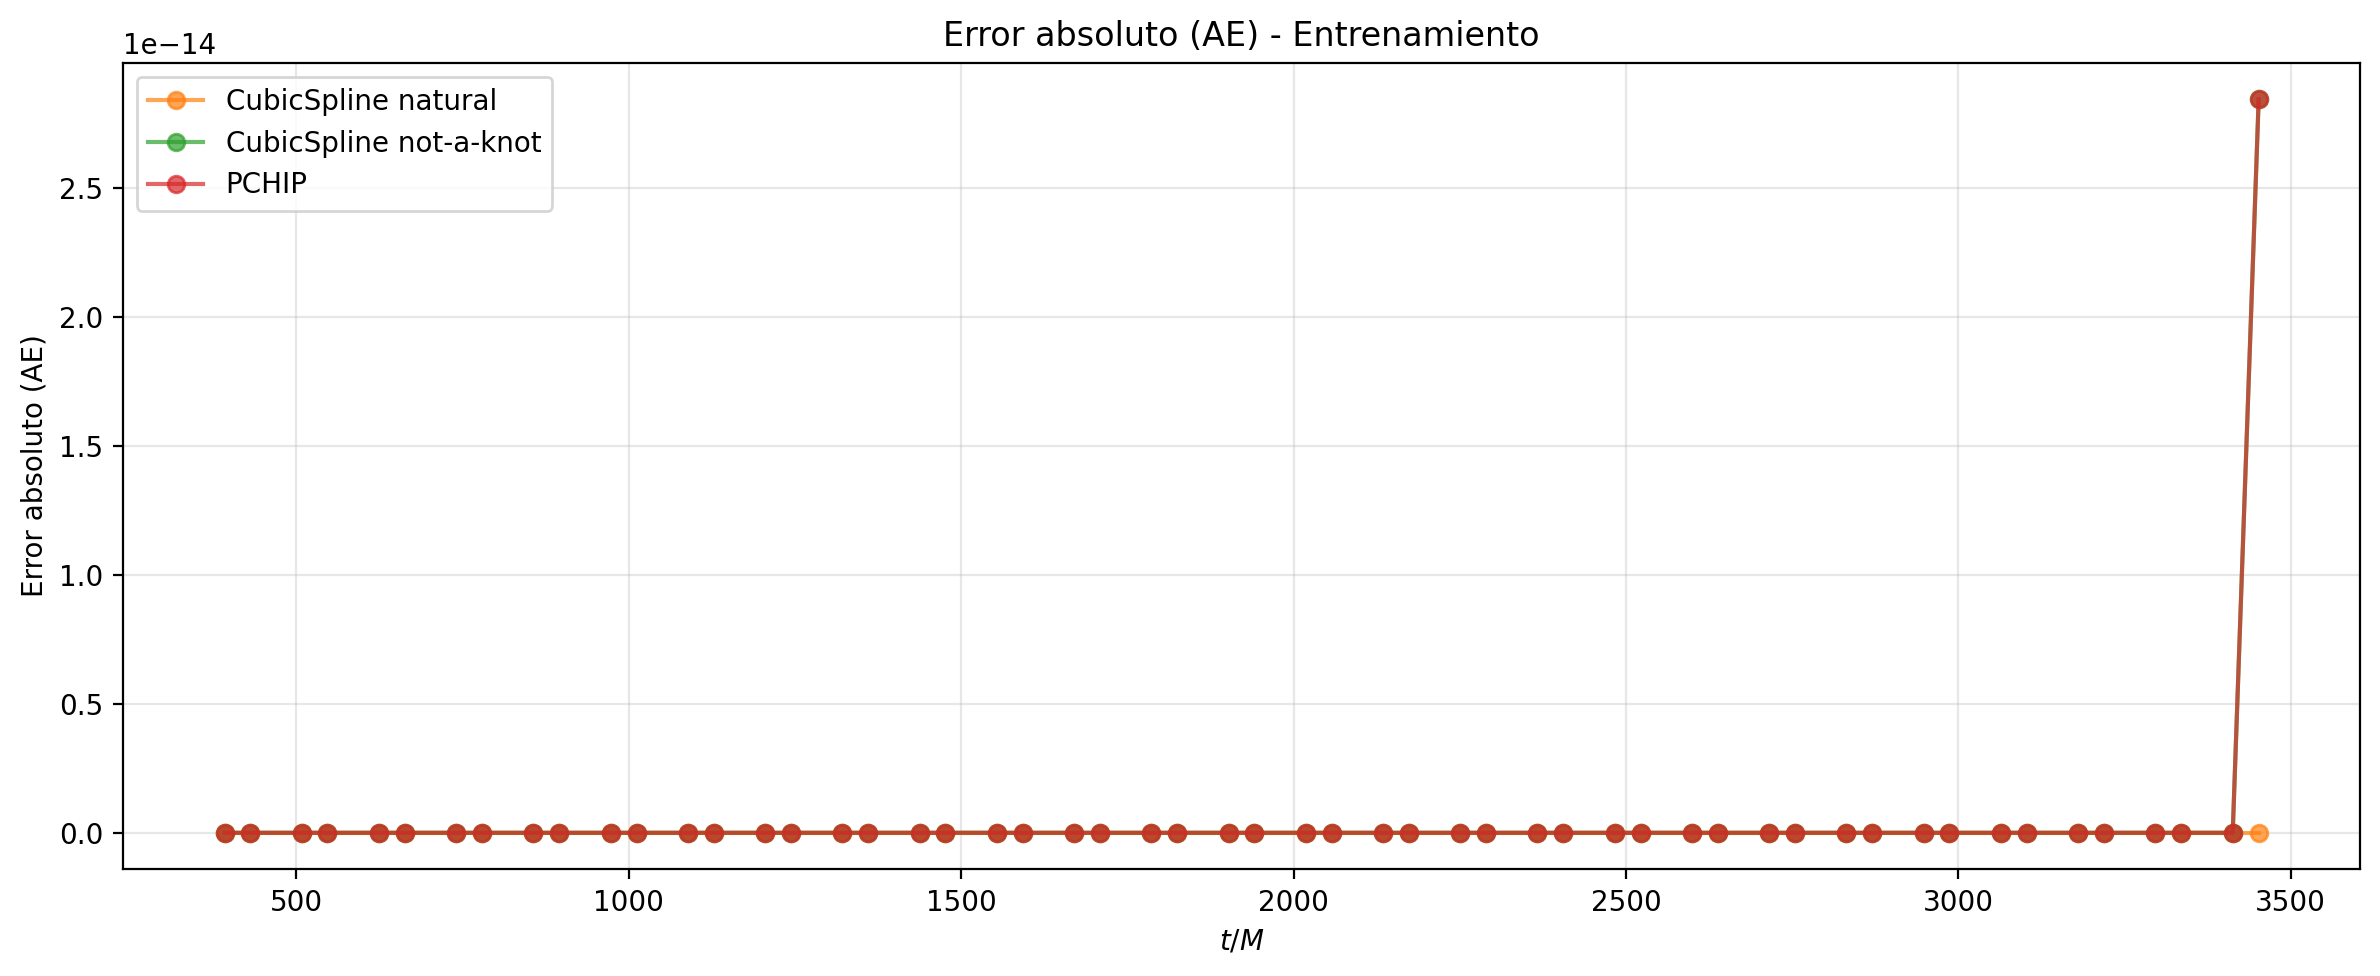

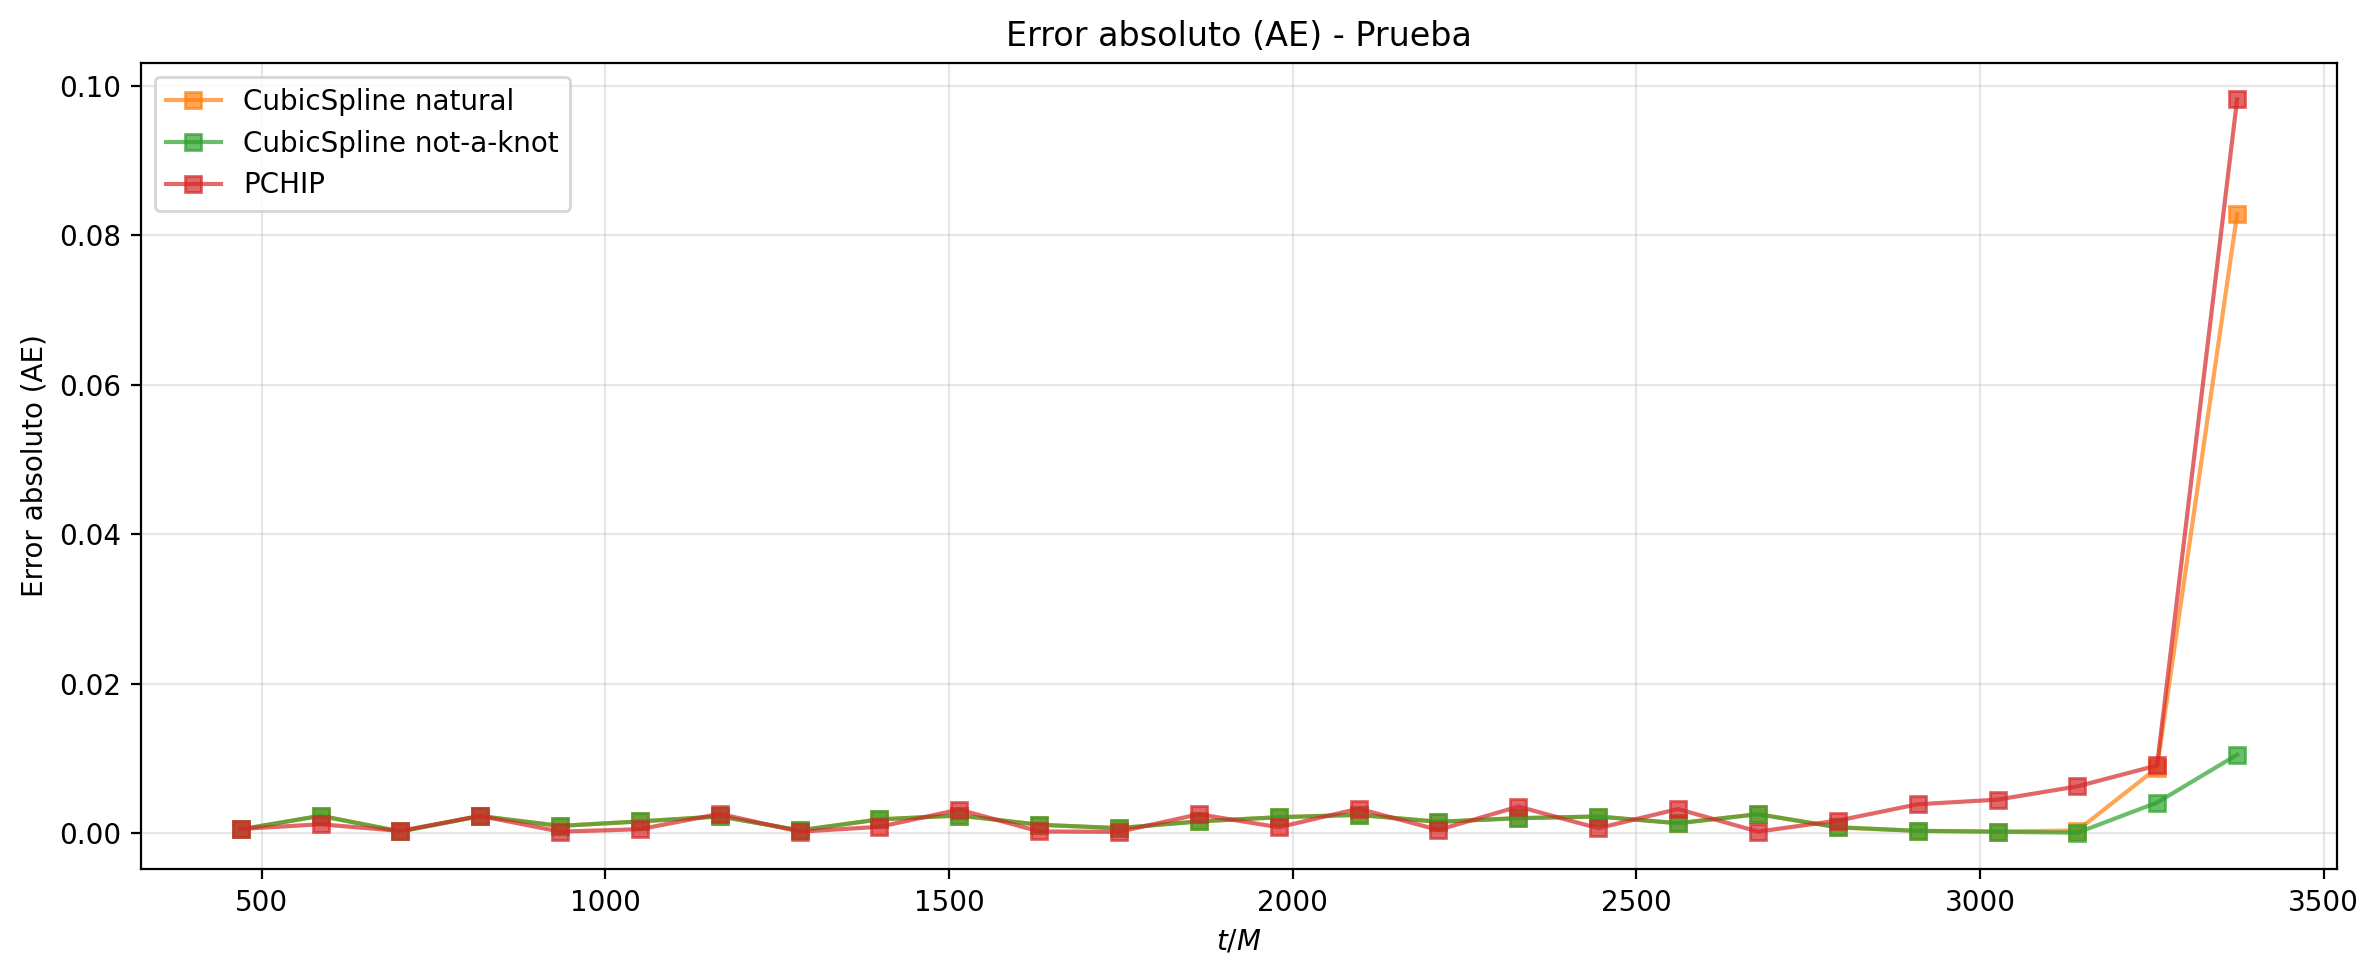

In [ ]:
# Error cuadrático: Entrenamiento.

plt.figure(figsize=(12,5))
plt.plot(t_train_spl, SE_train_spl, 'o-', label='CubicSpline natural', color='tab:orange', alpha=0.7)
plt.plot(t_train_nak, SE_train_nak, 'o-', label='CubicSpline not-a-knot', color='tab:green', alpha=0.7)
plt.plot(t_train_pchip, SE_train_pchip, 'o-', label='PCHIP', color='tab:red', alpha=0.7)
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático (SE) - Entrenamiento")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Error cuadrático: prueba.

plt.figure(figsize=(12,5))
plt.plot(t_test_spl, SE_test_spl, 's-', label='CubicSpline natural', color='tab:orange', alpha=0.7)
plt.plot(t_test_nak, SE_test_nak, 's-', label='CubicSpline not-a-knot', color='tab:green', alpha=0.7)
plt.plot(t_test_pchip, SE_test_pchip, 's-', label='PCHIP', color='tab:red', alpha=0.7)
plt.xlabel(r"$t/M$")
plt.ylabel("Error cuadrático (SE)")
plt.title("Error cuadrático (SE) - Prueba")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Error absoluto: entrenamiento.

plt.figure(figsize=(12,5))
plt.plot(t_train_spl, AE_train_spl, 'o-', label='CubicSpline natural', color='tab:orange', alpha=0.7)
plt.plot(t_train_nak, AE_train_nak, 'o-', label='CubicSpline not-a-knot', color='tab:green', alpha=0.7)
plt.plot(t_train_pchip, AE_train_pchip, 'o-', label='PCHIP', color='tab:red', alpha=0.7)
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto (AE) - Entrenamiento")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Error absoluto: prueba.

plt.figure(figsize=(12,5))
plt.plot(t_test_spl, AE_test_spl, 's-', label='CubicSpline natural', color='tab:orange', alpha=0.7)
plt.plot(t_test_nak, AE_test_nak, 's-', label='CubicSpline not-a-knot', color='tab:green', alpha=0.7)
plt.plot(t_test_pchip, AE_test_pchip, 's-', label='PCHIP', color='tab:red', alpha=0.7)
plt.xlabel(r"$t/M$")
plt.ylabel("Error absoluto (AE)")
plt.title("Error absoluto (AE) - Prueba")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

#Se crea diccionario con los datos.

data = {
    'Método': ['Lagrange', 'CubicSpline natural', 'CubicSpline not-a-knot', 'PCHIP'],
    'MAE Entrenamiento': [MAE_train_lagr, MAE_train_spl, MAE_train_nak, MAE_train_pchip],
    'MAE Prueba':        [MAE_test_lagr,  MAE_test_spl,  MAE_test_nak,  MAE_test_pchip]
}

#Se crea DataFrame.

tabla_errores = pd.DataFrame(data)

#Se asegura de que las columnas numéricas sean float.

num_cols = ['MAE Entrenamiento', 'MAE Prueba']
tabla_errores[num_cols] = tabla_errores[num_cols].astype(float)

#Se muestra la tabla en Jupyter aplicando formato solo a las columnas numéricas.

try:
    from IPython.display import display
    display(tabla_errores.style.format({col: "{:.6e}" for col in num_cols}))
except:
    #Alternativa para consola
    print(tabla_errores.to_string(index=False, float_format="{:.6e}".format))


,Método,MAE Entrenamiento,MAE Prueba
0,Lagrange,6.702905e-02,7.259096e-02
1,CubicSpline natural,0.000000e+00,4.794452e-03
2,CubicSpline not-a-knot,5.263280e-16,1.820077e-03
3,PCHIP,5.263280e-16,5.757875e-03
